In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#učitavanje svih neophodnih biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures#za potrebe normalizacije obelezja, a drugo je kombinovanje obelezja
from sklearn.linear_model import LinearRegression, Ridge, Lasso#dva druga se bave regularizacijom
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#ucitavanje podataka u DataFrame
data_day=pd.read_csv('drive/MyDrive/podaci-projekat/day(1).csv');
data_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
data_hour=pd.read_csv('drive/MyDrive/podaci-projekat/hour.csv');
data_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [ ]:
#format podataka
print("DAY", data_day.shape)
print("DAY", data_day.dtypes)
#format podataka 
print("HOUR", data_hour.shape)
print("HOUR", data_hour.dtypes)
#kategoricka obelezja: season,yr,mnth,holiday,weekday,workingday,weathersit,hr
#numericko oblezje: temp,atemp,hum,windspeed,casual,registered,cnt,dteday


DAY (731, 16)
DAY instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
HOUR (17379, 17)
HOUR instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [ ]:
#potrebno je izbaciti obelezje instant koje predstavlja redni broj uzorka
data_hour.drop(['instant'],axis=1,inplace=True)
data_day.drop(['instant'],axis=1,inplace=True)

In [ ]:
data_day.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1        0        6           0           2   
1  2011-01-02       1   0     1        0        0           0           2   
2  2011-01-03       1   0     1        0        1           1           1   
3  2011-01-04       1   0     1        0        2           1           1   
4  2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600

In [ ]:
data_hour.isnull().sum()
data_day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#provera da li su podaci u data_day agregirani podaci iz data_hour
data_agregate=data_hour.groupby("dteday").sum()
data_agregate.drop(['hr'],axis=1,inplace=True)
pd.DataFrame.equals(data_agregate["cnt"], data_day["cnt"])

False

In [ ]:
data_agregate.shape
#u data_hour nema kompletne podatke za svaki dan, odnosno nedostaju neki sati 

(731, 14)

In [ ]:
#provera kategorickih obelezja
print(data_hour["season"].unique())
print(data_hour["yr"].unique())
print(data_hour['mnth'].unique())
print(data_hour['weekday'].unique())

[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[6 0 1 2 3 4 5]


In [ ]:
#utvrdjivanje postojanja autlajera
#count broji ne null vrednosti
#poredjennje srednje vrednosti i medijane ukayuje na postojanje autlajera
data_hour.describe()
#obelezje temp je uredu sto se tice nevalidnih vrednosti
#nakon analize smo utvrdili da nema null vrednosti nema null vrenosti 



season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.171850   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.340000      0.333300   
50%        3.000000      1.000000      1.000000      0.500000      0.484800   
75%        5.000000      1.000000      2.000000      0.660000      0.621200   
max        6.000000      1.000000      4.000000      1.000000      1.000000   

                hum     windspeed        casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.627229      0.190098     35.676218    153.786869    189.463088  
std        0.192930      0.122340     49.305030    151.357286    181.387599  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.480000      0.104500      4.000000     34.000000     40.000000  
50%        0.630000      0.194000     17.000000    115.000000    142.000000  
75%        0.780000      0.253700     48.000000    220.000000    281.000000  
max        1.000000      0.850700    367.000000    886.000000    977.000000

In [ ]:
#provera kada su se pojavljivali jaci vetrovi ida li je to uticalo na broj iynajmljivanja bicikala
data_hour[data_hour['windspeed']>0.7]

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1017   2011-02-15       1   0     2   1        0        2           1   
1125   2011-02-19       1   0     2  15        0        6           0   
1259   2011-02-25       1   0     2  15        0        5           1   
1261   2011-02-25       1   0     2  17        0        5           1   
4315   2011-07-03       3   0     7  17        0        0           0   
4316   2011-07-03       3   0     7  18        0        0           0   
5635   2011-08-27       3   0     8  17        0        6           0   
9653   2012-02-12       1   1     2   4        0        0           0   
9956   2012-02-24       1   1     2  21        0        5           1   
11024  2012-04-09       2   1     4  12        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
1017            1  0.30  0.2424  0.42     0.7761       0           5    5  
1125            1  0.44  0.4394  0.16     0.7463      84          87  171  
1259            1  0.46  0.4545  0.41     0.8060       5          50   55  
1261            1  0.32  0.2727  0.49     0.7463       8         181  189  
4315            3  0.80  0.7424  0.49     0.8507     181         177  358  
4316            3  0.80  0.7424  0.49     0.8507      74         107  181  
5635            3  0.64  0.5758  0.89     0.8358       2          14   16  
9653            2  0.10  0.0455  0.46     0.7164       0           1    1  
9956            1  0.42  0.4242  0.35     0.8060       1         151  152  
11024           1  0.54  0.5152  0.28     0.7164      94         186  280

In [ ]:
data_hour[data_hour['temp']<0.1]
#broj iznajmljivanja je veoma mali tokom dana kada je bilo malo stepeni

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
189   2011-01-09       1   0     1   4        0        0           0   
190   2011-01-09       1   0     1   5        0        0           0   
192   2011-01-09       1   0     1   7        0        0           0   
476   2011-01-21       1   0     1  21        0        5           1   
477   2011-01-21       1   0     1  22        0        5           1   
...          ...     ...  ..   ...  ..      ...      ...         ...   
8726  2012-01-04       1   1     1  10        0        3           1   
8727  2012-01-04       1   1     1  11        0        3           1   
9650  2012-02-12       1   1     2   1        0        0           0   
9656  2012-02-12       1   1     2   7        0        0           0   
9657  2012-02-12       1   1     2   8        0        0           0   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
189            1  0.08  0.0909  0.53     0.1940       0           1    1  
190            1  0.08  0.0909  0.53     0.1940       0           1    1  
192            1  0.08  0.0909  0.53     0.1940       1           5    6  
476            1  0.08  0.0758  0.38     0.2836       0          41   41  
477            1  0.06  0.0303  0.41     0.3881       1          33   34  
...          ...   ...     ...   ...        ...     ...         ...  ...  
8726           1  0.06  0.1061  0.45     0.0000       7          57   64  
8727           2  0.08  0.1212  0.42     0.0896       6          40   46  
9650           3  0.08  0.0455  0.79     0.4627       0          24   24  
9656           1  0.08  0.0909  0.53     0.1940       0          18   18  
9657           1  0.08  0.0758  0.53     0.2537       0          26   26  

[66 rows x 16 columns]

In [ ]:
data_day.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.077498   
min      1.000000    0.059130    0.079070    0.000000    0.022392   
25%      1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    0.498333    0.486733    0.626667    0.180975   
75%      2.000000    0.655417    0.608602    0.730209    0.233214   
max      3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [ ]:
data_day[data_day['casual']>2800].sort_values(by = 'casual', ascending=False)

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
504  2012-05-19       2   1     5        0        6           0           1   
512  2012-05-27       2   1     5        0        0           0           1   
462  2012-04-07       2   1     4        0        6           0           1   
623  2012-09-15       3   1     9        0        6           0           1   
441  2012-03-17       1   1     3        0        6           0           2   
184  2011-07-04       3   0     7        1        1           0           2   
644  2012-10-06       4   1    10        0        6           0           1   
532  2012-06-16       2   1     6        0        6           0           1   
511  2012-05-26       2   1     5        0        6           0           1   
470  2012-04-15       2   1     4        0        0           0           1   
595  2012-08-18       3   1     8        0        6           0           1   
658  2012-10-20       4   1    10        0        6           0           1   

         temp     atemp       hum  windspeed  casual  registered   cnt  
504  0.600000  0.566908  0.456250   0.083975    3410        4884  8294  
512  0.690000  0.641425  0.697083   0.215171    3283        3308  6591  
462  0.437500  0.426129  0.254167   0.274871    3252        3605  6857  
623  0.608333  0.585867  0.501667   0.247521    3160        5554  8714  
441  0.514167  0.505046  0.755833   0.110704    3155        4681  7836  
184  0.726667  0.665417  0.637917   0.081479    3065        2978  6043  
644  0.554167  0.538521  0.664167   0.268025    3031        4934  7965  
532  0.631667  0.594708  0.504167   0.166667    2963        4739  7702  
511  0.692500  0.642696  0.732500   0.198992    2855        3681  6536  
470  0.606667  0.573875  0.507917   0.225129    2846        4286  7132  
595  0.678333  0.618071  0.603333   0.177867    2827        5038  7865  
658  0.484167  0.472842  0.572917   0.117537    2806        5284  8090

In [ ]:
data_hour[data_hour['casual']>320].sort_values(by = 'casual', ascending=False)
#Posmatrajući srednju vrednost i medijanu za obeležje causal utvrđeno je da postoji nekoliko vrednosti koje su mnogo veće odstalih. 
#Daljim ispitivanjem došlo se do zaključka da su to dani za vreme vikenda, uglavom nedelje popodne, u proleće. 
#Takođe može se primetiti da su vremenske prilike u tim peoriodima izuyetno povoljne. Sve ove činjenice se slazu sa tvrdnjom da ljudi tokom vikenda i lepog vremena
#žele da provedu svpje vreme u prirodi uz reklreaciju.
 


dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
10477  2012-03-17       1   1     3  16        0        6           0   
15343  2012-10-06       4   1    10  12        0        6           0   
11985  2012-05-19       2   1     5  14        0        6           0   
10476  2012-03-17       1   1     3  15        0        6           0   
11986  2012-05-19       2   1     5  15        0        6           0   
10977  2012-04-07       2   1     4  13        0        6           0   
10980  2012-04-07       2   1     4  16        0        6           0   
10475  2012-03-17       1   1     3  14        0        6           0   
14843  2012-09-15       3   1     9  16        0        6           0   
15684  2012-10-20       4   1    10  17        0        6           0   
15681  2012-10-20       4   1    10  14        0        6           0   
11984  2012-05-19       2   1     5  13        0        6           0   
11987  2012-05-19       2   1     5  16        0        6           0   
14840  2012-09-15       3   1     9  13        0        6           0   
10978  2012-04-07       2   1     4  14        0        6           0   
14841  2012-09-15       3   1     9  14        0        6           0   
15683  2012-10-20       4   1    10  16        0        6           0   
15849  2012-10-27       4   1    10  14        0        6           0   
10979  2012-04-07       2   1     4  15        0        6           0   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
10477           1  0.64  0.6212  0.50     0.0000     367         318  685  
15343           1  0.70  0.6515  0.54     0.1045     362         381  743  
11985           1  0.72  0.6515  0.30     0.0896     361         369  730  
10476           1  0.64  0.6212  0.53     0.1343     357         322  679  
11986           1  0.72  0.6515  0.30     0.1045     356         316  672  
10977           1  0.50  0.4848  0.22     0.1940     355         288  643  
10980           1  0.54  0.5152  0.19     0.3881     354         261  615  
10475           1  0.62  0.6212  0.53     0.0896     352         338  690  
14843           2  0.66  0.6212  0.36     0.2239     350         433  783  
15684           1  0.54  0.5152  0.37     0.2239     347         384  731  
15681           1  0.56  0.5303  0.40     0.0000     335         376  711  
11984           1  0.70  0.6364  0.37     0.1343     332         372  704  
11987           1  0.74  0.6515  0.30     0.1045     331         311  642  
14840           1  0.68  0.6364  0.36     0.1940     327         377  704  
10978           1  0.50  0.4848  0.22     0.2985     326         252  578  
14841           1  0.68  0.6364  0.34     0.3284     325         390  715  
15683           1  0.54  0.5152  0.42     0.2836     325         366  691  
15849           1  0.60  0.6212  0.46     0.2537     325         425  750  
10979           1  0.52  0.5000  0.19     0.4179     321         305  626

In [ ]:
#izdvojeni uzorci kada je bilo najvise iznajmljivanja i provera da li je razlog za to bio povećan broj casula korisnika
data_day[data_day['cnt']>8000]

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
447  2012-03-23       2   1     3        0        5           1           2   
504  2012-05-19       2   1     5        0        6           0           1   
518  2012-06-02       2   1     6        0        6           0           1   
571  2012-07-25       3   1     7        0        3           1           1   
617  2012-09-09       3   1     9        0        0           0           1   
622  2012-09-14       3   1     9        0        5           1           1   
623  2012-09-15       3   1     9        0        6           0           1   
629  2012-09-21       3   1     9        0        5           1           1   
630  2012-09-22       3   1     9        0        6           0           1   
637  2012-09-29       4   1     9        0        6           0           1   
643  2012-10-05       4   1    10        0        5           1           1   
658  2012-10-20       4   1    10        0        6           0           1   

         temp     atemp       hum  windspeed  casual  registered   cnt  
447  0.601667  0.570067  0.694167   0.116300    2469        5893  8362  
504  0.600000  0.566908  0.456250   0.083975    3410        4884  8294  
518  0.583333  0.566288  0.549167   0.186562    2795        5325  8120  
571  0.724167  0.654054  0.450000   0.164800    1383        6790  8173  
617  0.610000  0.578925  0.547500   0.224496    2570        5657  8227  
622  0.633333  0.594083  0.672500   0.103863    1379        6630  8009  
623  0.608333  0.585867  0.501667   0.247521    3160        5554  8714  
629  0.599167  0.571971  0.668750   0.154229    1250        6917  8167  
630  0.650000  0.610488  0.646667   0.283583    2512        5883  8395  
637  0.542500  0.530296  0.542917   0.227604    2589        5966  8555  
643  0.615000  0.580187  0.627500   0.106350    1516        6640  8156  
658  0.484167  0.472842  0.572917   0.117537    2806        5284  8090

In [ ]:
data_hour[data_hour['casual']==0].sort_values(by = 'casual', ascending=False)
 


dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
4      2011-01-01       1   0     1   4        0        6           0   
9845   2012-02-20       1   1     2   5        1        1           0   
9823   2012-02-19       1   1     2   6        0        0           0   
9821   2012-02-19       1   1     2   4        0        0           0   
9798   2012-02-18       1   1     2   5        0        6           0   
...           ...     ...  ..   ...  ..      ...      ...         ...   
4303   2011-07-03       3   0     7   5        0        0           0   
4206   2011-06-29       3   0     6   4        0        3           1   
4181   2011-06-28       3   0     6   3        0        2           1   
4157   2011-06-27       3   0     6   3        0        1           1   
17361  2012-12-31       1   1    12   6        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
4               1  0.24  0.2879  0.75     0.0000       0           1    1  
9845            2  0.24  0.2121  0.60     0.3582       0           6    6  
9823            1  0.24  0.2121  0.52     0.3284       0           5    5  
9821            2  0.28  0.2576  0.41     0.3881       0           3    3  
9798            1  0.24  0.2576  0.70     0.0896       0           1    1  
...           ...   ...     ...   ...        ...     ...         ...  ...  
4303            3  0.62  0.5758  0.83     0.1940       0           1    1  
4206            1  0.66  0.6061  0.83     0.1045       0           5    5  
4181            2  0.66  0.6212  0.74     0.0000       0           2    2  
4157            3  0.62  0.5909  0.78     0.1343       0           2    2  
17361           1  0.16  0.1667  0.64     0.1642       0          40   40  

[1581 rows x 16 columns]

In [ ]:
data_hour[data_hour['registered']>800]
#vidimo da je kod registrovanih korisnika potražnja za biciklima bila u drugačijim periodima. Može se primetiti da su to radni dani u nedelji, uglavnom 
#u ranim jutarnjim časovima ili u vreme kraja radnog vremena. Što ukazuje da su to stalni korisnici koji većinom koriste usluge iznajmljivanja radi svog svakodnevnih obaveza.
#Kada uporedimo dane kada su najviše iznajmljivani bicikli kod obicnih i registrovanih korisnika, vreme je u oba slučaja povoljno za voznju, odnosno bez padavina kao sto si kisa i sneg, magle itd.  

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
14220  2012-08-20       3   1     8  17        0        1           1   
14293  2012-08-23       3   1     8  18        0        4           1   
14725  2012-09-10       3   1     9  18        0        1           1   
14748  2012-09-11       3   1     9  17        0        2           1   
14772  2012-09-12       3   1     9  17        0        3           1   
14773  2012-09-12       3   1     9  18        0        3           1   
14940  2012-09-19       3   1     9  17        0        3           1   
14941  2012-09-19       3   1     9  18        0        3           1   
14964  2012-09-20       3   1     9  17        0        4           1   
15060  2012-09-24       4   1     9  17        0        1           1   
15084  2012-09-25       4   1     9  17        0        2           1   
15099  2012-09-26       4   1     9   8        0        3           1   
15108  2012-09-26       4   1     9  17        0        3           1   
15109  2012-09-26       4   1     9  18        0        3           1   
15132  2012-09-27       4   1     9  17        0        4           1   
15133  2012-09-27       4   1     9  18        0        4           1   
15276  2012-10-03       4   1    10  17        0        3           1   
15301  2012-10-04       4   1    10  18        0        4           1   
15435  2012-10-10       4   1    10   8        0        3           1   
15444  2012-10-10       4   1    10  17        0        3           1   
15588  2012-10-16       4   1    10  17        0        2           1   
15627  2012-10-18       4   1    10   8        0        4           1   
15732  2012-10-22       4   1    10  17        0        1           1   
15756  2012-10-23       4   1    10  17        0        2           1   
15780  2012-10-24       4   1    10  17        0        3           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
14220           1  0.70  0.6515  0.58     0.2836      83         810  893  
14293           1  0.74  0.6667  0.48     0.2239     130         811  941  
14725           1  0.62  0.6212  0.35     0.2985     111         857  968  
14748           1  0.70  0.6364  0.28     0.0000     168         802  970  
14772           1  0.70  0.6364  0.41     0.2985     114         811  925  
14773           1  0.66  0.6212  0.44     0.2537      91         886  977  
14940           1  0.60  0.6212  0.38     0.2239      74         812  886  
14941           1  0.58  0.5455  0.40     0.2836      85         807  892  
14964           1  0.64  0.6212  0.50     0.2239      91         885  976  
15060           1  0.58  0.5455  0.30     0.0000      89         809  898  
15084           1  0.66  0.6212  0.39     0.2836     107         860  967  
15099           1  0.56  0.5303  0.73     0.2985      30         808  838  
15108           1  0.74  0.6667  0.48     0.2985      77         876  953  
15109           1  0.74  0.6667  0.48     0.2239      69         815  884  
15132           2  0.66  0.6212  0.69     0.2985      87         818  905  
15133           2  0.66  0.6212  0.69     0.2239      77         822  899  
15276           1  0.70  0.6515  0.65     0.0000      84         833  917  
15301           1  0.66  0.6212  0.57     0.1045      75         812  887  
15435           1  0.50  0.4848  0.77     0.1642      33         806  839  
15444           1  0.58  0.5455  0.43     0.2239      91         857  948  
15588           1  0.52  0.5000  0.39     0.1940     104         839  943  
15627           1  0.46  0.4545  0.82     0.2537      31         803  834  
15732           1  0.62  0.6212  0.33     0.1045      84         838  922  
15756           1  0.68  0.6364  0.41     0.0000      67         871  938  
15780           1  0.66  0.6212  0.47     0.0000      87         876  963

In [ ]:
#ispitivanje uzoraka kada je broj regisrovanih korisnika jedna 0, odnosno kada je jako mali
data_hour[data_hour['registered']==0]

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
6      2011-01-01       1   0     1   6        0        6           0   
210    2011-01-10       1   0     1   1        0        1           1   
598    2011-01-28       1   0     1   3        0        5           1   
713    2011-02-02       1   0     2   2        0        3           1   
1161   2011-02-21       1   0     2   4        1        1           0   
1365   2011-03-02       1   0     3   4        0        3           1   
1413   2011-03-04       1   0     3   4        0        5           1   
1483   2011-03-07       1   0     3   4        0        1           1   
1505   2011-03-08       1   0     3   2        0        2           1   
1551   2011-03-10       1   0     3   0        0        4           1   
1880   2011-03-24       2   0     3   3        0        4           1   
2023   2011-03-30       2   0     3   4        0        3           1   
2119   2011-04-03       2   0     4   4        0        0           0   
2142   2011-04-04       2   0     4   3        0        1           1   
3988   2011-06-20       2   0     6   2        0        1           1   
3989   2011-06-20       2   0     6   3        0        1           1   
5165   2011-08-08       3   0     8   3        0        1           1   
5847   2011-09-06       3   0     9   3        0        2           1   
5989   2011-09-12       3   0     9   2        0        1           1   
6012   2011-09-13       3   0     9   2        0        2           1   
6134   2011-09-18       3   0     9   4        0        0           0   
8626   2011-12-31       1   0    12   5        0        6           0   
10729  2012-03-28       2   1     3   4        0        3           1   
16449  2012-11-23       4   1    11   3        0        5           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
6               1  0.22  0.2727  0.80     0.0000       2           0    2  
210             1  0.12  0.1212  0.50     0.2836       1           0    1  
598             2  0.20  0.2273  0.75     0.1045       1           0    1  
713             3  0.22  0.2273  0.93     0.1343       4           0    4  
1161            1  0.32  0.3182  0.45     0.1642       1           0    1  
1365            1  0.20  0.2121  0.75     0.1343       1           0    1  
1413            2  0.18  0.1818  0.74     0.1940       1           0    1  
1483            1  0.20  0.1515  0.80     0.5224       1           0    1  
1505            1  0.24  0.2424  0.52     0.1343       1           0    1  
1551            3  0.34  0.3182  0.00     0.2537       3           0    3  
1880            2  0.28  0.2727  1.00     0.1940       1           0    1  
2023            2  0.32  0.3485  0.57     0.0000       1           0    1  
2119            1  0.28  0.3030  0.70     0.0896       3           0    3  
2142            1  0.38  0.3939  0.66     0.2836       1           0    1  
3988            1  0.64  0.5758  0.89     0.0896       2           0    2  
3989            3  0.64  0.5758  0.89     0.0000       1           0    1  
5165            1  0.66  0.5909  0.89     0.0000       1           0    1  
5847            3  0.54  0.5152  0.94     0.2985       1           0    1  
5989            1  0.56  0.5303  0.88     0.0000       2           0    2  
6012            1  0.60  0.5758  0.78     0.0000       2           0    2  
6134            1  0.44  0.4394  0.77     0.2239       1           0    1  
8626            2  0.36  0.3485  0.76     0.2239       1           0    1  
10729           1  0.36  0.3333  0.43     0.2985       1           0    1  
16449           1  0.26  0.3030  0.70     0.0000       1           0    1

In [ ]:
data_agregate1=data_hour.groupby("dteday").count()
data_agregate1[data_agregate1['hr']<23]
#za samo 14 dana fali vise od od 2 sata, sto je zanemarljivo.

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
dteday                                                                       
2011-01-03      22  22    22  22       22       22          22          22   
2011-01-11      22  22    22  22       22       22          22          22   
2011-01-12      22  22    22  22       22       22          22          22   
2011-01-18      12  12    12  12       12       12          12          12   
2011-01-26      16  16    16  16       16       16          16          16   
2011-01-27       8   8     8   8        8        8           8           8   
2011-02-11      22  22    22  22       22       22          22          22   
2011-02-22      18  18    18  18       18       18          18          18   
2011-02-28      22  22    22  22       22       22          22          22   
2011-03-10      22  22    22  22       22       22          22          22   
2011-08-27      18  18    18  18       18       18          18          18   
2011-08-28      17  17    17  17       17       17          17          17   
2012-10-29       1   1     1   1        1        1           1           1   
2012-10-30      11  11    11  11       11       11          11          11   

            temp  atemp  hum  windspeed  casual  registered  cnt  
dteday                                                            
2011-01-03    22     22   22         22      22          22   22  
2011-01-11    22     22   22         22      22          22   22  
2011-01-12    22     22   22         22      22          22   22  
2011-01-18    12     12   12         12      12          12   12  
2011-01-26    16     16   16         16      16          16   16  
2011-01-27     8      8    8          8       8           8    8  
2011-02-11    22     22   22         22      22          22   22  
2011-02-22    18     18   18         18      18          18   18  
2011-02-28    22     22   22         22      22          22   22  
2011-03-10    22     22   22         22      22          22   22  
2011-08-27    18     18   18         18      18          18   18  
2011-08-28    17     17   17         17      17          17   17  
2012-10-29     1      1    1          1       1           1    1  
2012-10-30    11     11   11         11      11          11   11

In [ ]:
#pregled koliko uzoraka se nalazi u kojoj kategoriji po svakom kategoričkom obeležju
data_categoric=data_hour.drop(['cnt','registered','casual'],axis=1, inplace=False)
categorical_feats = np.concatenate((data_categoric.dtypes[data_categoric.dtypes == "int64"].index, data_categoric.dtypes[data_categoric.dtypes == "object"].index))
print("Number of Categorical features: ", len(categorical_feats))

for catg in list(categorical_feats) :
    print(data_categoric[catg].value_counts())
    print('#'*50)


Number of Categorical features:  9
3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
##################################################
1    8734
0    8645
Name: yr, dtype: int64
##################################################
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64
##################################################
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64
##################################################
0    16879
1      500
Name: holiday, dtype: int64
##################################################
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64
################################

In [ ]:
#koja je zavisnost izmedju obelezja holiday i weekday
pd.crosstab(data_day['holiday'],data_day['weekday']).style.background_gradient(cmap='summer_r')

In [ ]:
#koja je zavisnost izmedju obelezja workingday i weekday
#ako je radni dan onda je 1
#ako je neradni dan onda je 0
#ako je weekday 6, to je nedelja
pd.crosstab(data_day['workingday'],data_day['weekday']).style.background_gradient(cmap='summer_r')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


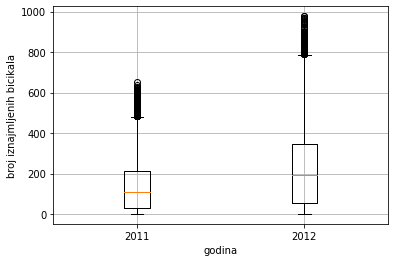

In [ ]:
#boxplot cnt kroz obe godine
data_hour_year=data_hour.set_index('yr')  
data_hour_year.head()

plt.boxplot([data_hour_year.loc[0,'cnt'],data_hour_year.loc[1,'cnt']])
plt.xlabel("godina")
plt.ylabel("broj iznajmljenih bicikala")
plt.xticks([1,2],['2011','2012'])
plt.grid()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


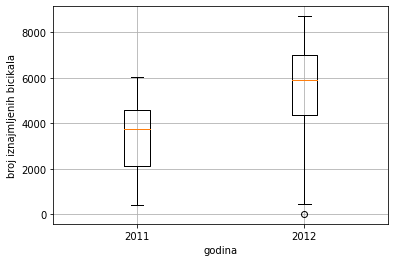

In [ ]:
#boxplot cnt kroz obe godine
data_day_year=data_day.set_index('yr')  
data_day_year.head()

plt.boxplot([data_day_year.loc[0,'cnt'],data_day_year.loc[1,'cnt']])
plt.xlabel("godina")
plt.ylabel("broj iznajmljenih bicikala")
plt.xticks([1,2],['2011','2012'])
plt.grid()

In [ ]:
#koji dan je zabelezena minimalna vrednost za cnt
data_day[data_day['cnt']==22]

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
667  2012-10-29       4   1    10        0        1           1           3   

     temp   atemp   hum  windspeed  casual  registered  cnt  
667  0.44  0.4394  0.88     0.3582       2          20   22

In [ ]:
data_day[data_day['cnt']<300]

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
667  2012-10-29       4   1    10        0        1           1           3   

     temp   atemp   hum  windspeed  casual  registered  cnt  
667  0.44  0.4394  0.88     0.3582       2          20   22

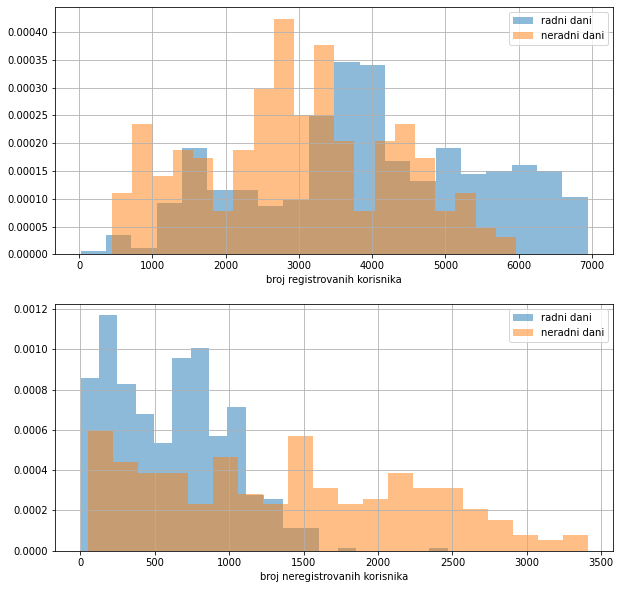

In [ ]:
#histogram  prikaz odnosa broja iznajmljivanja od strane registrovanih korisnika tokom radnih dana i neradnih dana(praznici i vikend)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
data_day_workingday=data_day.set_index('workingday')  
data_day_workingday.head()

plt.hist(data_day_workingday.loc[1,'registered'],bins=20,density=True,label='radni dani',alpha=0.5)
plt.hist(data_day_workingday.loc[0,'registered'],bins=20,density=True,label='neradni dani',alpha=0.5)
plt.grid()
plt.xlabel("broj registrovanih korisnika")
plt.legend()

plt.subplot(2,1,2)


plt.hist(data_day_workingday.loc[1,'casual'],density=True,bins=20,label='radni dani',alpha=0.5)
plt.hist(data_day_workingday.loc[0,'casual'],density=True,bins=20,label='neradni dani',alpha=0.5)
plt.grid()
plt.xlabel("broj neregistrovanih korisnika")
plt.legend()
 #


In [ ]:
gb_yr_mnth=data_day.groupby(['yr','mnth']).mean()
gb_yr_mnth

season   holiday   weekday  workingday  weathersit      temp  \
yr mnth                                                                   
0  1     1.000000  0.032258  2.935484    0.645161    1.483871  0.197707   
   2     1.000000  0.035714  3.000000    0.678571    1.321429  0.282540   
   3     1.354839  0.000000  3.000000    0.741935    1.516129  0.331667   
   4     2.000000  0.033333  3.166667    0.666667    1.566667  0.471188   
   5     2.000000  0.032258  2.806452    0.677419    1.387097  0.577231   
   6     2.333333  0.000000  3.033333    0.733333    1.300000  0.693083   
   7     3.000000  0.032258  3.064516    0.645161    1.129032  0.758575   
   8     3.000000  0.000000  2.903226    0.741935    1.258065  0.705362   
   9     3.266667  0.033333  3.100000    0.700000    1.733333  0.612887   
   10    4.000000  0.032258  2.935484    0.645161    1.516129  0.469976   
   11    4.000000  0.066667  2.966667    0.666667    1.433333  0.402338   
   12    2.935484  0.032258  3.193548    0.677419    1.419355  0.325182   
1  1     1.000000  0.064516  2.806452    0.645161    1.354839  0.275181   
   2     1.000000  0.034483  3.000000    0.689655    1.413793  0.315337   
   3     1.354839  0.000000  3.193548    0.709677    1.387097  0.449411   
   4     2.000000  0.033333  2.833333    0.666667    1.266667  0.468809   
   5     2.000000  0.032258  3.000000    0.709677    1.419355  0.612366   
   6     2.333333  0.000000  3.166667    0.700000    1.166667  0.675111   
   7     3.000000  0.032258  2.806452    0.677419    1.258065  0.752366   
   8     3.000000  0.000000  3.096774    0.741935    1.354839  0.711801   
   9     3.266667  0.033333  3.000000    0.633333    1.266667  0.620083   
   10    4.000000  0.032258  2.903226    0.709677    1.612903  0.500049   
   11    4.000000  0.066667  3.100000    0.666667    1.266667  0.336101   
   12    2.935484  0.032258  2.935484    0.645161    1.645161  0.322880   

            atemp       hum  windspeed       casual   registered          cnt  
yr mnth                                                                        
0  1     0.204490  0.584366   0.195419    99.129032  1132.774194  1231.903226  
   2     0.284412  0.560093   0.228568   222.928571  1499.035714  1721.964286  
   3     0.325299  0.569414   0.232408   413.741935  1652.225806  2065.967742  
   4     0.456775  0.668287   0.244216   744.866667  2417.466667  3162.333333  
   5     0.550814  0.713360   0.181274  1001.612903  3379.709677  4381.322581  
   6     0.646559  0.593250   0.178195  1020.400000  3763.333333  4783.733333  
   7     0.710660  0.589664   0.171667  1175.870968  3383.516129  4559.387097  
   8     0.655415  0.626831   0.190721   930.387097  3479.000000  4409.387097  
   9     0.568545  0.784054   0.152989   884.833333  3362.433333  4247.266667  
   10    0.458776  0.706795   0.175686   813.612903  3170.612903  3984.225806  
   11    0.399323  0.675310   0.180946   519.800000  2885.766667  3405.566667  
   12    0.329878  0.649183   0.168040   272.516129  2544.354839  2816.870968  
1  1     0.275102  0.587290   0.217187   289.322581  2831.451613  3120.774194  
   2     0.314522  0.574582   0.203244   300.724138  3255.724138  3556.448276  
   3     0.438608  0.607536   0.212991  1019.935484  4298.612903  5318.548387  
   4     0.457387  0.507839   0.224748  1281.866667  4525.600000  5807.466667  
   5     0.580510  0.664556   0.184704  1426.935484  4891.290323  6318.225806  
   6     0.629932  0.558361   0.192644  1443.133333  5317.866667  6761.000000  
   7     0.697528  0.606089   0.160450  1345.322581  5222.645161  6567.967742  
   8     0.647534  0.648629   0.155116  1393.451613  5526.000000  6919.451613  
   9     0.590053  0.645375   0.178901  1459.266667  5826.500000  7285.766667  
   10    0.485170  0.680727   0.174725  1114.129032  5300.096774  6414.225806  
   11    0.335395  0.574443   0.186657   700.300000  4388.500000  5088.800000  
   12    0.322441  0.682898   0.185178   427.258065  3563.48

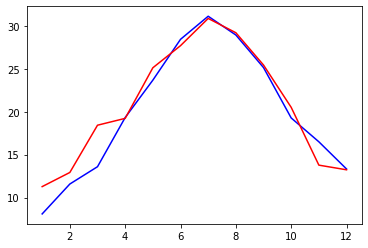

In [ ]:

g=data_day.groupby(['yr','mnth']).mean()
g['temp']=g['temp']*41
T_2011_temp=g.loc[0]['temp']
T_2012_temp=g.loc[1]['temp']
plt.plot(np.arange(1,13,1),T_2011_temp,'b',label="2011")
plt.plot(np.arange(1,13,1),T_2012_temp,'r',label="2012")


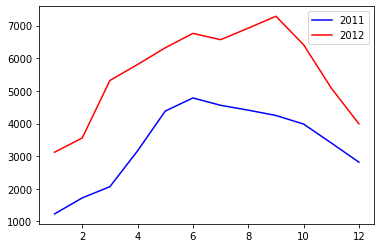

In [ ]:
g=data_day.groupby(['yr','mnth']).mean()
g['temp']=g['temp']*41
T_2011_cnt=g.loc[0]['cnt']
T_2012_cnt=g.loc[1]['cnt']
plt.plot(np.arange(1,13,1),T_2011_cnt,'b',label="2011")
plt.plot(np.arange(1,13,1),T_2012_cnt,'r',label="2012")
plt.legend()



Text(0, 0.5, 'prosecna temperatura u celzijusima')

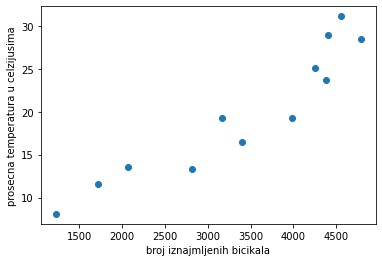

In [ ]:
plt.scatter(T_2011_cnt,T_2011_temp)
plt.xlabel('broj iznajmljenih bicikala')
plt.ylabel('prosecna temperatura u celzijusima')


In [ ]:
data_day['weathersit'].unique()
data_hour[data_hour['weathersit']==4].count()
#samo za tri sata su zabelezeni najlosiji vremenski uslovi

dteday        3
season        3
yr            3
mnth          3
hr            3
holiday       3
weekday       3
workingday    3
weathersit    3
temp          3
atemp         3
hum           3
windspeed     3
casual        3
registered    3
cnt           3
dtype: int64

[11413  4544  1419     3]
[1875428  661471  135548     215]
[462745 134481  22783      8]
[7.01707885e-01 2.47495194e-01 5.07164767e-02 8.04441415e-05]
2672662


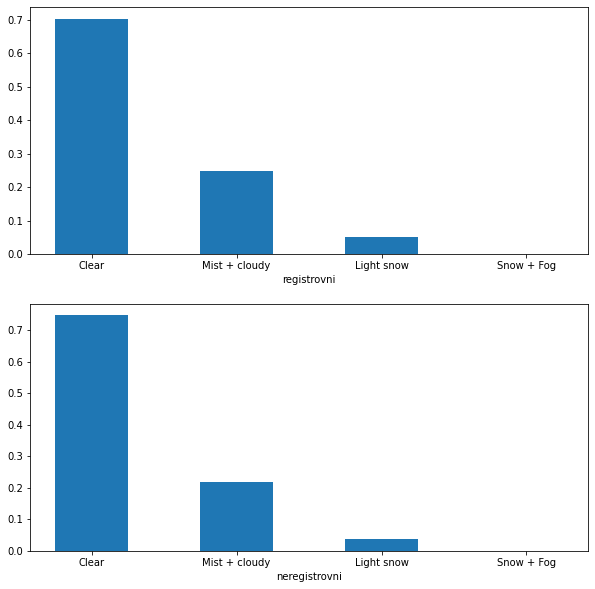

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
data_gb_weathersit = (data_hour.groupby('weathersit').sum()['registered']).to_numpy()
categories = data_hour['weathersit'].value_counts().index
counts = data_hour['weathersit'].value_counts().values
print(counts)
br_uzoraka=data_gb_weathersit.sum()
print(data_gb_weathersit)
data_gb_weathersit=data_gb_weathersit/br_uzoraka
plt.bar(categories,data_gb_weathersit , width=0.5 )
plt.xticks((1, 2,3,4), ('Clear', 'Mist + cloudy',  'Light snow','Snow + Fog'))
plt.xlabel("registrovni")

plt.subplot(2,1,2)
data_gb_weathersit1 = (data_hour.groupby('weathersit').sum()['casual']).to_numpy()
categories = data_hour['weathersit'].value_counts().index
br_uzoraka1=data_gb_weathersit1.sum()
print(data_gb_weathersit1)
data_gb_weathersit1=data_gb_weathersit1/br_uzoraka1
plt.bar(categories,data_gb_weathersit1 , width=0.5 )
plt.xticks((1, 2,3,4), ('Clear', 'Mist + cloudy',  'Light snow','Snow + Fog'))
plt.xlabel("neregistrovni")

#broj iz
print(data_gb_weathersit)
print(br_uzoraka)
#prikaz broja iznajmnljivanja od strane registrovanih korisnika u zavisnosti od vremenskih uslova po satima


vrednosti pre normalizacije [ 683537 1989125]
vrednosti nakon normalizacije [0.25575138 0.74424862]
vrednosti pre normalizacije [316732 303285]
vrednosti nakon normalizacije [0.51084406 0.48915594]


([<matplotlib.axis.XTick at 0x7fe61bc029d0>,
 [Text(0, 0, 'Radni dani'), Text(0, 0, 'Neradni dani')])

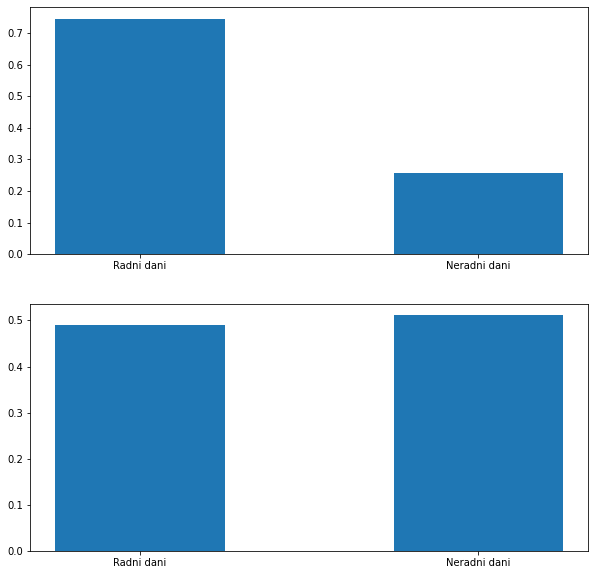

In [ ]:
#bins - predstaviti broj iznajmljivanja od strane registrovanih korisnika u odnosu na radne i neradne dane(vikend i praznik)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
data_gb_workingday = (data_hour.groupby('workingday').sum()['registered']).to_numpy()
categories = data_hour['workingday'].value_counts().index

br_uzoraka=data_gb_workingday.sum()
print("vrednosti pre normalizacije",data_gb_workingday)
data_gb_workingday=data_gb_workingday/br_uzoraka
print("vrednosti nakon normalizacije",data_gb_workingday)
plt.bar(categories,data_gb_workingday , width=0.5)
plt.xticks((0, 1), ('Radni dani','Neradni dani'))

plt.subplot(2,1,2)
data_gb_workingday1 = (data_hour.groupby('workingday').sum()['casual']).to_numpy()
categories = data_hour['workingday'].value_counts().index

br_uzoraka1=data_gb_workingday1.sum()
print("vrednosti pre normalizacije",data_gb_workingday1)
data_gb_workingday1=data_gb_workingday1/br_uzoraka1
print("vrednosti nakon normalizacije",data_gb_workingday1)
plt.bar(categories,data_gb_workingday1 , width=0.5)
plt.xticks((0, 1), ('Radni dani','Neradni dani'))

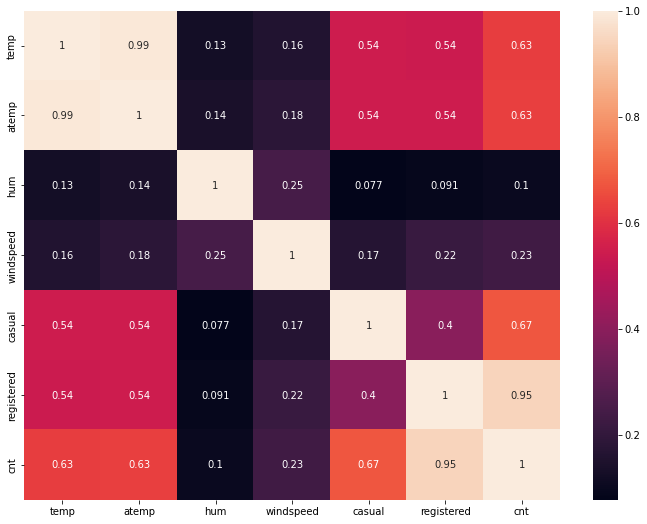

In [ ]:
#nema smisla da se porede obeležja koje uzimaju vrednosti 0 i 1, i vrednosti koje su kontinualtne
data_without_some_columns=data_day.drop(['yr','mnth','dteday','season', 'holiday','weekday','workingday','weathersit'], axis=1)
corr = data_without_some_columns.corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr.abs(), annot=True);
# Na matrici korelacije može se primetiti da su korelacije velike između obeležja cnt i registered,cnt i casual, cnt i temp, atemp i temp. Razlog za manju korelaciju 
#između cnt i casual u donosu na cnt i registered je, manji udeo običnih korisnika od registrovanih. Dok se između ostalih obeležja ne primećije značajnija korelacija.

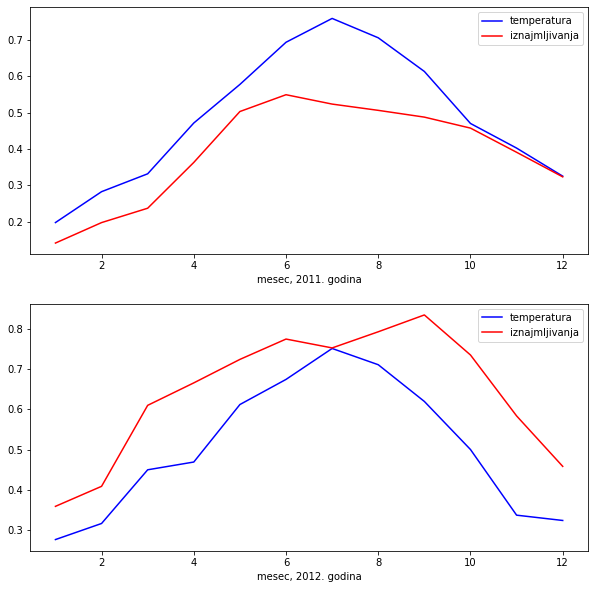

In [ ]:
g=data_day.groupby(['yr','mnth']).mean()

g['cnt']=g['cnt']/8714

T_2011_windspeed=g.loc[0]['windspeed']
T_2012_windspeed=g.loc[1]['windspeed']

T_2011_hum=g.loc[0]['hum']
T_2012_hum=g.loc[1]['hum']

T_2011_temp=g.loc[0]['temp']
T_2012_temp=g.loc[1]['temp']

T_2011_cnt=g.loc[0]['cnt']
T_2012_cnt=g.loc[1]['cnt']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

plt.plot(np.arange(1,13,1),T_2011_temp,'b',label="temperatura")
plt.plot(np.arange(1,13,1),T_2011_cnt,'r',label="iznajmljivanja")
plt.xlabel("mesec, 2011. godina")
plt.legend()

plt.subplot(2,1,2)

plt.plot(np.arange(1,13,1),T_2012_temp,'b',label="temperatura")
plt.plot(np.arange(1,13,1),T_2012_cnt,'r',label="iznajmljivanja")
plt.xlabel("mesec, 2012. godina")
plt.legend()


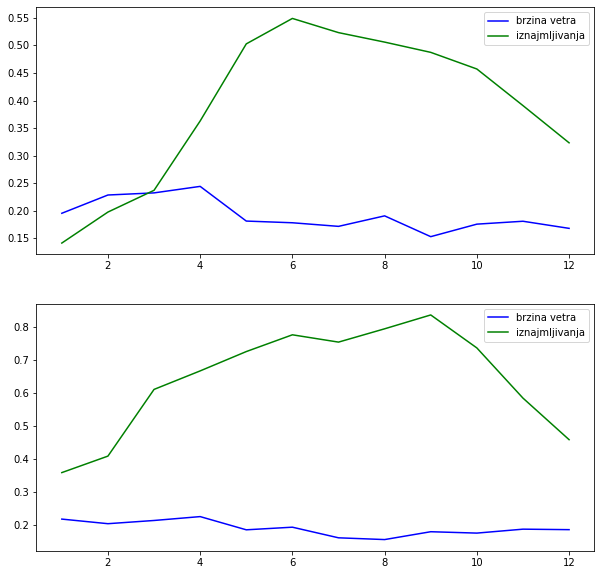

In [ ]:
#analiza zavisnosti brzine vetra i iznajmljivanja 
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

plt.plot(np.arange(1,13,1),T_2011_windspeed,'b',label="brzina vetra")
plt.plot(np.arange(1,13,1),T_2011_cnt,'g',label="iznajmljivanja")
plt.legend()

plt.subplot(2,1,2)

plt.plot(np.arange(1,13,1),T_2012_windspeed,'b',label="brzina vetra")
plt.plot(np.arange(1,13,1),T_2012_cnt,'g',label="iznajmljivanja")

plt.legend()

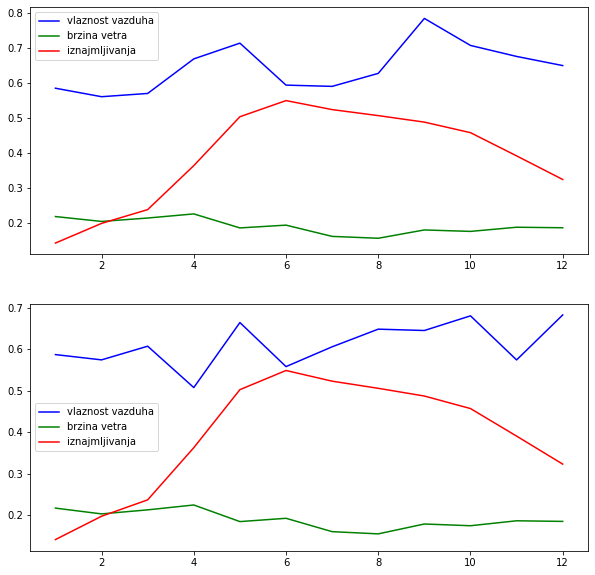

In [ ]:
#analiza zavisnosti temperature i vlaznosti vazduha
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

plt.plot(np.arange(1,13,1),T_2011_hum,'b',label="vlaznost vazduha")
plt.plot(np.arange(1,13,1),T_2012_windspeed,'g',label="brzina vetra")
plt.plot(np.arange(1,13,1),T_2011_cnt,'r',label="iznajmljivanja")

plt.legend()

plt.subplot(2,1,2)

plt.plot(np.arange(1,13,1),T_2012_hum,'b',label="vlaznost vazduha")
plt.plot(np.arange(1,13,1),T_2012_windspeed,'g',label="brzina vetra")
plt.plot(np.arange(1,13,1),T_2011_cnt,'r',label="iznajmljivanja")

plt.legend()

In [ ]:
#moglo bi poredjenje temperatura izmedju registrovanih i neregistrovanih


## Regresija

In [ ]:
 x=data_day.drop(['casual', 'registered','cnt','dteday'], axis=1)
 #ovde smo izbacili obelezje dteday zato sto postoje obelezja koja predstavljaju iste te vrednosti samo pojedinacni
 y_cnt=data_day['cnt']
 print(x.shape)
 print(x.columns)
 x.head()

# #probali samo da izbacimo neka obelezja koja su presla prag 10%, odnosno 0.1 vrednost, granicna vrednost, to su obelezja workingday i temp
# #medjutim ovo ne daje bolje rezultate
# x=data_day.drop(['casual', 'registered','cnt','dteday','workingday'], axis=1)
# #ovde smo izbacili obelezje dteday zato sto postoje obelezja koja predstavljaju iste te vrednosti samo pojedinacni
# y_cnt=data_day['cnt']
# print(x.shape)
# print(x.columns)
# x.head()

(731, 11)
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')


season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed  
0  0.363625  0.805833   0.160446  
1  0.353739  0.696087   0.248539  
2  0.189405  0.437273   0.248309  
3  0.212122  0.590435   0.160296  
4  0.229270  0.436957   0.186900

In [ ]:
#statisticka analiza
x.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  
count  731.000000  731.000000  731.000000  731.000000  731.000000  
mean     1.395349    0.495385    0.474354    0.627894    0.190486  
std      0.544894    0.183051    0.162961    0.142429    0.077498  
min      1.000000    0.059130    0.079070    0.000000    0.022392  
25%      1.000000    0.337083    0.337842    0.520000    0.134950  
50%      1.000000    0.498333    0.486733    0.626667    0.180975  
75%      2.000000    0.655417    0.608602    0.730209    0.233214  
max      3.000000    0.861667    0.840896    0.972500    0.507463

In [ ]:
y_cnt.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

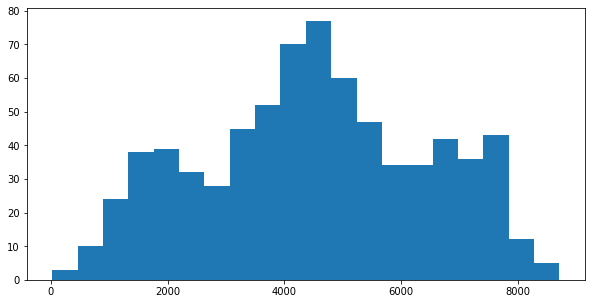

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(y_cnt, bins=20)
plt.show()

In [ ]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_cnt_test, y_predicted) # np.mean((y_test-y_predicted)**2)
    mae = mean_absolute_error(y_cnt_test, y_predicted) # np.mean(np.abs(y_test-y_predicted))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_cnt_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

Deljenje skupa na tenst i trening skup

In [ ]:
# podela skupa na trening i test podatke
x_train, x_test, y_cnt_train, y_cnt_test = train_test_split(x, y_cnt, test_size=0.05, random_state=42)

Mean squared error:  652840.3078259601
Mean absolute error:  614.2012110509826
Root mean squared error:  807.9853388682001
R2 score:  0.8597946249589912
R2 adjusted score:  0.8575332479422006
       y       y_pred
0   6606  6174.651507
1   1550  1529.805919
2   3747  2960.250543
3   6041  4367.003172
4   7538  6718.506736
5   7264  7230.338338
6   1605   764.109478
7   2209  2065.729587
8   7499  7151.074285
9   5743  6418.705822
10  1796  2889.281343
11  3068  2129.766247
12  4891  4024.147916
13  5260  5402.856950
14  2133  2407.932275
15  2471  2060.264688
16  2046  2396.759286
17  8156  7423.375697
18  5362  5686.995452
19  2298  2895.396074


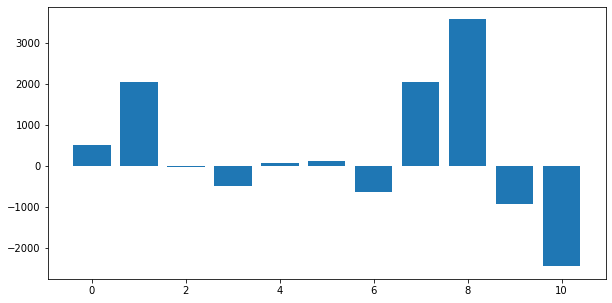

koeficijenti:  [  512.25408833  2050.70449713   -40.8101314   -490.61633787
    72.60123378   104.10323492  -631.24223905  2051.88709185
  3574.46805196  -938.77257593 -2460.33890191]


In [ ]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)

# Obuka
first_regression_model.fit(x_train, y_cnt_train)

# Testiranje
y_cnt_predicted = first_regression_model.predict(x_test)

# Evaluacija
model_evaluation(y_cnt_test, y_cnt_predicted, x_train.shape[0], x_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)
#sada zelimo

In [ ]:
# Selekcija obelezja
import statsmodels.api as sm
X = sm.add_constant(x_train)

model = sm.OLS(y_cnt_train, X.astype('float')).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     242.1
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          5.61e-227
Time:                        08:13:41   Log-Likelihood:                -5680.8
No. Observations:                 694   AIC:                         1.139e+04
Df Residuals:                     682   BIC:                         1.144e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1410.8554    249.792      5.648      0.000     920.402    1901.309
season       512.2541     58.309      8.785      0.000     397.767     626.741
yr          2050.7045     67.211     30.511      0.000    1918.739    2182.670
mnth         -40.8101     18.228     -2.239      0.025     -76.600      -5.021
holiday     -490.6163    206.729     -2.373      0.018    -896.518     -84.714
weekday       72.6012     16.668      4.356      0.000      39.875     105.327
workingday   104.1032     73.638      1.414      0.158     -40.482     248.688
weathersit  -631.2422     80.816     -7.811      0.000    -789.921    -472.564
temp        2051.8871   1423.171      1.442      0.150    -742.435    4846.209
atemp       3574.4681   1611.667      2.218      0.027     410.042    6738.894
hum         -938.7726    325.626     -2.883      0.004   -1578.123    -299.422
windspeed  -2460.3389    473.553     -5.195      0.000   -3390.135   -1530.542
==============================================================================
Omnibus:                       82.949   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.945
Skew:                          -0.706   Prob(JB):                     5.60e-37
Kurtosis:                       4.944   Cond. No.                         553.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Standardizacija obelezja (svodjenje na sr.vr. 0 i varijansu 1)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

season        yr      mnth  holiday   weekday  workingday  weathersit  \
0  0.448023  1.005780  0.430215 -0.17226  1.486145   -1.443761    1.090095   
1  1.351883 -0.994253  1.301527 -0.17226  0.000000    0.692636    1.090095   
2 -1.359698 -0.994253 -1.602845 -0.17226 -0.495382    0.692636    1.090095   
3 -0.455837 -0.994253 -0.731533 -0.17226  0.000000    0.692636   -0.732859   
4 -1.359698  1.005780 -1.021971 -0.17226 -0.495382    0.692636   -0.732859   

       temp     atemp       hum  windspeed  
0  0.899076  0.876584  0.574661   0.697440  
1 -0.310006 -0.281305  0.889446   1.876606  
2 -1.797812 -1.752507  0.388917  -0.879768  
3  0.534069  0.542409 -0.116117   0.665413  
4 -1.309206 -1.361262 -1.217864   0.135919

Mean squared error:  652840.3078259638
Mean absolute error:  614.2012110509871
Root mean squared error:  807.9853388682023
R2 score:  0.8597946249589904
R2 adjusted score:  0.8575332479421999
       y       y_pred
0   6606  6174.651507
1   1550  1529.805919
2   3747  2960.250543
3   6041  4367.003172
4   7538  6718.506736
5   7264  7230.338338
6   1605   764.109478
7   2209  2065.729587
8   7499  7151.074285
9   5743  6418.705822
10  1796  2889.281343
11  3068  2129.766247
12  4891  4024.147916
13  5260  5402.856950
14  2133  2407.932275
15  2471  2060.264688
16  2046  2396.759286
17  8156  7423.375697
18  5362  5686.995452
19  2298  2895.396074


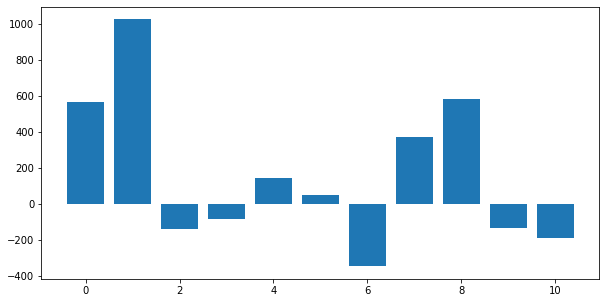

koeficijenti:  [ 566.74027248 1025.33521727 -140.51276382  -82.07813544  146.55612327
   48.7284318  -346.27426977  374.769056    580.85734599 -134.2020152
 -190.74236928]


In [ ]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
regression_model_std = LinearRegression()

# Obuka modela
regression_model_std.fit(x_train_std, y_cnt_train)

# Testiranje
y_predicted = regression_model_std.predict(x_test_std)

# Evaluacija
model_evaluation(y_cnt_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
plt.show()
print("koeficijenti: ", regression_model_std.coef_)

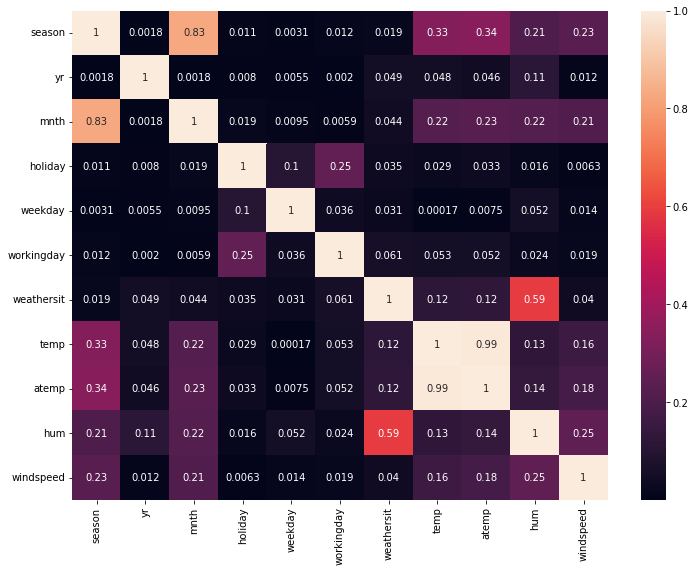

In [ ]:
corr = x.corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr.abs(), annot=True);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x7 x8', 'x7 x9', 'x7 x10', 'x8 x9', 'x8 x10', 'x9 x10']
Mean squared error:  436817.6521194046
Mean absolute error:  472.79138513513516
Root mean squared error:  660.9218199752559
R2 score:  0.9061881106209805
R2 adjusted score:  0.8963131748968731
       y       y_pred
0   6606  6466.671875
1   1550  1290.828125
2   3747  3372.890625
3   6041  4863.953125
4   7538  7244.250000
5   7264  7144.328125
6   1605   330.421875
7   2209  3337.656250
8   7499  7677.140625
9   5743  6467

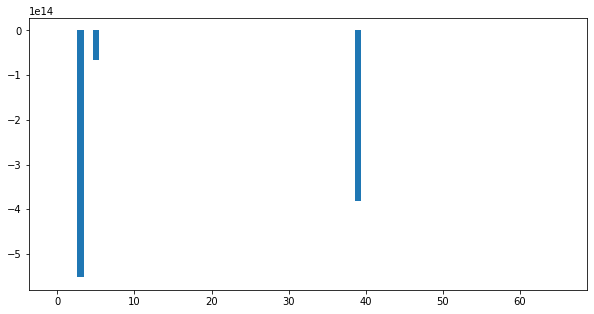

koeficijenti:  [ 3.94518067e+02  9.85144342e+02  4.62729812e+01 -5.52446796e+14
  1.17360587e+02 -6.59144065e+13 -2.84834653e+02  2.02666453e+03
 -1.18518850e+03 -2.49512262e+02 -2.54723303e+02 -1.78913204e+01
 -2.27469720e+02  1.66665370e+01  3.97939904e+01 -1.84622152e+02
  9.48531032e+01 -1.68998267e+03  1.40202432e+03 -4.87716266e+01
  2.20881773e+01  5.84036821e+01 -2.13420377e+01  6.07205724e+01
  2.78630503e+01 -2.13920087e+01 -3.09015444e+02  4.66834343e+02
 -7.43090908e+01 -1.43288439e+01  9.08614991e+00 -2.76515874e+01
  2.20937169e+02 -5.17500000e+01 -2.20328125e+02  6.10687500e+02
 -1.13250000e+02  3.14687500e+01 -1.01908203e+02 -3.82644343e+14
  7.39765625e+01 -5.33085938e+01  1.33015625e+02 -4.69804688e+01
  5.19771729e+01 -2.43125000e+01  2.31660156e+01 -7.24062500e+02
  7.35078125e+02 -1.99921875e+01  2.56424561e+01 -8.03125000e+00
 -3.25234375e+01  7.51953125e+00 -3.90156250e+01  4.25449219e+01
  3.97812500e+02 -4.26890625e+02 -1.14453125e+02 -1.37000000e+02
 -5.506250

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

print(poly.get_feature_names())

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...

# Inicijalizacija
regression_model_inter = LinearRegression()

# Obuka modela
regression_model_inter.fit(x_inter_train, y_cnt_train)

# Testiranje
y_predicted = regression_model_inter.predict(x_inter_test)

# Evaluacija
model_evaluation(y_cnt_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
plt.show()
print("koeficijenti: ", regression_model_inter.coef_)

Mean squared error:  400064.2279877534
Mean absolute error:  448.7246621621622
Root mean squared error:  632.5063066782444
R2 score:  0.9140813542712992
R2 adjusted score:  0.9033415235552116
       y      y_pred
0   6606  6547.68750
1   1550  1523.75000
2   3747  3496.34375
3   6041  4999.15625
4   7538  7305.71875
5   7264  7049.15625
6   1605   729.56250
7   2209  2746.15625
8   7499  7052.40625
9   5743  6242.50000
10  1796  1798.81250
11  3068  3245.78125
12  4891  4471.56250
13  5260  5377.65625
14  2133  2359.28125
15  2471  2620.62500
16  2046  2657.15625
17  8156  7637.15625
18  5362  4896.03125
19  2298   973.31250


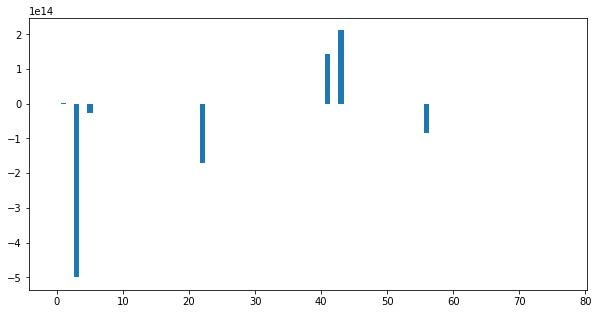

koeficijenti:  [ 2.90029615e+02  1.97262708e+12  1.51997360e+02 -5.00260554e+14
  1.05693177e+02 -2.59942259e+13 -2.06657463e+02  2.97498006e+03
 -2.16595471e+03 -3.07432249e+02 -3.22343411e+02 -1.73388635e+02
  5.50813308e+01  1.59309050e+01  1.65504924e+01  3.14834390e+01
 -1.55371642e+02 -2.10197936e+00 -3.22154381e+02  2.13441501e+02
  3.63255332e+01 -3.53097384e+01 -1.71122557e+14 -9.19072071e+00
 -1.20092122e+01  5.85553559e+01  3.11532756e+01 -4.39881095e+01
 -8.65262113e+02  1.03150279e+03 -6.25897637e+01  6.37876408e+00
 -1.14490428e+02  1.60781250e+01 -2.34062500e+01  2.01505859e+02
  1.28886719e+01 -1.27760156e+03  1.50155469e+03 -1.35660156e+02
  9.75126953e+01  1.43005439e+14 -8.26718750e+01  2.11445176e+14
  7.31328125e+01  3.81406250e+01  5.03925781e+01 -4.95156250e+01
  4.71093750e+01 -4.57500000e+01 -3.57890625e+01  3.48046875e+01
 -9.92606934e+02  1.01498438e+03 -5.69746094e+01  2.79609375e+01
 -8.30991287e+13  2.50976562e+01 -2.19031250e+02  1.86531250e+02
 -7.818359

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2

# Inicijalizacija
regression_model_degree = LinearRegression()

# Obuka modela
regression_model_degree.fit(x_inter_train, y_cnt_train)

# Testiranje
y_predicted = regression_model_degree.predict(x_inter_test)

# Evaluacija
model_evaluation(y_cnt_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
plt.show()
print("koeficijenti: ", regression_model_degree.coef_)

Mean squared error:  365240.12884285155
Mean absolute error:  446.91695550843684
Root mean squared error:  604.3509980490242
R2 score:  0.9215602519780534
R2 adjusted score:  0.91175528347531
       y       y_pred
0   6606  6390.342462
1   1550  1385.401505
2   3747  3537.166806
3   6041  5046.779048
4   7538  7210.108810
5   7264  7151.198132
6   1605   684.502819
7   2209  2862.170049
8   7499  6882.500155
9   5743  6144.317187
10  1796  1690.974867
11  3068  3263.702540
12  4891  4711.248953
13  5260  5449.784309
14  2133  2437.577023
15  2471  2539.528995
16  2046  2746.515427
17  8156  7643.156077
18  5362  4583.818495
19  2298  1184.769217


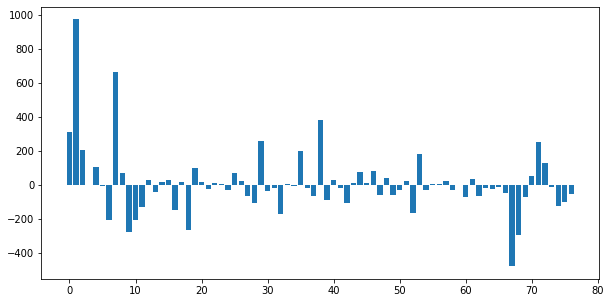

koeficijenti:  [ 3.08243662e+02  9.72406091e+02  2.01916438e+02 -3.83165373e+00
  1.06217745e+02 -7.22837370e+00 -2.08793091e+02  6.64153293e+02
  6.74028675e+01 -2.79886899e+02 -2.07703134e+02 -1.32486948e+02
  2.97166947e+01 -4.41383485e+01  1.69671320e+01  2.83724603e+01
 -1.48413878e+02  1.38965522e+01 -2.69115174e+02  9.74365723e+01
  1.33045420e+01 -2.75972521e+01  1.12094783e+01  5.49701801e+00
 -2.88084760e+01  6.98346694e+01  2.07090369e+01 -6.47285043e+01
 -1.10706774e+02  2.55476193e+02 -3.74569737e+01 -2.03579077e+01
 -1.70950151e+02  3.55755713e+00 -8.32567169e+00  1.95884492e+02
 -1.95203504e+01 -6.47994946e+01  3.80193806e+02 -9.04743059e+01
  2.57592329e+01 -2.15833601e+01 -1.05749398e+02  6.77715178e+00
  7.28503240e+01  8.32113472e+00  7.77972708e+01 -6.09035713e+01
  4.01482629e+01 -6.20582388e+01 -3.18507618e+01  1.90740111e+01
 -1.68553096e+02  1.82509314e+02 -2.88369989e+01  3.32692850e+00
  5.42941131e+00  2.24206024e+01 -2.91358594e+01  6.68214604e-01
 -7.314427

In [ ]:
# Inicijalizacija
ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_inter_train, y_cnt_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_cnt_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

Mean squared error:  403059.1473726286
Mean absolute error:  454.39774542683244
Root mean squared error:  634.8693939485731
R2 score:  0.9134381590051057
R2 adjusted score:  0.9026179288807439
       y       y_pred
0   6606  6518.917926
1   1550  1511.230105
2   3747  3488.300412
3   6041  4997.971722
4   7538  7317.065289
5   7264  7057.179582
6   1605   685.998506
7   2209  2649.372972
8   7499  6974.896132
9   5743  6231.569901
10  1796  1855.515800
11  3068  3276.470735
12  4891  4483.174729
13  5260  5393.939726
14  2133  2364.023296
15  2471  2603.792541
16  2046  2666.789989
17  8156  7647.760235
18  5362  4824.766932
19  2298   941.594259


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+08, tolerance: 2.567e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


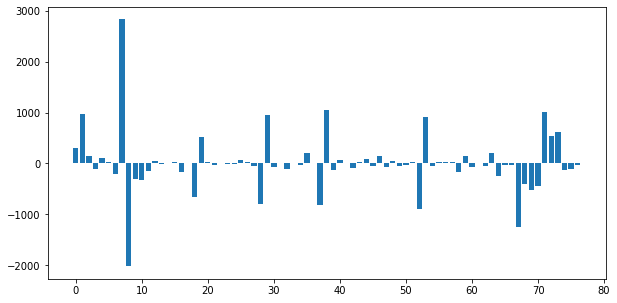

koeficijenti:  [ 2.96919651e+02  9.72303649e+02  1.50439882e+02 -1.05480999e+02
  1.04546357e+02  2.21486614e+01 -2.08015648e+02  2.83285845e+03
 -2.02330909e+03 -3.07779878e+02 -3.15889170e+02 -1.53372027e+02
  5.51435881e+01 -5.51666861e+00  1.18638240e+01  3.44851472e+01
 -1.59668632e+02  6.46879285e+00 -6.59884475e+02  5.26627579e+02
  2.47689195e+01 -2.21998407e+01  0.00000000e+00 -7.60424681e+00
 -1.58118445e+01  6.00150929e+01  2.82814601e+01 -4.84399652e+01
 -7.94197676e+02  9.55747738e+02 -6.14479127e+01  1.03546669e+00
 -1.11362067e+02  1.62267166e+01 -2.60198525e+01  2.03003177e+02
  2.49725902e+00 -8.08515133e+02  1.05998640e+03 -1.20593350e+02
  7.72699202e+01  2.59962006e+00 -8.65093114e+01  2.74783104e+01
  8.11792762e+01 -4.68398453e+01  1.42072632e+02 -5.97809735e+01
  4.78837684e+01 -4.91883277e+01 -3.67844238e+01  3.52253133e+01
 -9.01533213e+02  9.22614188e+02 -5.43771570e+01  2.64071940e+01
  2.56944606e+01  2.38198079e+01 -1.68946771e+02  1.39119978e+02
 -7.749964

In [ ]:
# Model initialization
lasso_model = Lasso(alpha=0.01)

# Fit the data(train the model)
lasso_model.fit(x_inter_train, y_cnt_train)

# Predict
y_predicted = lasso_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_cnt_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
plt.show()
print("koeficijenti: ", lasso_model.coef_)

## Unakrsna validacija nad Ridge regresijom, kao modelom koji je dao najbolje rezultate 

stepen kaznjavanja je 0.5
prosecna vrednost za r2 score je:  0.7982309388720439
prosecna vrednost za rmse score je:  858.2830688403579
[0.7375208016101416, 0.8254952561355742, 0.8316767588704158]
[974.7213167445022, 814.0664380839207, 786.0614516926508]


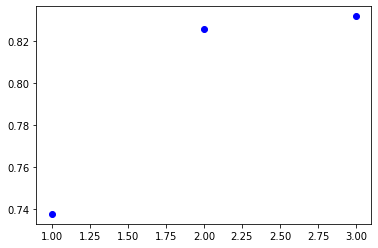

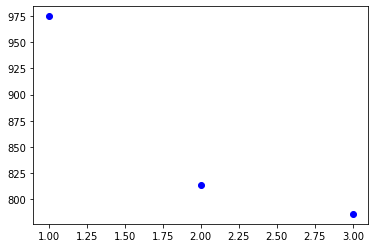

stepen kaznjavanja je 1
prosecna vrednost za r2 score je:  0.8094783279861298
prosecna vrednost za rmse score je:  836.6133960454957
[0.7707180539281084, 0.82447926828358, 0.8332376617467011]
[910.9991003586833, 816.432795705018, 782.4082920727858]


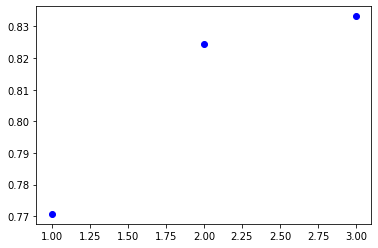

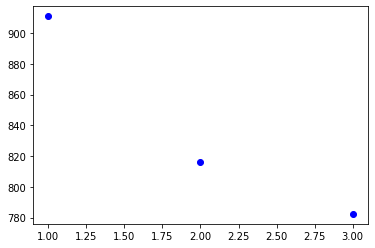

stepen kaznjavanja je 5
prosecna vrednost za r2 score je:  0.8271493007561358
prosecna vrednost za rmse score je:  799.0906475239238
[0.8212410269265403, 0.8225835185441912, 0.8376233567976757]
[804.39052068003, 820.8299841570467, 772.0514377346947]


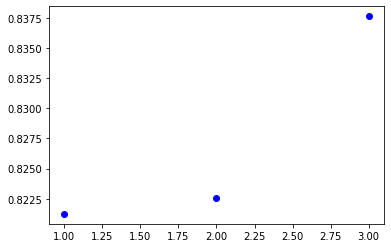

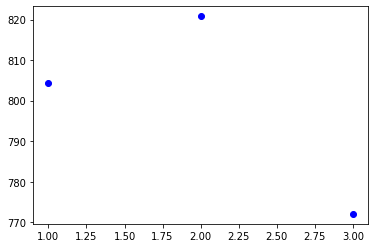

stepen kaznjavanja je 7
prosecna vrednost za r2 score je:  0.8293695635324241
prosecna vrednost za rmse score je:  794.010044972811
[0.8266294583479641, 0.8226567124925837, 0.8388225197567247]
[792.17415906792, 820.6606481832129, 769.1953276672999]


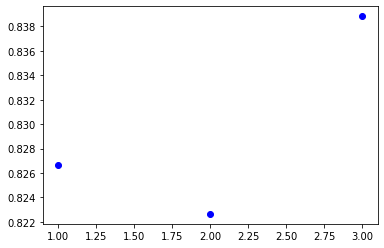

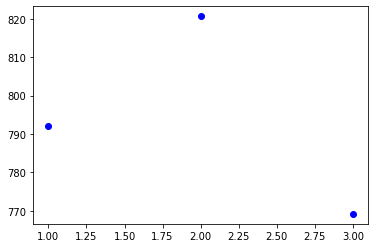

stepen kaznjavanja je 10
prosecna vrednost za r2 score je:  0.8317647562181049
prosecna vrednost za rmse score je:  788.4489275178303
[0.832085663101021, 0.8228886244898692, 0.8403199810634245]
[779.6091144902067, 820.1238832620149, 765.6137848012693]


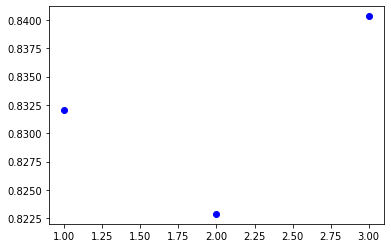

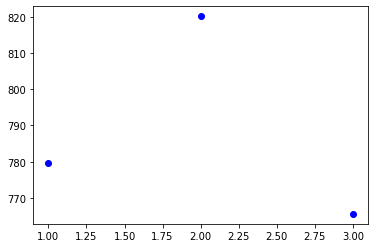

stepen kaznjavanja je 20
prosecna vrednost za r2 score je:  0.8369424020745534
prosecna vrednost za rmse score je:  776.1682654575043
[0.8437039578978114, 0.8234025572664532, 0.8437206910593957]
[752.1544143947224, 818.9331219368721, 757.4172600409184]


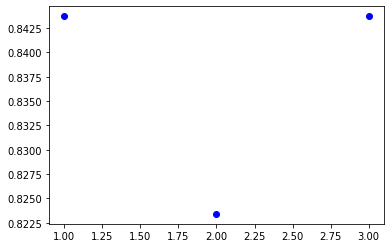

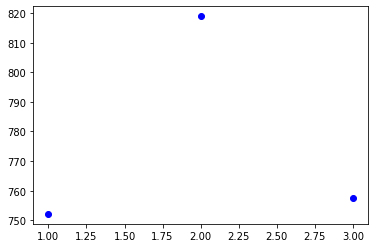

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for alp in [0.5,1,5 ,7,10,20]:
  print("stepen kaznjavanja je", alp)
  indexes = kf.split(x_inter_train)#ovde ne treba da se prosledi y zato sto nekmomo klase pa ne treba da se brine o odnosu klasa u podeljenim skupovima
  rmse_val = [] #to store rmse values for different k
  r2_val=[]

  for train_index, test_index in indexes:
      X_train = x_inter_train[train_index,:]
      X_test = x_inter_train[test_index,:]
      y_train = y_cnt_train.iloc[train_index]
      y_test = y_cnt_train.iloc[test_index]
      
      ridge_model = Ridge(alpha=alp)
      ridge_model.fit(X_train, y_train)
      y_predicted = ridge_model.predict(X_test)

      error = np.sqrt(mean_squared_error(y_test,y_predicted)) #calculate rmse
      error_r2= r2_score(y_test, y_predicted)
      rmse_val.append(error) #store rmse values
      r2_val.append(error_r2)
  print('prosecna vrednost za r2 score je: ',np.mean(r2_val))
  print('prosecna vrednost za rmse score je: ',np.mean(rmse_val))
  print(r2_val)
  print(rmse_val)
  x = [1,2,3]
  plt.scatter(x, r2_val, c ="blue")
  plt.show()
  plt.scatter(x, rmse_val, c ="blue")
  plt.show()



#Sada treba da se uradi testiranje nad trening skupom, i da se se uporede dobijeni rezultati sa rezultatima iz unakrsne validacije

In [ ]:
ridge_model = Ridge(alpha=20)
ridge_model.fit(x_inter_train, y_cnt_train)
y_predicted = ridge_model.predict(x_inter_test)
model_evaluation(y_cnt_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

Mean squared error:  348243.8331585967
Mean absolute error:  439.63969640067523
Root mean squared error:  590.1218799185442
R2 score:  0.9252104126408569
R2 adjusted score:  0.915861714220964
       y       y_pred
0   6606  6327.632601
1   1550  1371.998385
2   3747  3580.330613
3   6041  5050.575863
4   7538  7130.300525
5   7264  7192.723456
6   1605   734.847047
7   2209  2915.158377
8   7499  6923.433500
9   5743  6128.006822
10  1796  1755.141790
11  3068  3169.182859
12  4891  4723.541673
13  5260  5461.678306
14  2133  2469.091666
15  2471  2577.391365
16  2046  2796.341763
17  8156  7598.271646
18  5362  4617.493471
19  2298  1291.633742


## KNN

Knn bez unakrsne

In [ ]:
# podela podataka na trening i test
#x_train, x_test, y_train, y_test = train_test_split(x, y_cnt, test_size=0.05, random_state=10)

knn_model = KNeighborsRegressor(n_neighbors = 8)

# Obuka
knn_model.fit(x_train, y_cnt_train)

# Testiranje
y_knn_predicted = knn_model.predict(x_test)

# Evaluacija
model_evaluation(y_cnt_test, y_knn_predicted, x_train.shape[0], x_train.shape[1])

#ove ne postoje tezinski koeficijenti


Mean squared error:  594662.6456925676
Mean absolute error:  580.706081081081
Root mean squared error:  771.1437257039491
R2 score:  0.8722889835956149
R2 adjusted score:  0.8702291284923184
       y    y_pred
0   6606  5026.625
1   1550  1811.000
2   3747  4271.250
3   6041  4759.125
4   7538  7521.375
5   7264  6819.250
6   1605  1886.875
7   2209  2437.375
8   7499  6347.250
9   5743  5882.000
10  1796  1513.250
11  3068  2457.125
12  4891  5032.250
13  5260  5161.750
14  2133  2152.125
15  2471  2347.750
16  2046  3280.500
17  8156  5863.875
18  5362  4793.500
19  2298  2622.125


iteracija: 1
Broj suseda k: 1 i metrika m: euclidean
Mean squared error:  1009541.972972973
Mean absolute error:  631.5945945945946
Root mean squared error:  1004.7596593081219
R2 score:  0.7831886155870611
R2 adjusted score:  0.7796916577739492
       y  y_pred
0   6606  6234.0
1   1550  1538.0
2   3747  4046.0
3   6041  6304.0
4   7538  7733.0
5   7264  5713.0
6   1605  1526.0
7   2209  2999.0
8   7499  5870.0
9   5743  6825.0
10  1796  1787.0
11  3068  2660.0
12  4891  4833.0
13  5260  5495.0
14  2133  1851.0
15  2471  2417.0
16  2046  1851.0
17  8156  7282.0
18  5362  5538.0
19  2298  1951.0
iteracija: 2
Broj suseda k: 2 i metrika m: euclidean
Mean squared error:  1050192.310810811
Mean absolute error:  692.2432432432432
Root mean squared error:  1024.7889103668183
R2 score:  0.7744584624488802
R2 adjusted score:  0.7708206957141848
       y  y_pred
0   6606  5750.5
1   1550  2006.5
2   3747  4175.0
3   6041  4599.5
4   7538  7633.5
5   7264  6943.0
6   1605  1721.5
7   2209  2711.

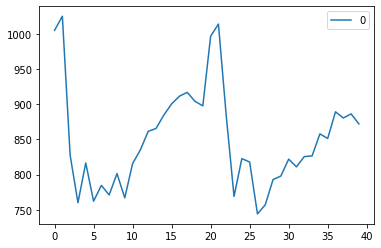

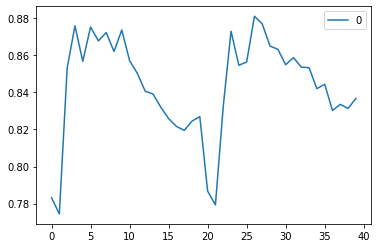

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
r2_val=[]
br_iteracija=0
for m in ['euclidean', 'manhattan']:
  for K in range(20):
      K = K+1
      model = neighbors.KNeighborsRegressor(n_neighbors = K,metric=m)

      model.fit(x_train, y_cnt_train)  #fit the model
      pred=model.predict(x_test) #make prediction on test set
      error = sqrt(mean_squared_error(y_cnt_test,pred)) #calculate rmse
      error_r2= r2_score(y_cnt_test, pred)
      rmse_val.append(error) #store rmse values
      r2_val.append(error_r2)
      br_iteracija=br_iteracija+1
      print("iteracija:",br_iteracija)
      print('Broj suseda k:' , K , "i metrika m:", m)
      model_evaluation(y_cnt_test, pred, x_train.shape[0], x_train.shape[1])
     
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
curve = pd.DataFrame(r2_val) #elbow curve 
curve.plot()

Najbolje vrednosi parametara za knn regresiju su: metrika menhetn i broj suseda 7

Sada sa ovim vrednostima treba da radimo unakrsnu validaciju

In [ ]:
print(y_test.shape)
print(y_train.shape)

(231,)
(463,)


metrika:  euclidean broj suseda 1
prosecna vrednost za r2 score je:  0.5898283555121935
prosecna vrednost za rmse score je:  1227.5513235286796
[0.5197636594509677, 0.5811441057628056, 0.6685773013228071]
[1318.4404809183227, 1261.2133150161499, 1103.000174651566]


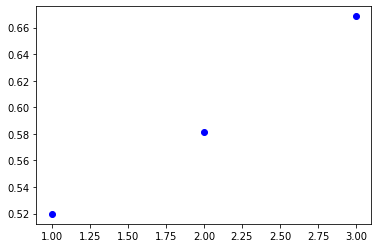

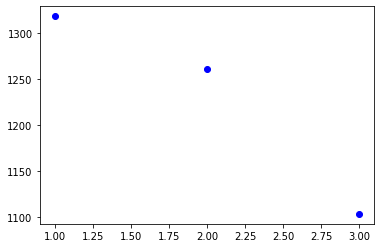

metrika:  manhattan broj suseda 1
prosecna vrednost za r2 score je:  0.6045639824996895
prosecna vrednost za rmse score je:  1205.7062269869468
[0.536210116728876, 0.6066399679553414, 0.6708418628148509]
[1295.667764859708, 1222.225517836302, 1099.225398264831]


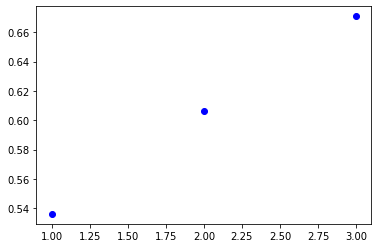

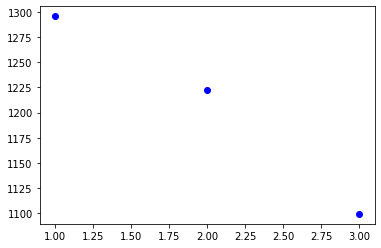

metrika:  euclidean broj suseda 2
prosecna vrednost za r2 score je:  0.693584801043515
prosecna vrednost za rmse score je:  1058.952124425833
[0.6235271456973052, 0.690476355534166, 0.7667509018990741]
[1167.3466782585965, 1084.1843813333933, 925.3253136855093]


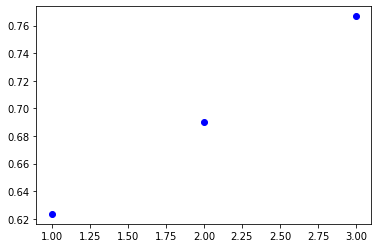

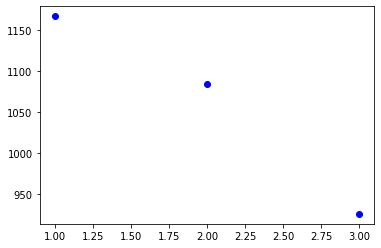

metrika:  manhattan broj suseda 2
prosecna vrednost za r2 score je:  0.7127736580815842
prosecna vrednost za rmse score je:  1026.5087722229825
[0.667543492841131, 0.6915582420211885, 0.7792192393824331]
[1096.9843640832369, 1082.2879329981556, 900.2540195875549]


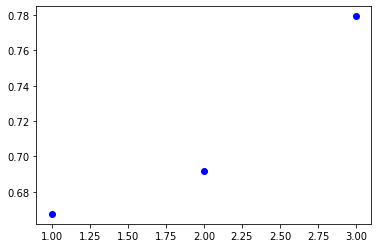

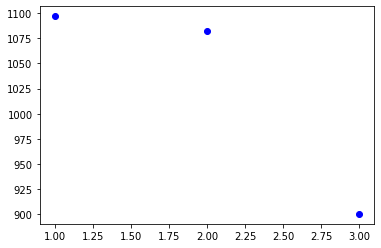

metrika:  euclidean broj suseda 3
prosecna vrednost za r2 score je:  0.7124735808851694
prosecna vrednost za rmse score je:  1028.390173346456
[0.7055491739637549, 0.6642875907642742, 0.7675839779274793]
[1032.3795827937265, 1129.1195546685783, 923.6713825770629]


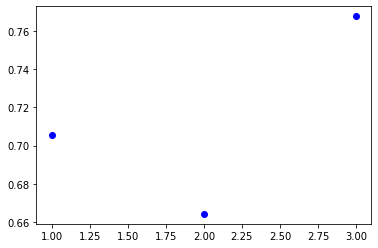

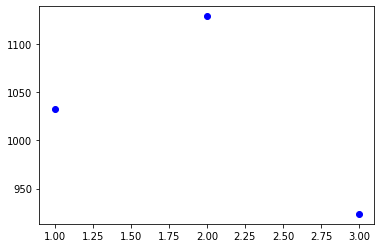

metrika:  manhattan broj suseda 3
prosecna vrednost za r2 score je:  0.7230396093592483
prosecna vrednost za rmse score je:  1009.5694098458625
[0.7259673356358112, 0.6724557984495918, 0.7706956939923417]
[995.942315731372, 1115.2986826474564, 917.4672311587593]


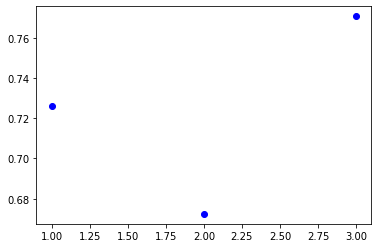

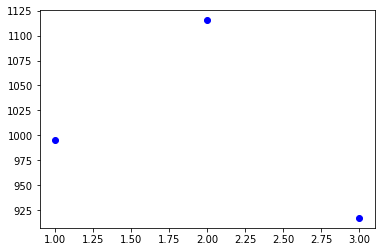

metrika:  euclidean broj suseda 4
prosecna vrednost za r2 score je:  0.7315652132456655
prosecna vrednost za rmse score je:  993.6185420442093
[0.7390022489646502, 0.6770880843878864, 0.7786053063844599]
[971.9667335296831, 1107.3840576006767, 901.5048350022686]


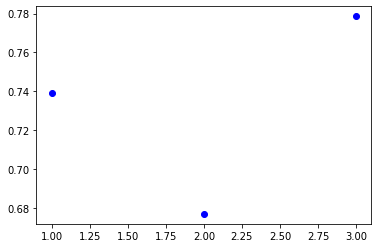

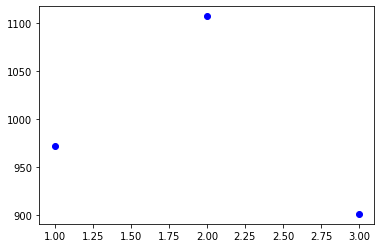

metrika:  manhattan broj suseda 4
prosecna vrednost za r2 score je:  0.7374803285760473
prosecna vrednost za rmse score je:  982.064536860973
[0.7470465058262605, 0.6782063435414134, 0.7871881363604677]
[956.8709281090867, 1105.4649331137357, 883.857749360097]


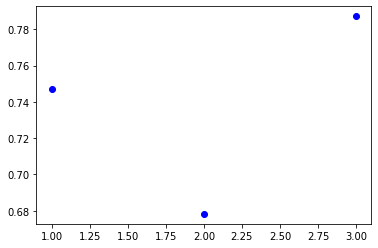

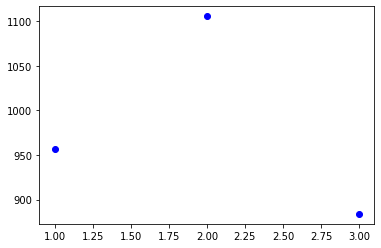

metrika:  euclidean broj suseda 5
prosecna vrednost za r2 score je:  0.7357606353204257
prosecna vrednost za rmse score je:  985.8840141372599
[0.7589477734483242, 0.6764434236588233, 0.7718907088541297]
[934.0897191642117, 1108.4888961556778, 915.0734270918903]


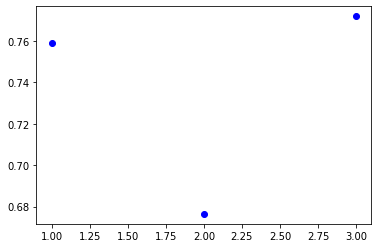

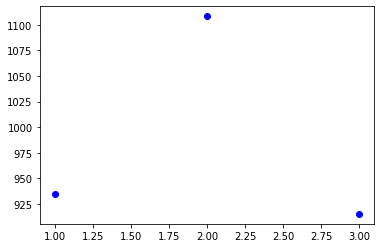

metrika:  manhattan broj suseda 5
prosecna vrednost za r2 score je:  0.7384208823269512
prosecna vrednost za rmse score je:  980.6980397510166
[0.7591527495613652, 0.6782198273926187, 0.7778900700268696]
[933.6924882348615, 1105.4417721835518, 902.9598588346364]


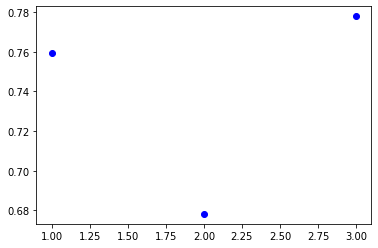

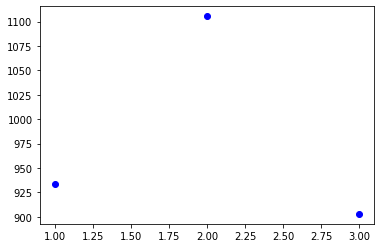

metrika:  euclidean broj suseda 6
prosecna vrednost za r2 score je:  0.7240033816097283
prosecna vrednost za rmse score je:  1006.881010289344
[0.7460392628674042, 0.6559439696530264, 0.7700269123087544]
[958.7741316329439, 1143.0647142472692, 918.804184987819]


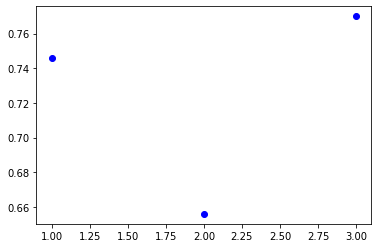

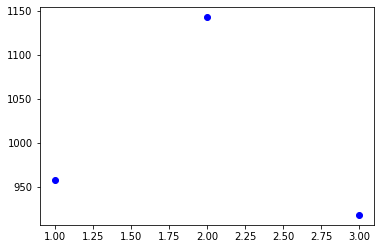

metrika:  manhattan broj suseda 6
prosecna vrednost za r2 score je:  0.7361771315203859
prosecna vrednost za rmse score je:  984.792576222016
[0.7499767760519462, 0.6771498994336077, 0.7814047190756036]
[951.3124795084854, 1107.2780592321653, 895.7871899253971]


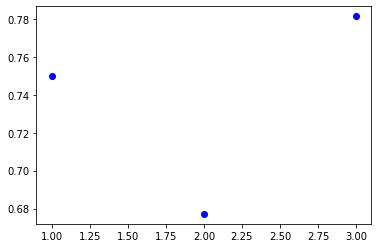

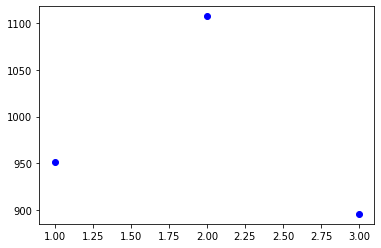

metrika:  euclidean broj suseda 7
prosecna vrednost za r2 score je:  0.7130521539401319
prosecna vrednost za rmse score je:  1026.6386486191975
[0.7396136348986152, 0.6409919017707693, 0.758550925151011]
[970.8276524455774, 1167.6383592979776, 941.4499341140374]


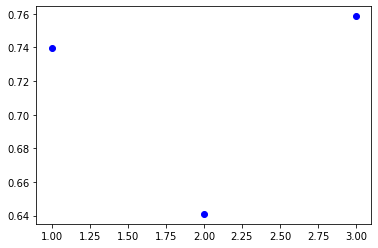

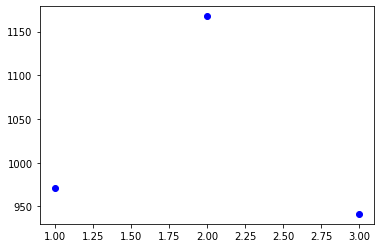

metrika:  manhattan broj suseda 7
prosecna vrednost za r2 score je:  0.7208799008727812
prosecna vrednost za rmse score je:  1012.3526056304983
[0.7313140402374432, 0.6553102225781962, 0.7760154398027043]
[986.17844282579, 1144.1169856385206, 906.7623884271843]


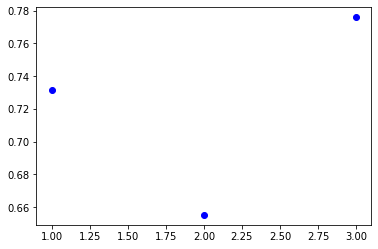

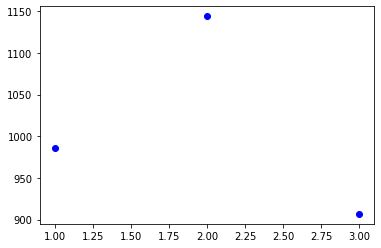

metrika:  euclidean broj suseda 8
prosecna vrednost za r2 score je:  0.7041307718184617
prosecna vrednost za rmse score je:  1042.280474299402
[0.7205545700233734, 0.6320079295818926, 0.7598298158501193]
[1005.7302764031331, 1182.1578260723259, 938.9533204227463]


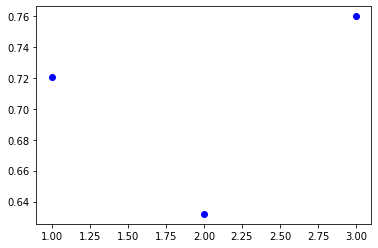

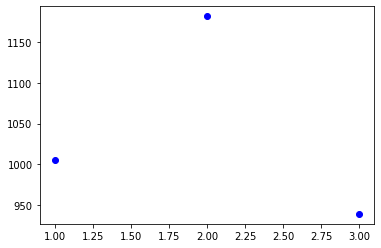

metrika:  manhattan broj suseda 8
prosecna vrednost za r2 score je:  0.7161807500077614
prosecna vrednost za rmse score je:  1020.4691186328077
[0.7279397703762899, 0.6459271184370122, 0.774675361209982]
[992.3515414216141, 1159.5849340566328, 909.4708804201765]


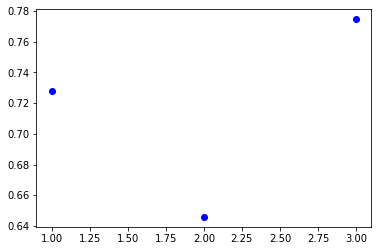

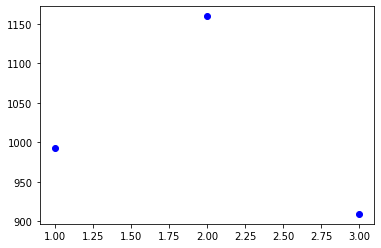

metrika:  euclidean broj suseda 9
prosecna vrednost za r2 score je:  0.6949375399551383
prosecna vrednost za rmse score je:  1058.2580372702557
[0.7049630651063672, 0.623189585396416, 0.7566599693626317]
[1033.4065556443002, 1196.2382370497144, 945.1293191167526]


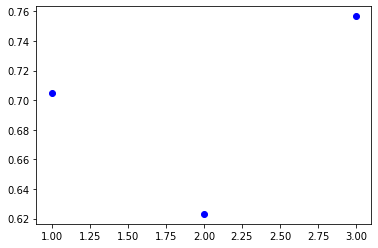

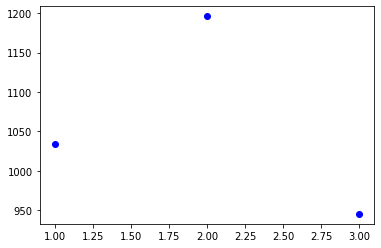

metrika:  manhattan broj suseda 9
prosecna vrednost za r2 score je:  0.7140955613904202
prosecna vrednost za rmse score je:  1023.9313948661585
[0.7219201448925034, 0.6433330133392472, 0.7770335259395096]
[1003.2698998597864, 1163.8250153693398, 904.6992693693495]


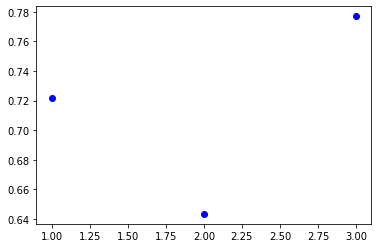

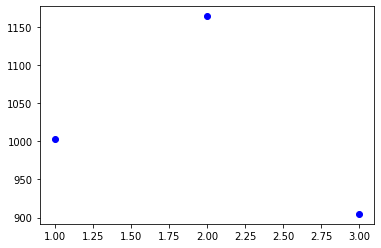

metrika:  euclidean broj suseda 10
prosecna vrednost za r2 score je:  0.6855298952514381
prosecna vrednost za rmse score je:  1074.3176474052764
[0.6903141906923456, 0.6136063007815106, 0.7526691942804584]
[1058.750603956999, 1211.35447879225, 952.8478594665798]


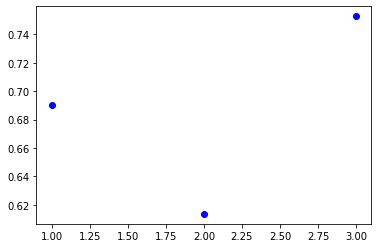

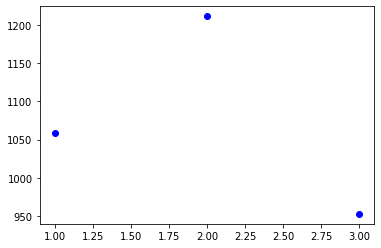

metrika:  manhattan broj suseda 10
prosecna vrednost za r2 score je:  0.7058756027857557
prosecna vrednost za rmse score je:  1039.0358585074043
[0.7088085391209049, 0.6399783677885977, 0.7688399014477645]
[1026.6498217965207, 1169.2854072066807, 921.1723465190116]


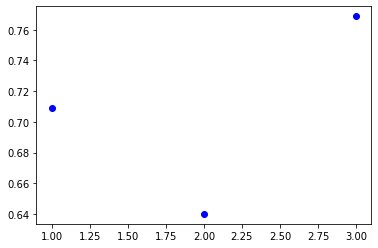

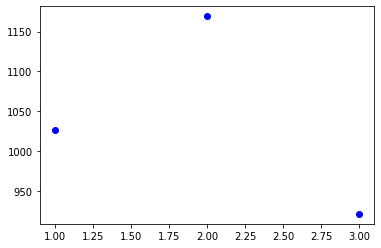

metrika:  euclidean broj suseda 11
prosecna vrednost za r2 score je:  0.6770382018874366
prosecna vrednost za rmse score je:  1088.9258713908841
[0.6821555139457744, 0.6047670401396252, 0.7441920515769102]
[1072.6063391698285, 1225.131788932936, 969.0394860698875]


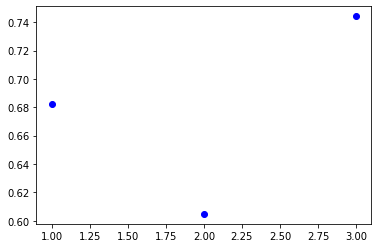

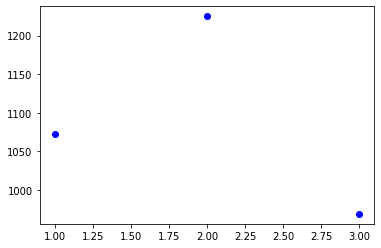

metrika:  manhattan broj suseda 11
prosecna vrednost za r2 score je:  0.7005869507844222
prosecna vrednost za rmse score je:  1048.175452487244
[0.7048030213207689, 0.6314450870522652, 0.7655127439802325]
[1033.6868050887242, 1183.0615336917867, 927.7780186812208]


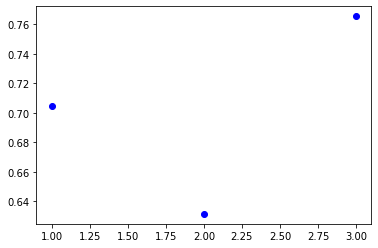

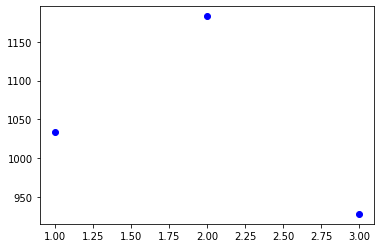

metrika:  euclidean broj suseda 12
prosecna vrednost za r2 score je:  0.6696869256276609
prosecna vrednost za rmse score je:  1101.145538795604
[0.6774825576955043, 0.5933587946906744, 0.7382194244968037]
[1080.4623102262497, 1242.6874815486553, 980.2868246119072]


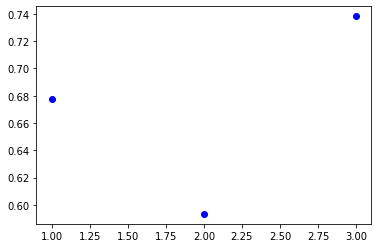

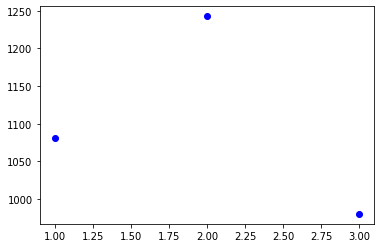

metrika:  manhattan broj suseda 12
prosecna vrednost za r2 score je:  0.69603928644722
prosecna vrednost za rmse score je:  1056.2533997706248
[0.6998655170800353, 0.6273335350561939, 0.7609188072054307]
[1042.295747830663, 1189.6422735415526, 936.8221779396587]


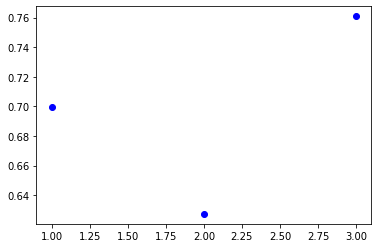

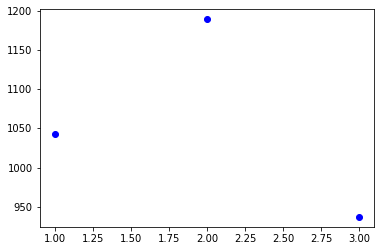

metrika:  euclidean broj suseda 13
prosecna vrednost za r2 score je:  0.6594003263823
prosecna vrednost za rmse score je:  1117.9643254012162
[0.6678094508682269, 0.5787740455750376, 0.7316174827036351]
[1096.5454943918967, 1264.776515348257, 992.5709664634953]


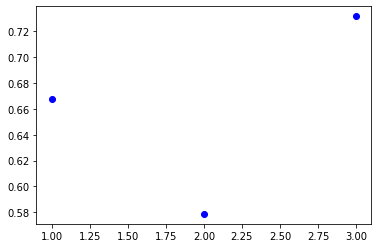

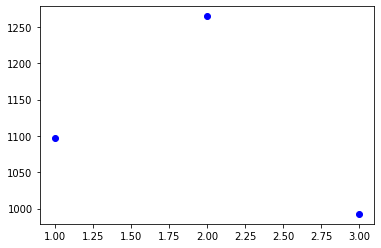

metrika:  manhattan broj suseda 13
prosecna vrednost za r2 score je:  0.6881688329830262
prosecna vrednost za rmse score je:  1069.8746026493172
[0.6984291107561047, 0.6143172818083493, 0.7517601063846246]
[1044.7869197164996, 1210.239493477863, 954.5973947535892]


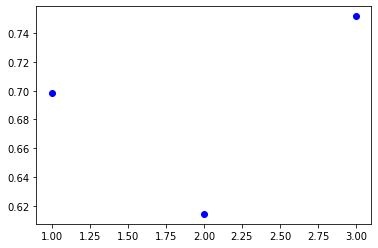

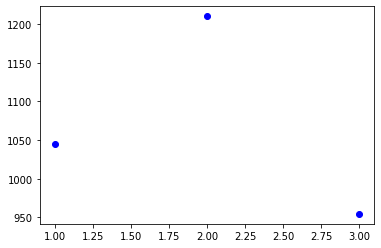

metrika:  euclidean broj suseda 14
prosecna vrednost za r2 score je:  0.6510611198468524
prosecna vrednost za rmse score je:  1132.2737584955273
[0.6613167176499091, 0.5740221989186256, 0.7178444429720228]
[1107.2097424377735, 1271.890475409848, 1017.72105763896]


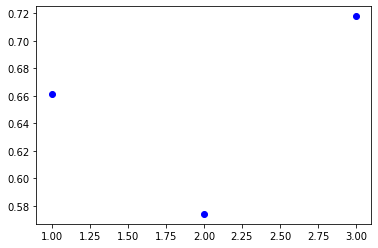

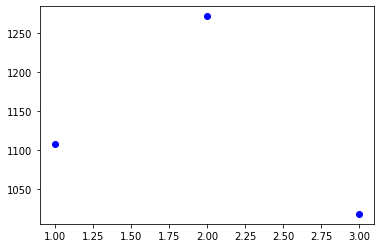

metrika:  manhattan broj suseda 14
prosecna vrednost za r2 score je:  0.6806694361821105
prosecna vrednost za rmse score je:  1082.8006347561343
[0.6930869876434069, 0.6052308023441156, 0.7436905185588092]
[1054.0001420374783, 1224.4127995697902, 969.9889626611348]


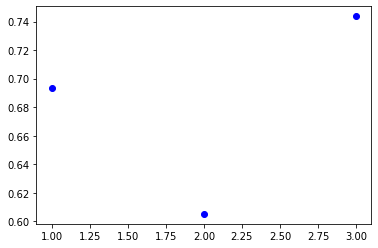

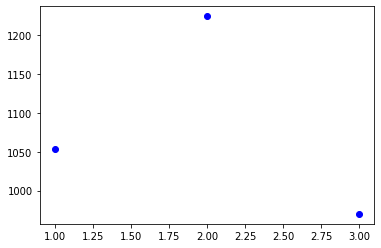

metrika:  euclidean broj suseda 15
prosecna vrednost za r2 score je:  0.640983052135073
prosecna vrednost za rmse score je:  1148.8437866997276
[0.6580196336968067, 0.5618541430149311, 0.7030753796934813]
[1112.5860365801395, 1289.9283451878619, 1044.0169783311817]


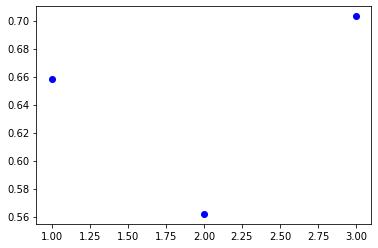

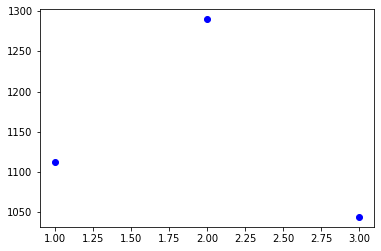

metrika:  manhattan broj suseda 15
prosecna vrednost za r2 score je:  0.6778473582309777
prosecna vrednost za rmse score je:  1088.211154599959
[0.6857790323116946, 0.6100755147905416, 0.737687527590697]
[1066.4748037037095, 1216.8764466164864, 981.2822134796811]


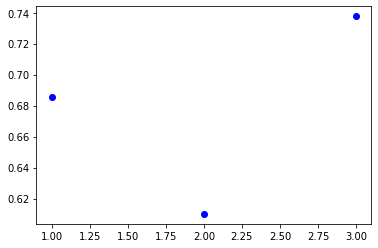

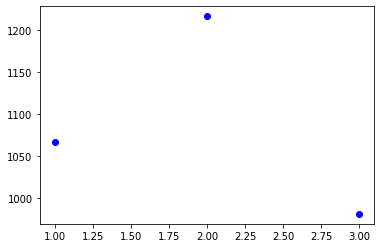

metrika:  euclidean broj suseda 16
prosecna vrednost za r2 score je:  0.630711311034823
prosecna vrednost za rmse score je:  1165.6386291233446
[0.6483725829919845, 0.5545418771810863, 0.6892194729313983]
[1128.1695760473383, 1300.6476863019345, 1068.0986250207604]


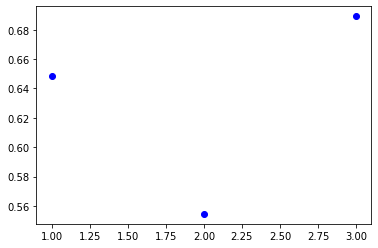

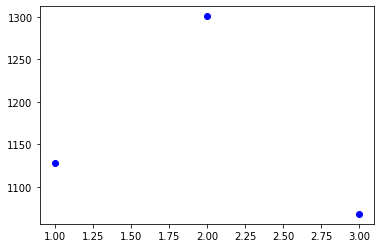

metrika:  manhattan broj suseda 16
prosecna vrednost za r2 score je:  0.6720537787653263
prosecna vrednost za rmse score je:  1098.5202081453456
[0.6839563483852977, 0.6068988550818033, 0.7253061328288777]
[1069.563451404047, 1221.8232520928336, 1004.173920939156]


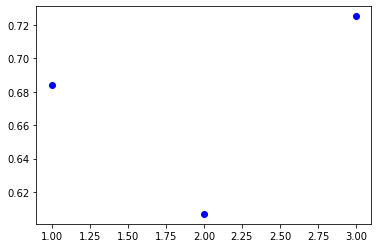

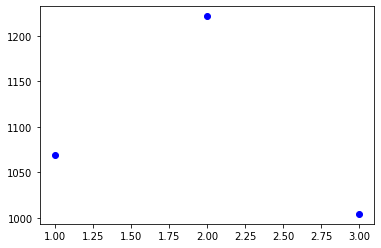

metrika:  euclidean broj suseda 17
prosecna vrednost za r2 score je:  0.6213446726841204
prosecna vrednost za rmse score je:  1180.5059510120038
[0.6419321067276111, 0.5443274504140161, 0.677774460910734]
[1138.454581065659, 1315.4751995891004, 1087.588072381252]


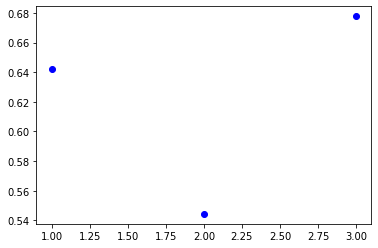

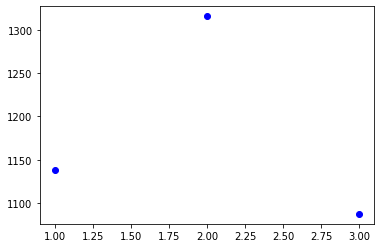

metrika:  manhattan broj suseda 17
prosecna vrednost za r2 score je:  0.662531068390922
prosecna vrednost za rmse score je:  1114.5185518605915
[0.6789380165251233, 0.5954200888429974, 0.7132350998046453]
[1078.0215947922584, 1239.5338428822765, 1026.0002179072396]


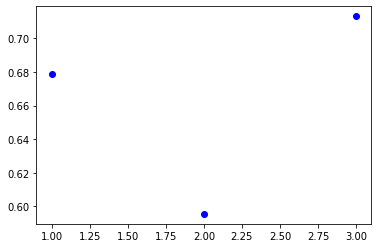

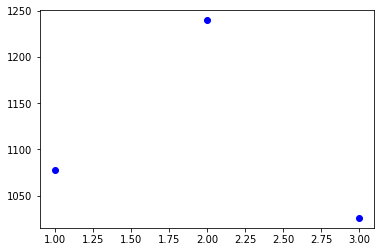

metrika:  euclidean broj suseda 18
prosecna vrednost za r2 score je:  0.6116715331228947
prosecna vrednost za rmse score je:  1195.5671298176073
[0.632784325133336, 0.5336611302296785, 0.6685691440056696]
[1152.9052690890962, 1330.7823717069693, 1103.0137486567562]


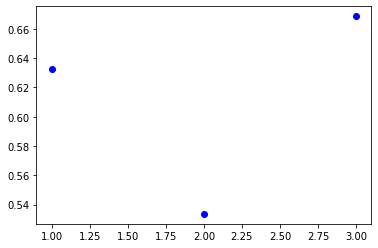

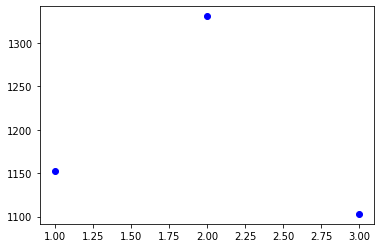

metrika:  manhattan broj suseda 18
prosecna vrednost za r2 score je:  0.6569556609286081
prosecna vrednost za rmse score je:  1123.521260704191
[0.6743963287381187, 0.5864880424662625, 0.7099826115814429]
[1085.6195735754886, 1253.1419474079016, 1031.802261129183]


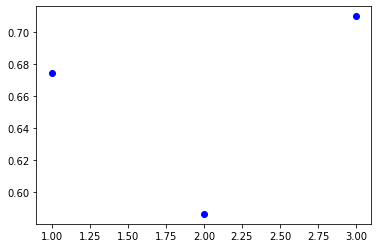

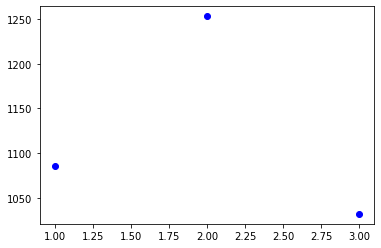

metrika:  euclidean broj suseda 19
prosecna vrednost za r2 score je:  0.5984525795661148
prosecna vrednost za rmse score je:  1216.183673368817
[0.6230104641595795, 0.5227441435178983, 0.6496031310208663]
[1168.1474526944396, 1346.2690590196087, 1134.1345083924025]


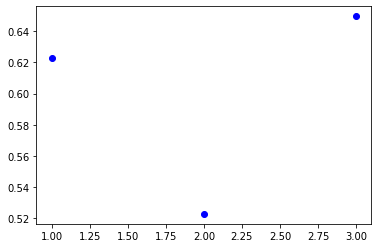

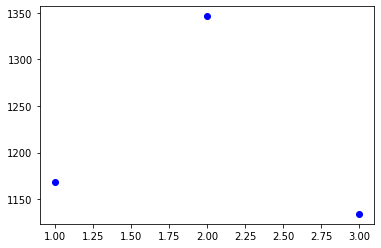

metrika:  manhattan broj suseda 19
prosecna vrednost za r2 score je:  0.6497576411163327
prosecna vrednost za rmse score je:  1135.086082714018
[0.6716806851156165, 0.5743359055920128, 0.7032563326413688]
[1090.1373884547072, 1271.4220542669013, 1043.698805420446]


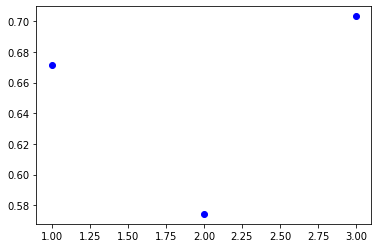

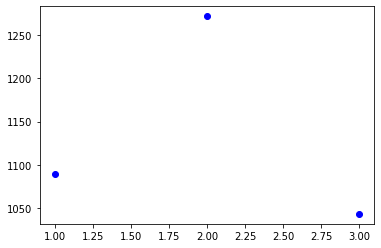

metrika:  euclidean broj suseda 20
prosecna vrednost za r2 score je:  0.5901056903523053
prosecna vrednost za rmse score je:  1229.070630997434
[0.6133552890490686, 0.5181530201485031, 0.6388087618593441]
[1183.011742220086, 1352.7290045020889, 1151.4711462701273]


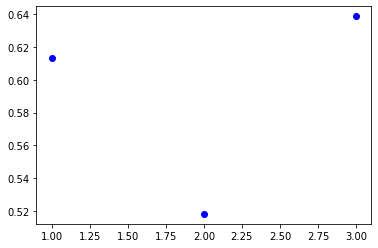

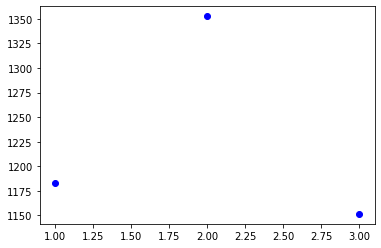

metrika:  manhattan broj suseda 20
prosecna vrednost za r2 score je:  0.642501281876771
prosecna vrednost za rmse score je:  1146.4707485393385
[0.6619399408869062, 0.5632318311112574, 0.7023320736321494]
[1106.190565216173, 1287.8987492510857, 1045.322931150757]


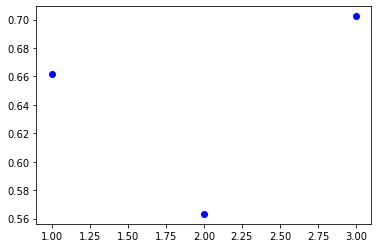

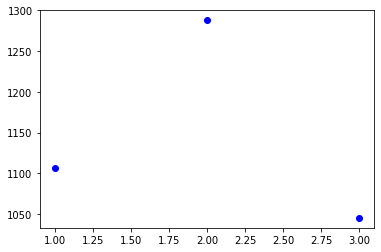

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
acc = []
for k in range(20):
  k = k+1
  for m in ['euclidean', 'manhattan']:
        indexes = kf.split(x_train)
        rmse_val = []
        r2_val=[]
        for train_index, test_index in indexes:
          X_train = x_train.iloc[train_index,:]
          X_test = x_train.iloc[test_index,:]
          y_train = y_cnt_train.iloc[train_index]
          y_test = y_cnt_train.iloc[test_index]
    
          regresor= KNeighborsRegressor(n_neighbors=k, metric=m)
          regresor.fit(X_train, y_train)
          y_pred = regresor.predict(X_test)

          error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
          error_r2= r2_score(y_test, y_pred)
          rmse_val.append(error) #store rmse values
          r2_val.append(error_r2)
        x = [1,2,3]
        print("metrika: ",m,"broj suseda",k)
        print('prosecna vrednost za r2 score je: ',np.mean(r2_val))
        print('prosecna vrednost za rmse score je: ',np.mean(rmse_val))
        print(r2_val)
        print(rmse_val)
        plt.scatter(x, r2_val, c ="blue")
        plt.show()
        plt.scatter(x, rmse_val, c ="blue")
        plt.show()
        #menhetn , 5
        
        

Sada testiramo nad podacima za testiranje

In [ ]:
regresor= KNeighborsRegressor(n_neighbors=5, metric='manhattan')
regresor.fit(x_train, y_cnt_train)
y_pred = regresor.predict(x_test)
model_evaluation(y_cnt_test, y_pred, x_train.shape[0], x_train.shape[1])

Mean squared error:  676889.0021621623
Mean absolute error:  614.7405405405407
Root mean squared error:  822.7326431849914
R2 score:  0.854629876140276
R2 adjusted score:  0.8522851967231837
       y  y_pred
0   6606  5250.8
1   1550  1770.0
2   3747  4687.6
3   6041  4316.2
4   7538  7472.8
5   7264  6631.0
6   1605  2002.0
7   2209  2766.4
8   7499  6388.4
9   5743  5939.8
10  1796  1501.4
11  3068  2271.6
12  4891  4876.8
13  5260  5337.0
14  2133  2484.4
15  2471  2830.4
16  2046  2844.4
17  8156  5887.8
18  5362  4552.0
19  2298  2403.0


## Stablo odluke 


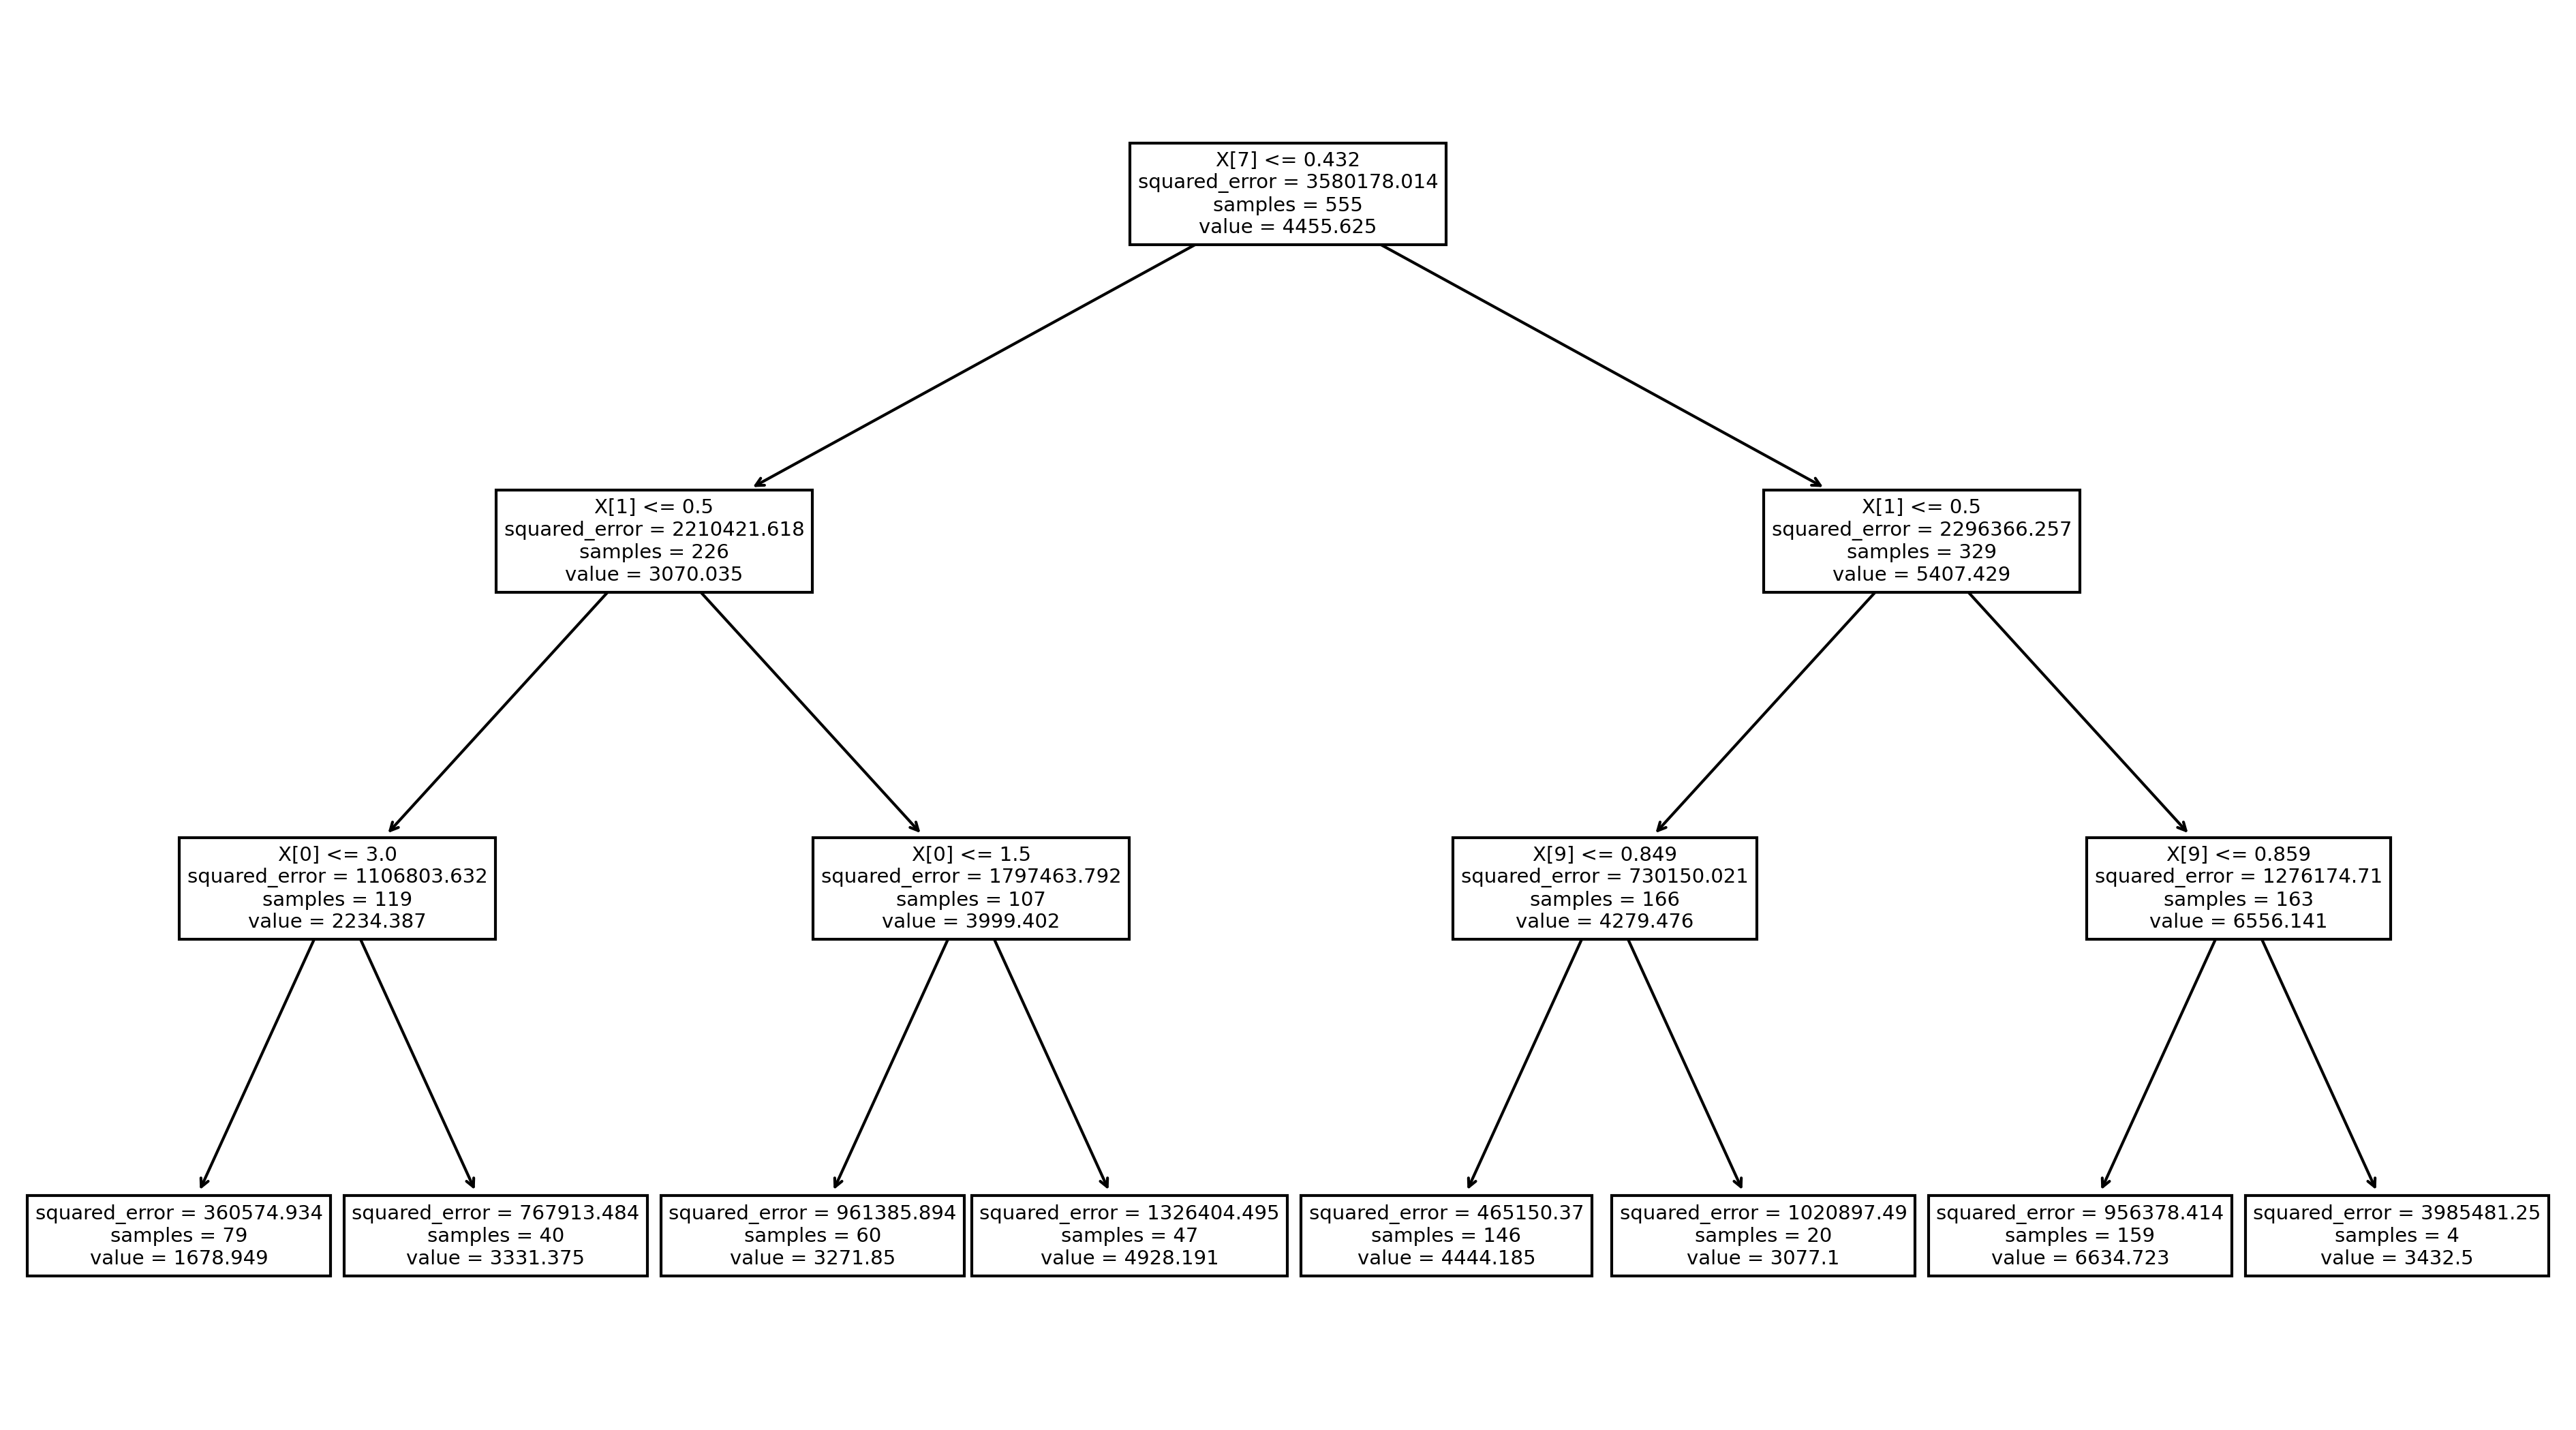

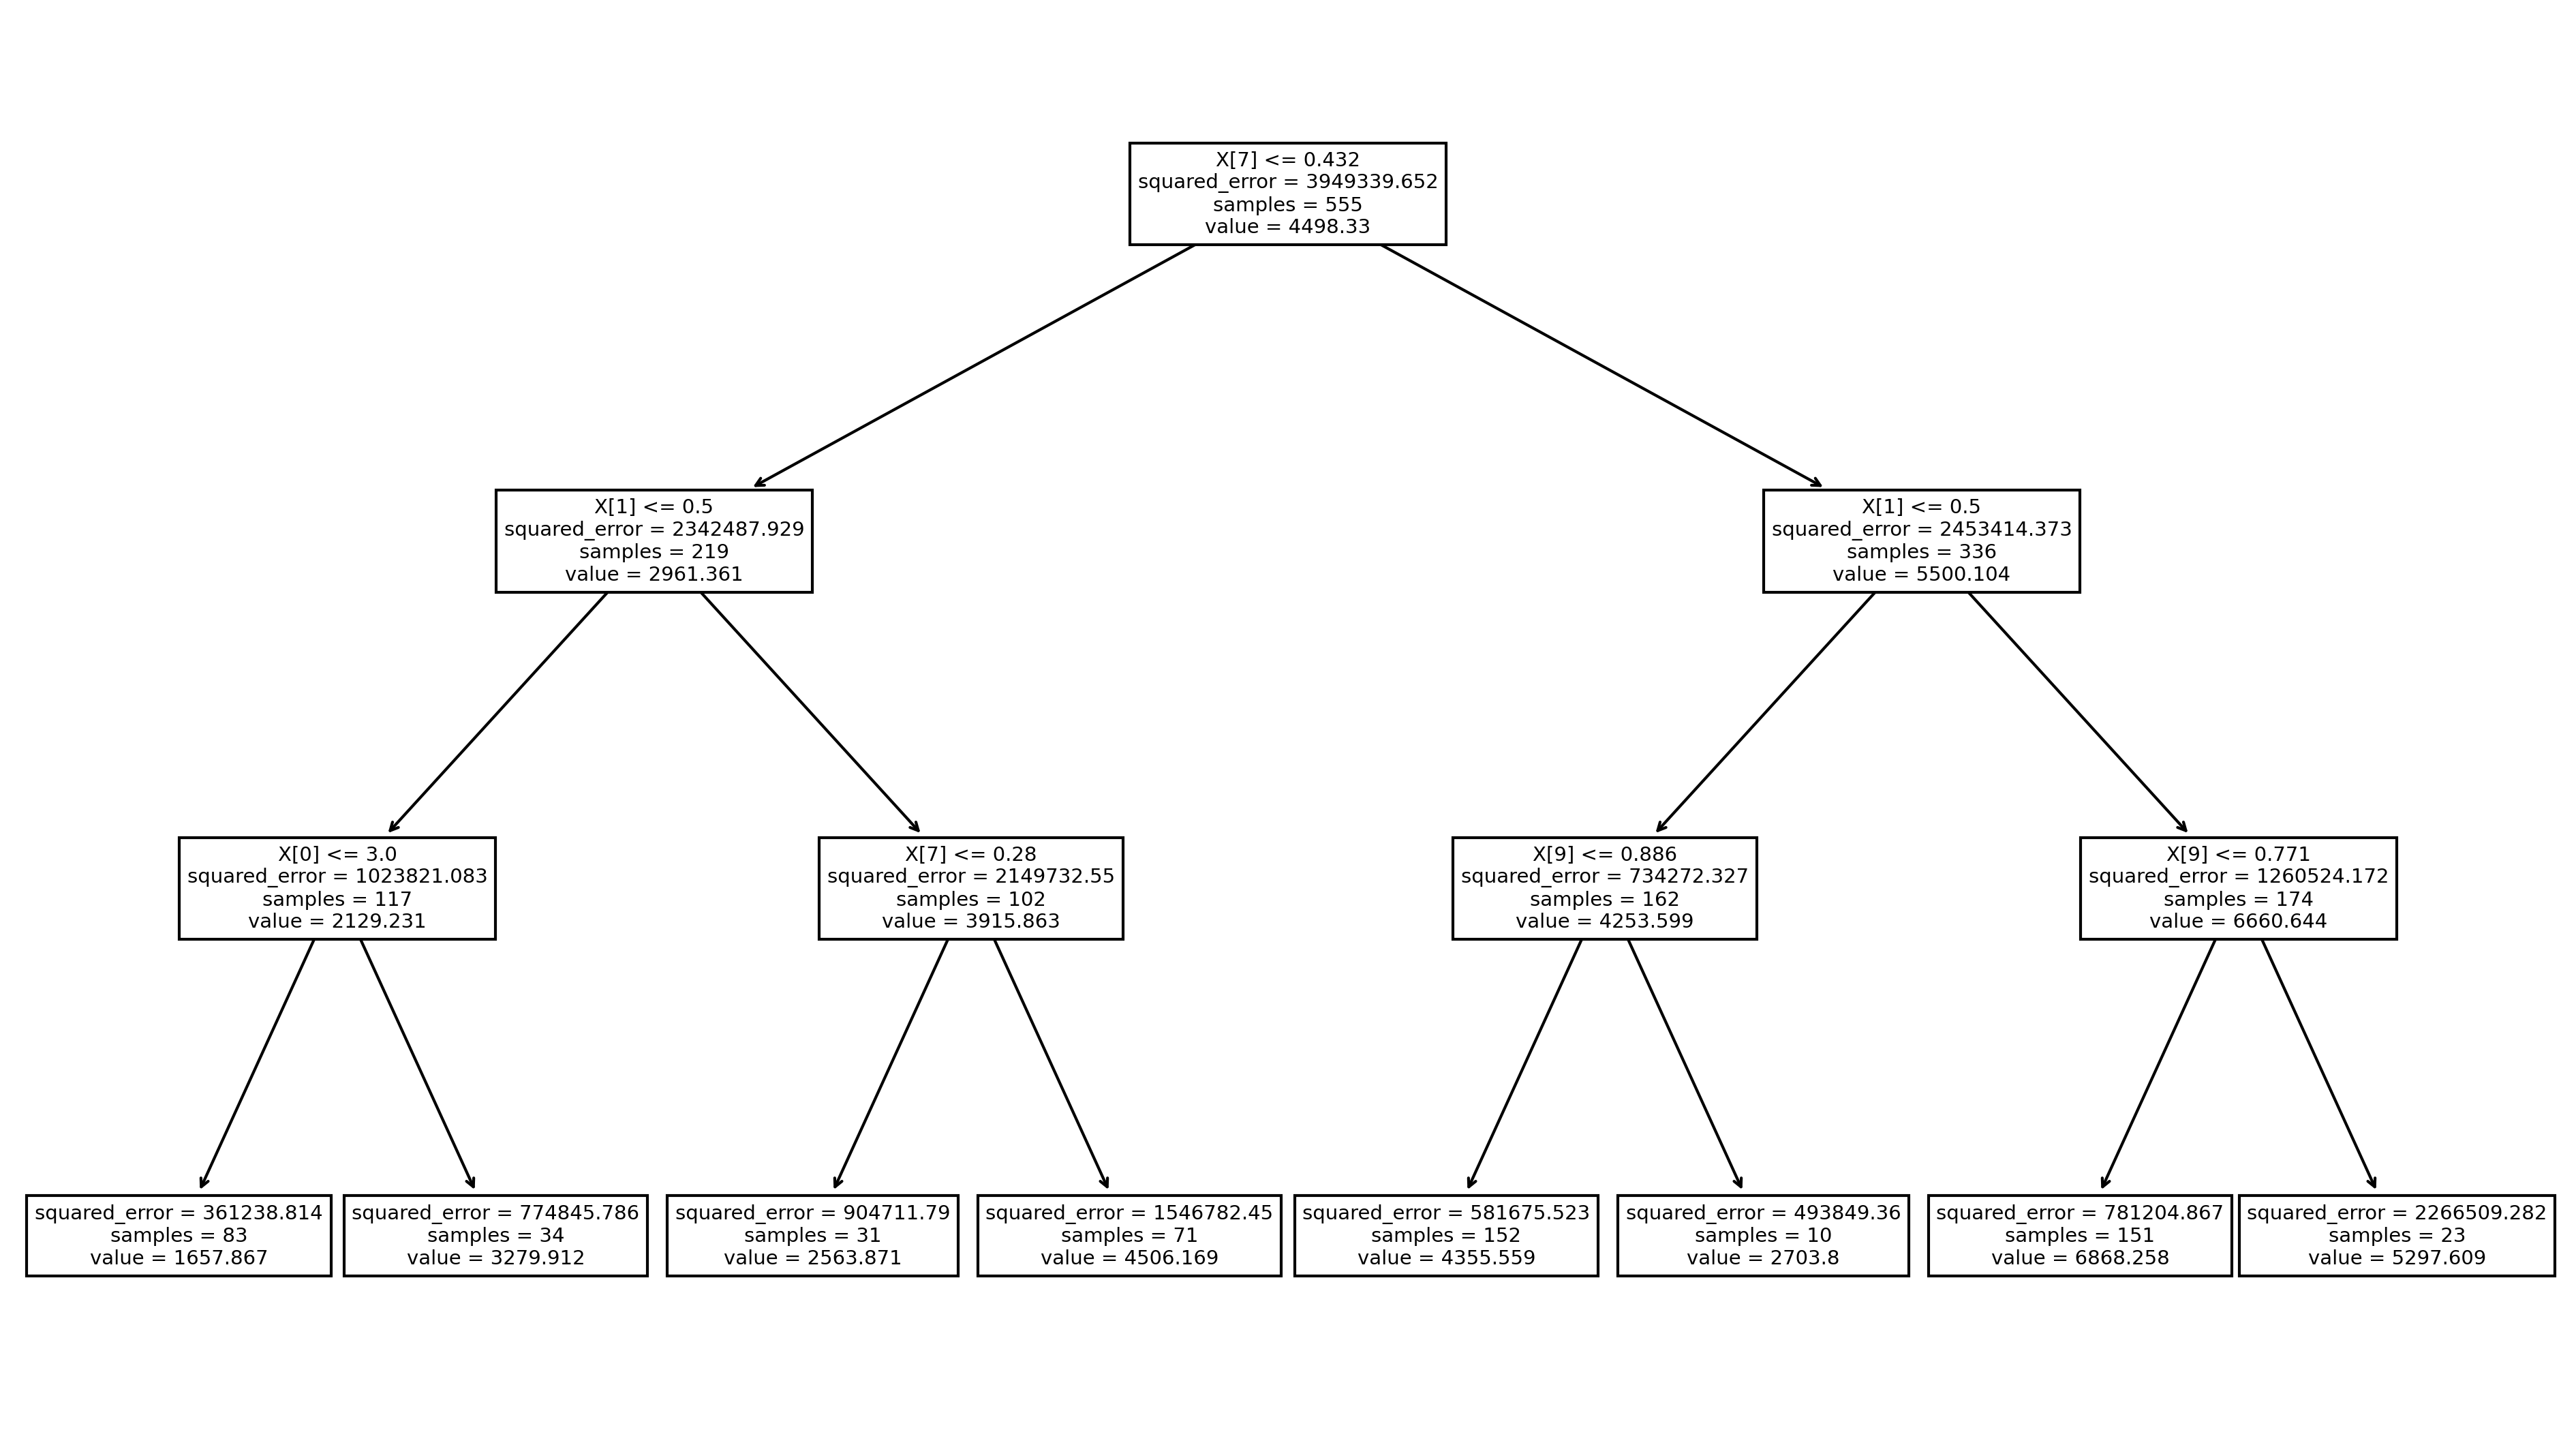

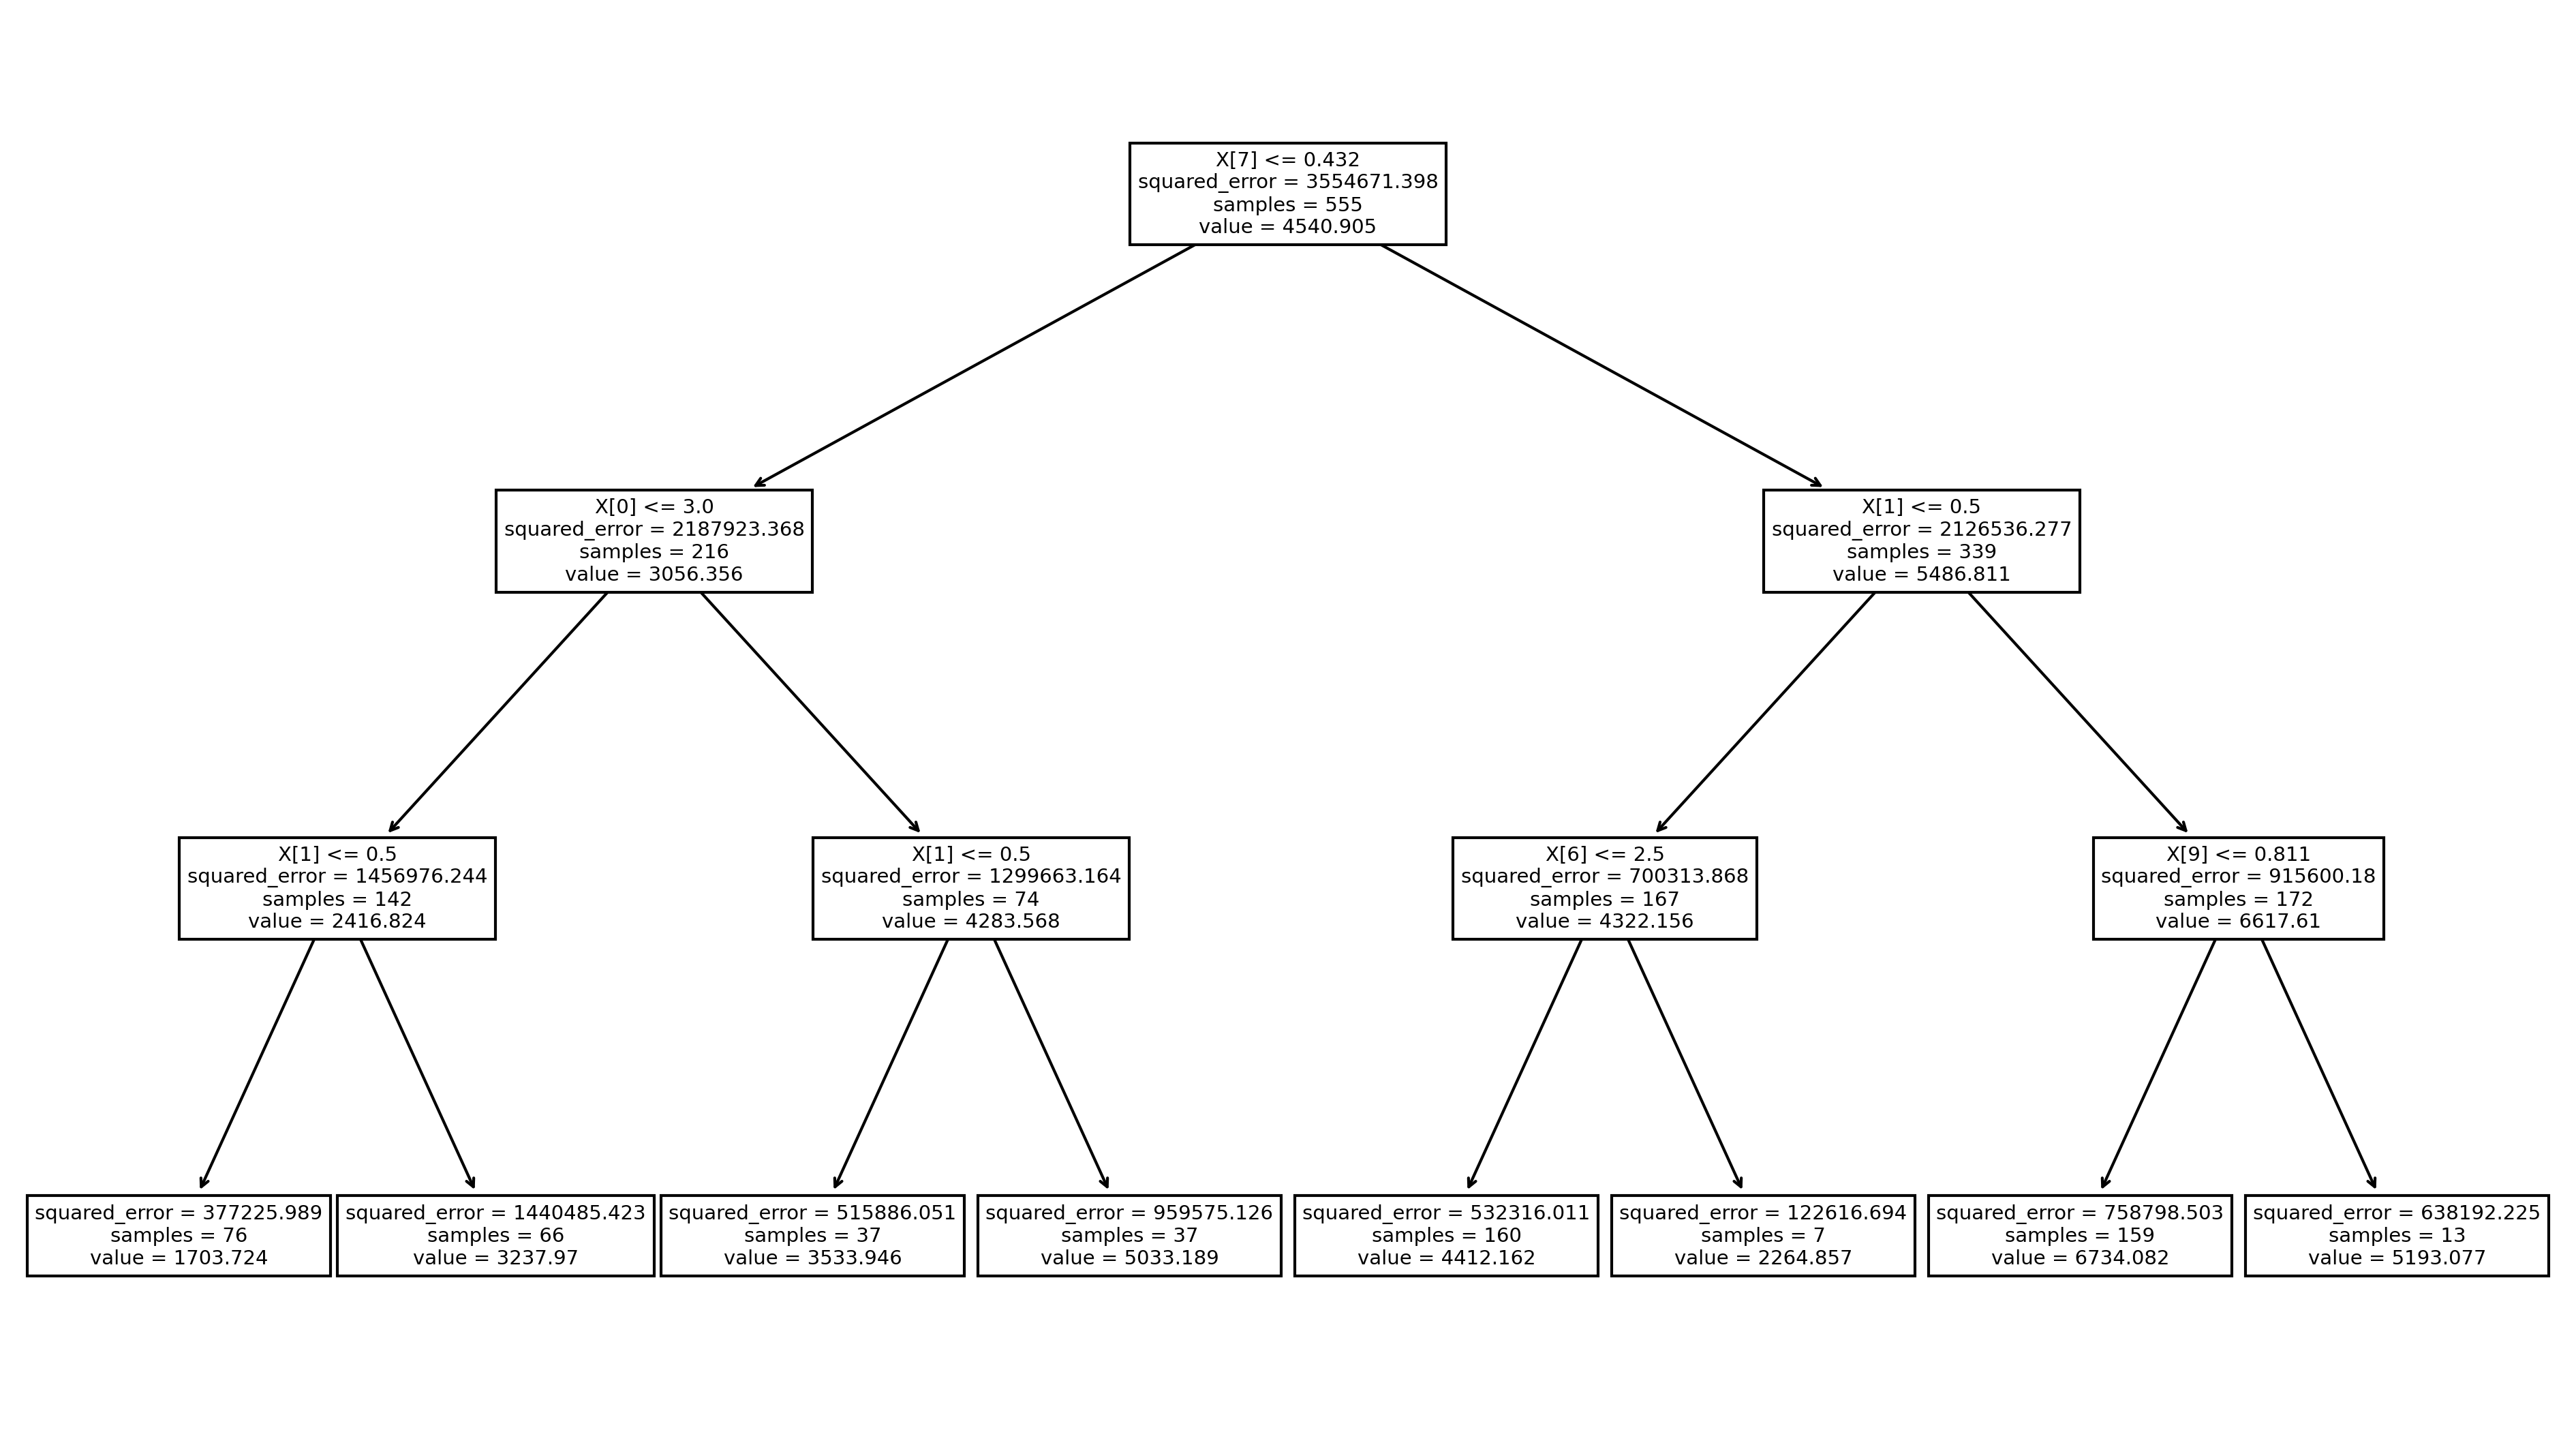

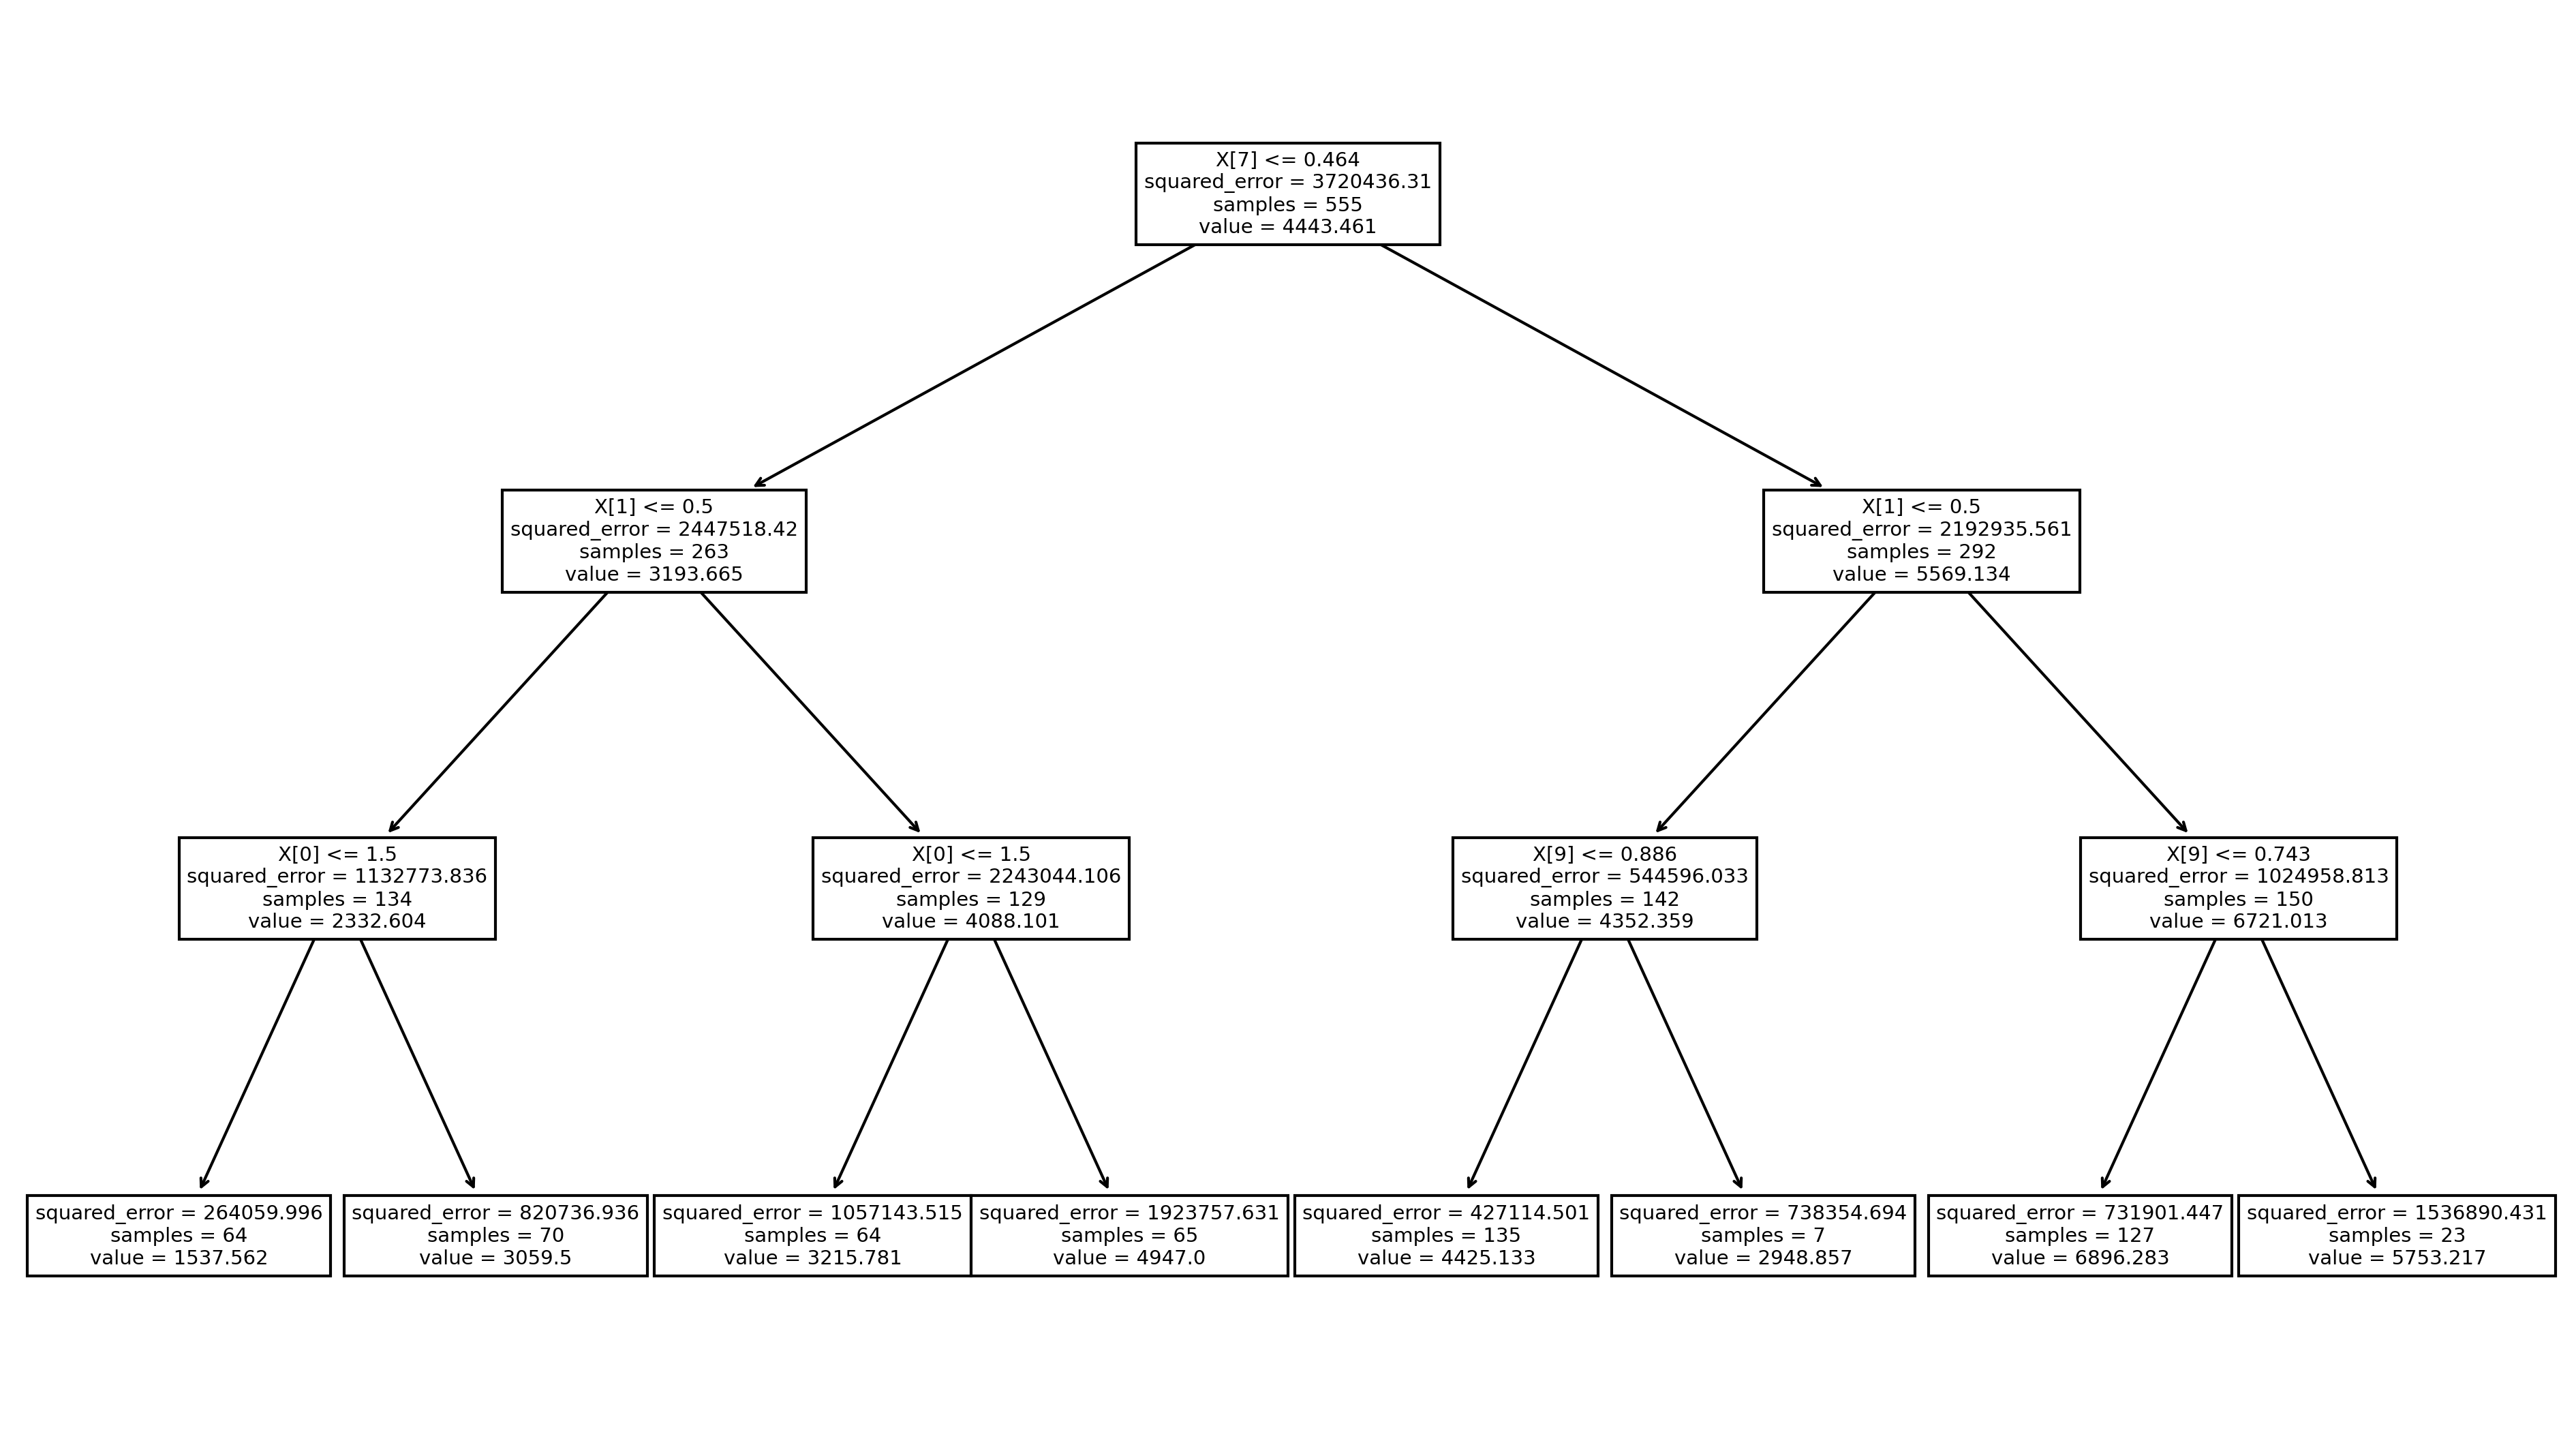

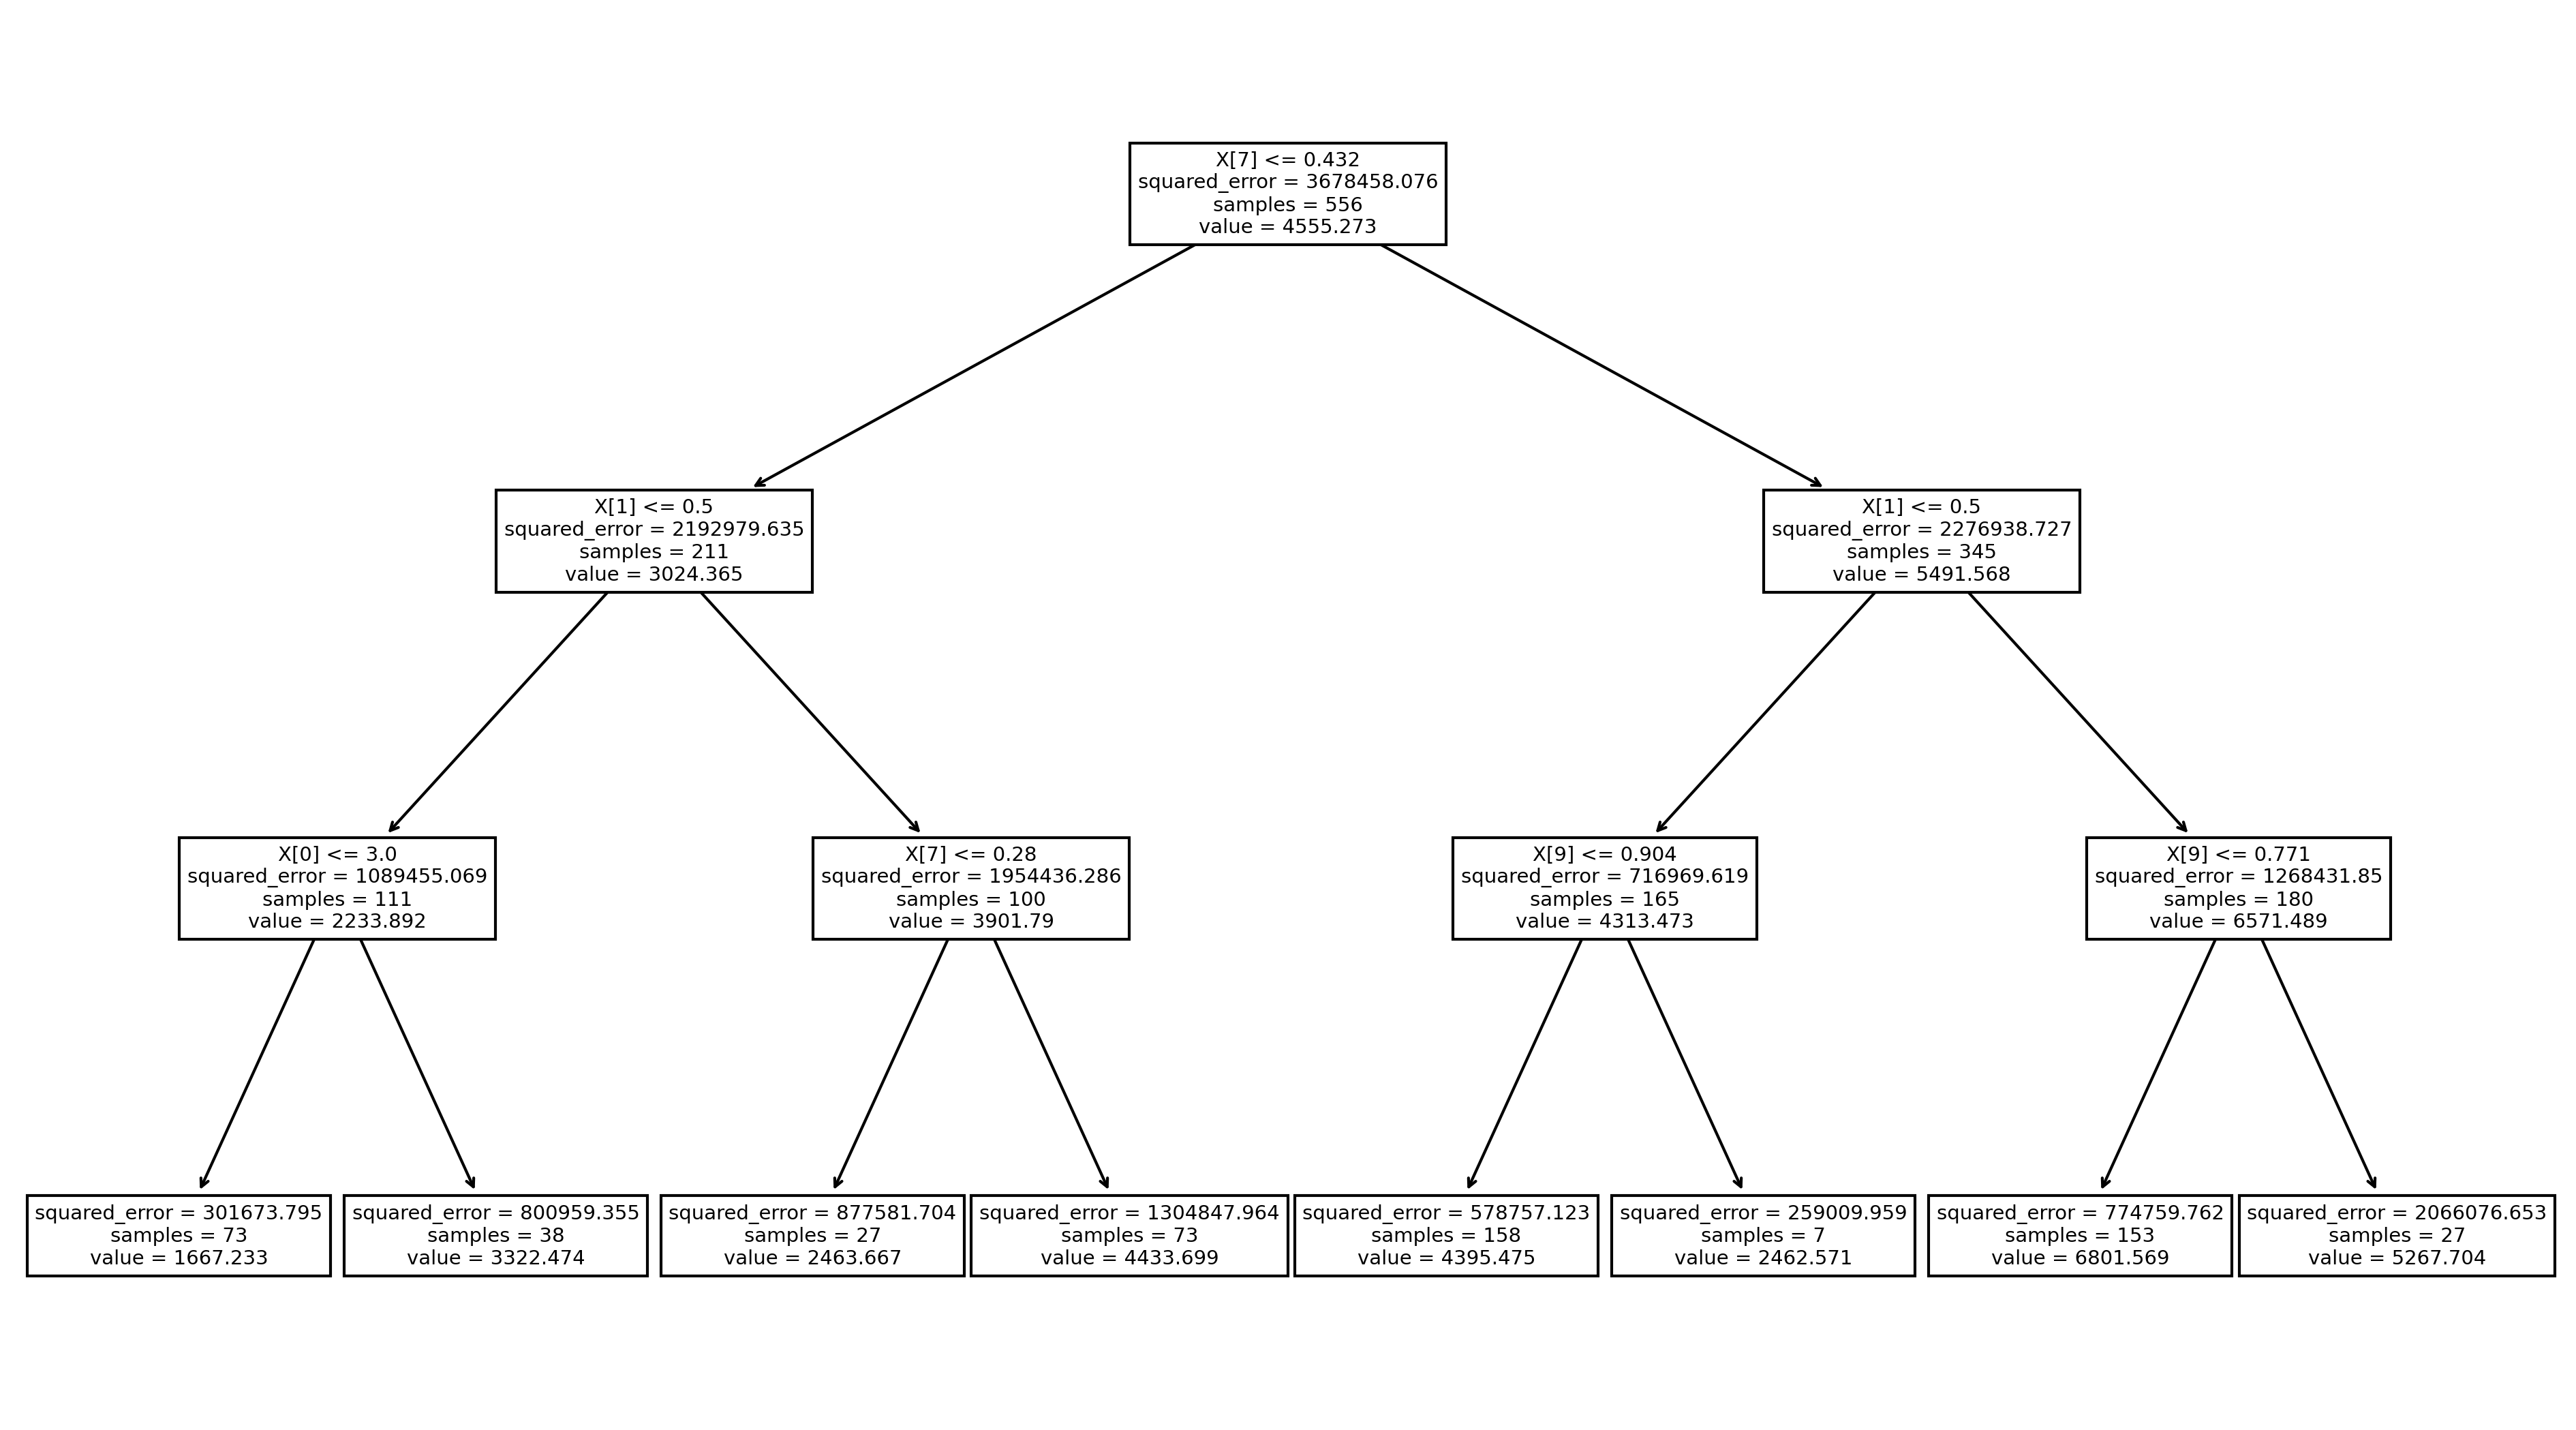

prosecna vrednost za r2 score je:  0.7476619524389293
prosecna vrednost za rmse score je:  957.6339273443966
[0.774611676307812, 0.7380544913924724, 0.6903090351361261, 0.7601041169952961, 0.77523044236294]
0.7476619524389293
[965.3122936984888, 840.5757092952294, 1145.6008763328953, 922.8951809718676, 913.7855764235022]
957.6339273443966


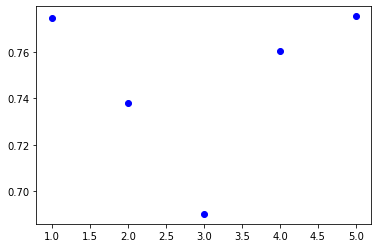

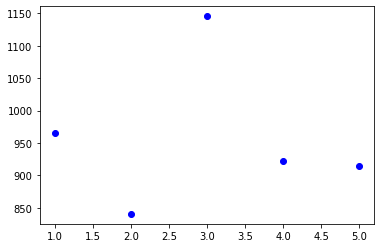

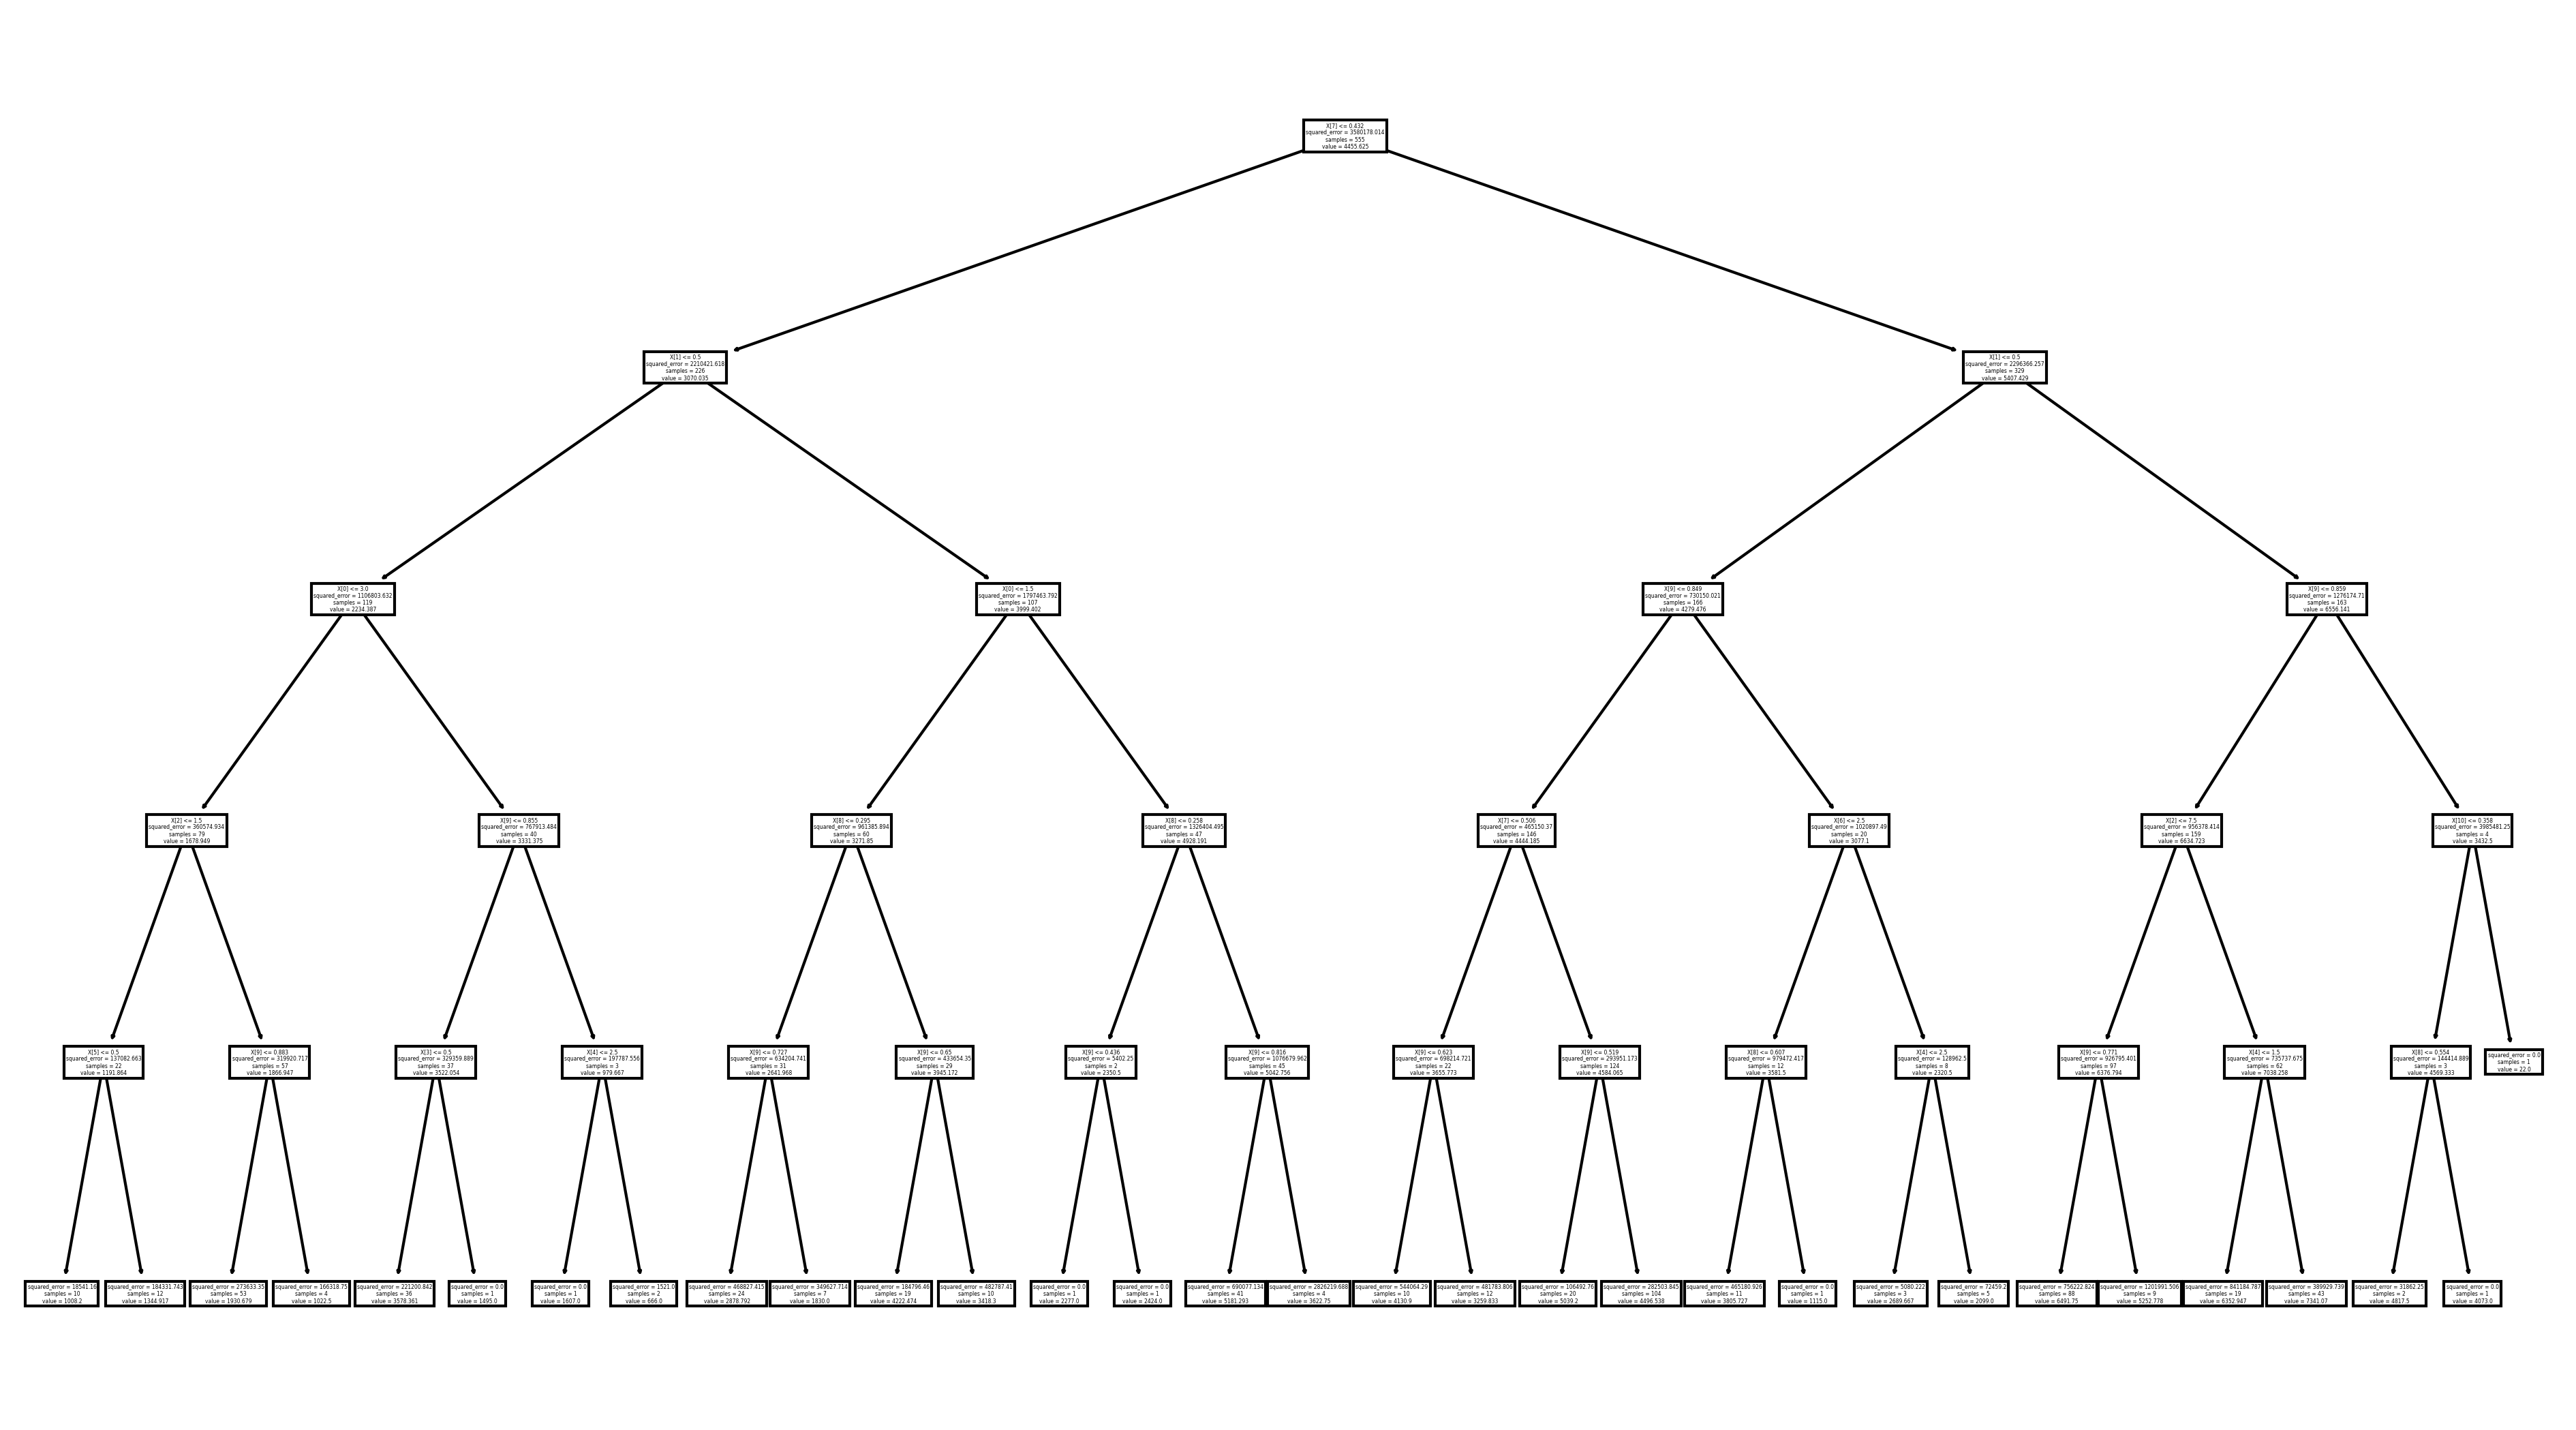

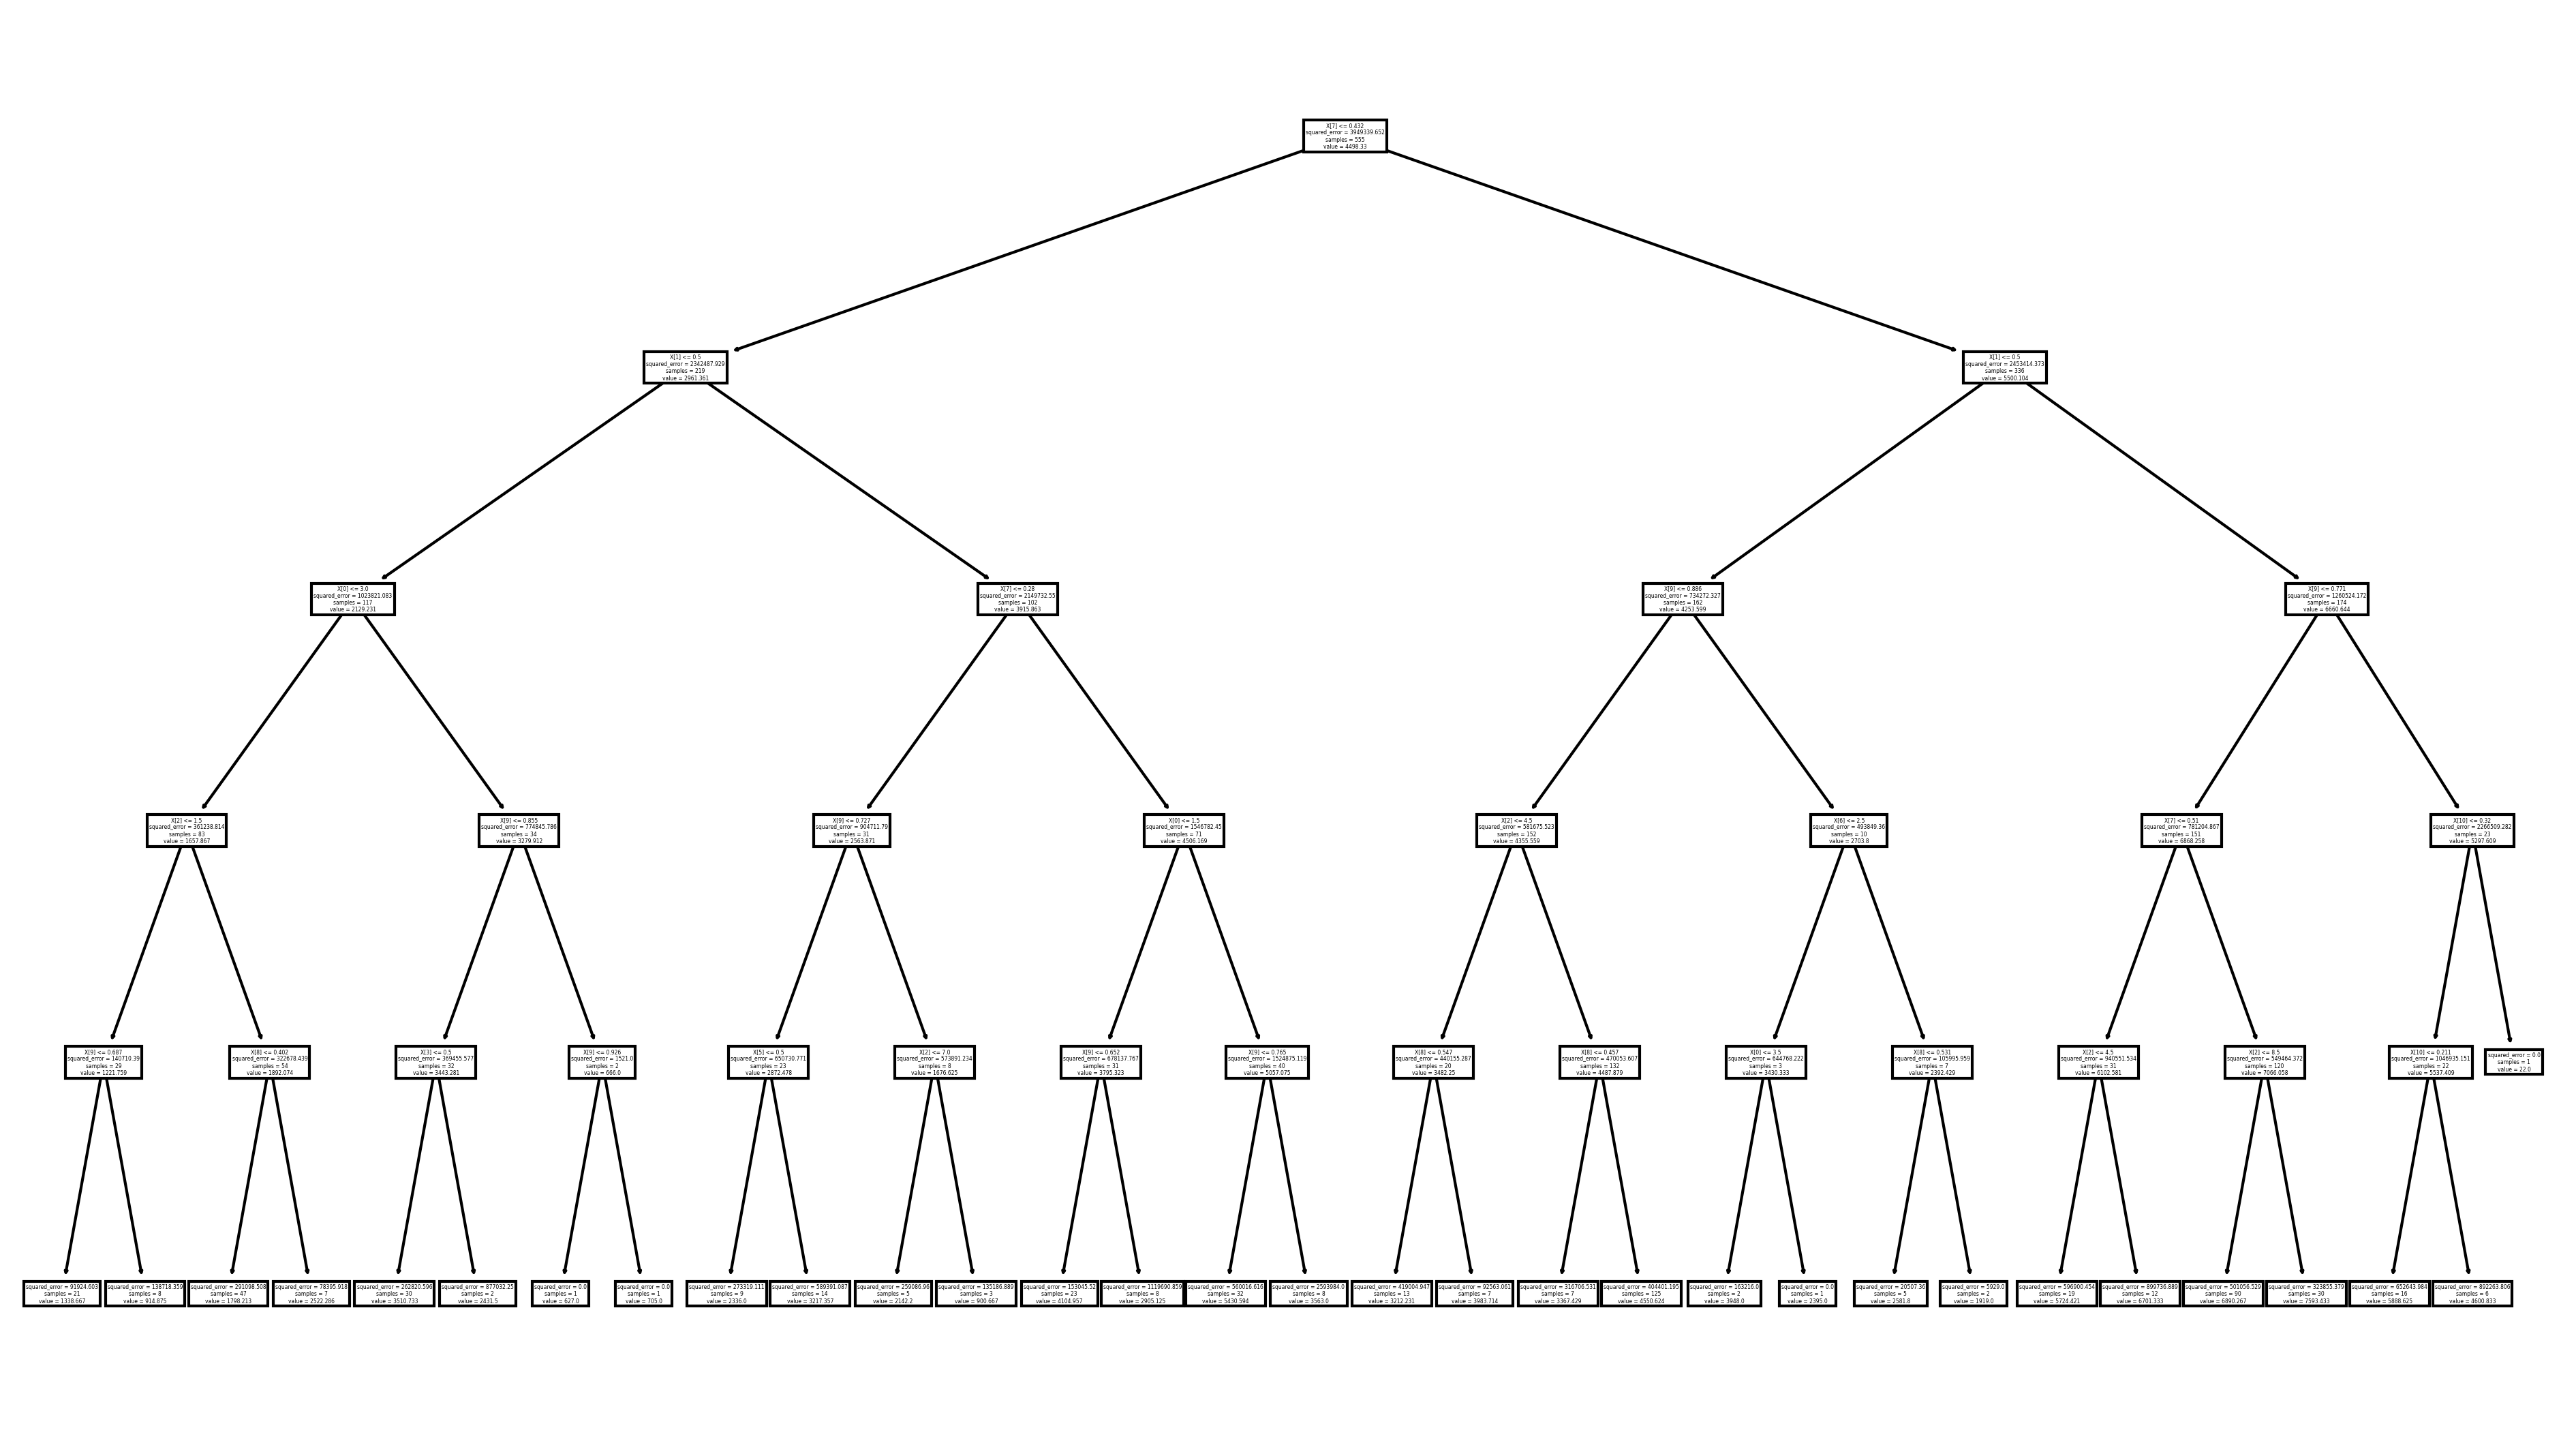

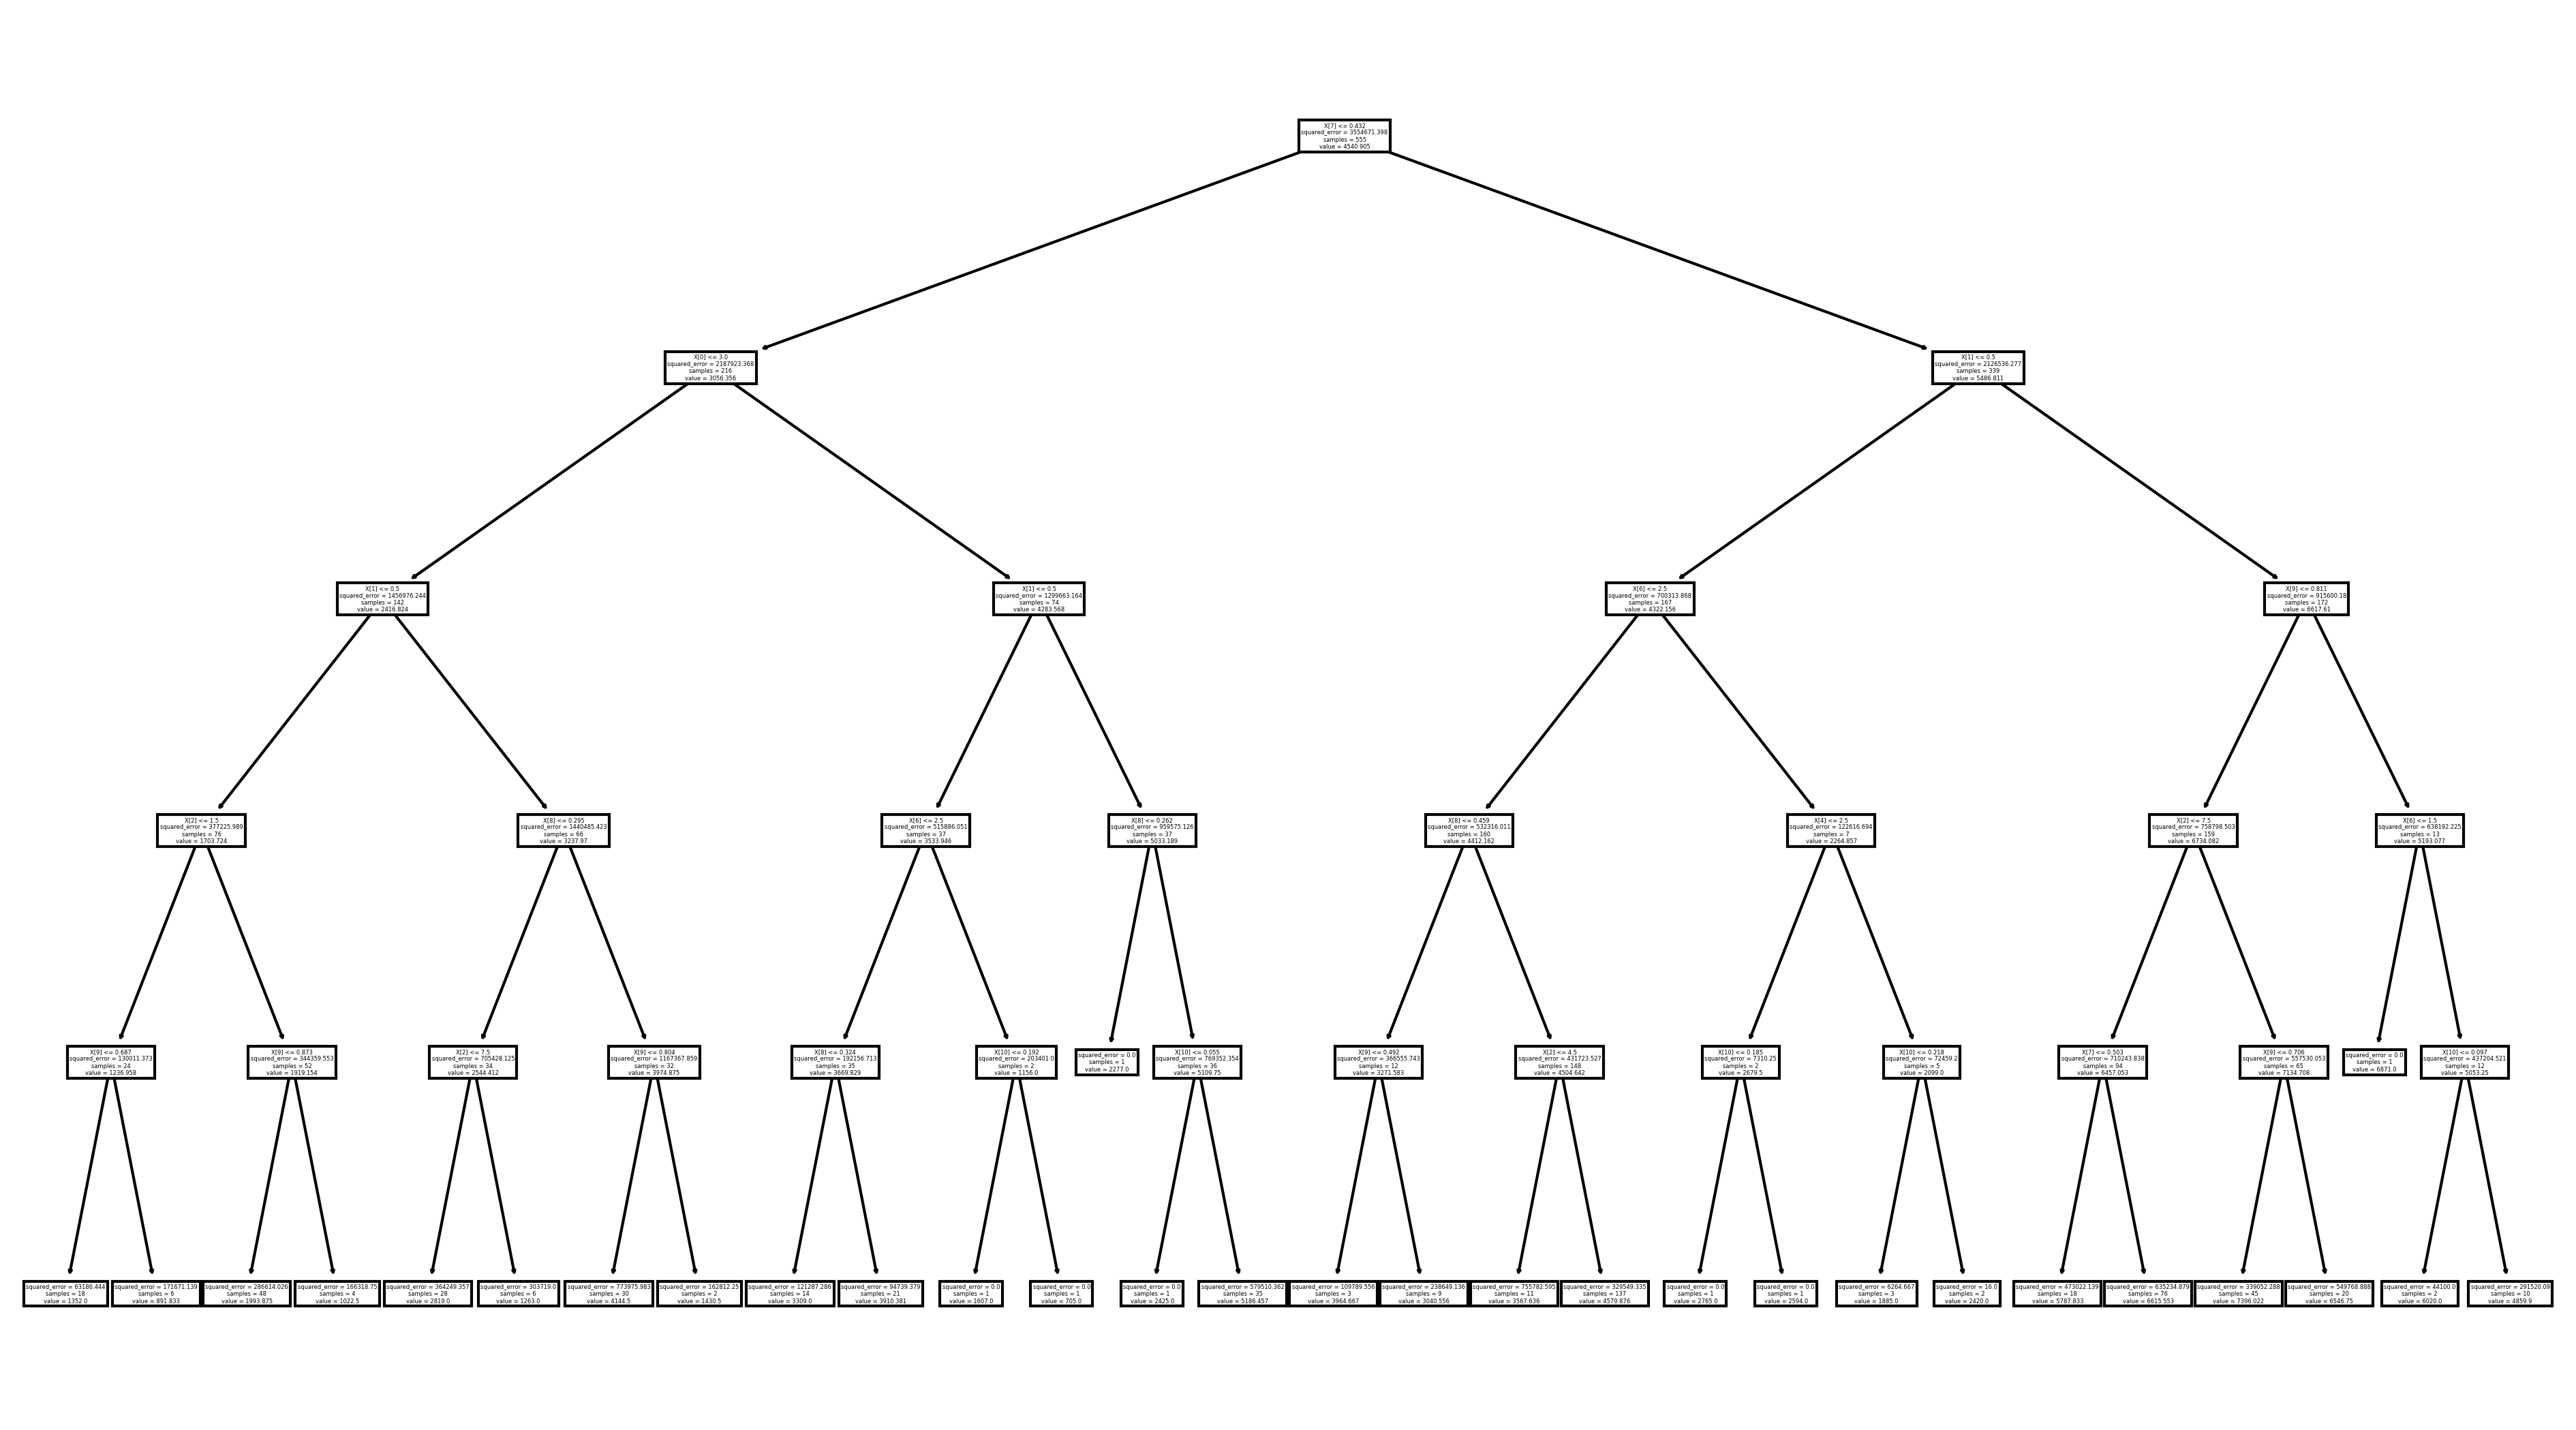

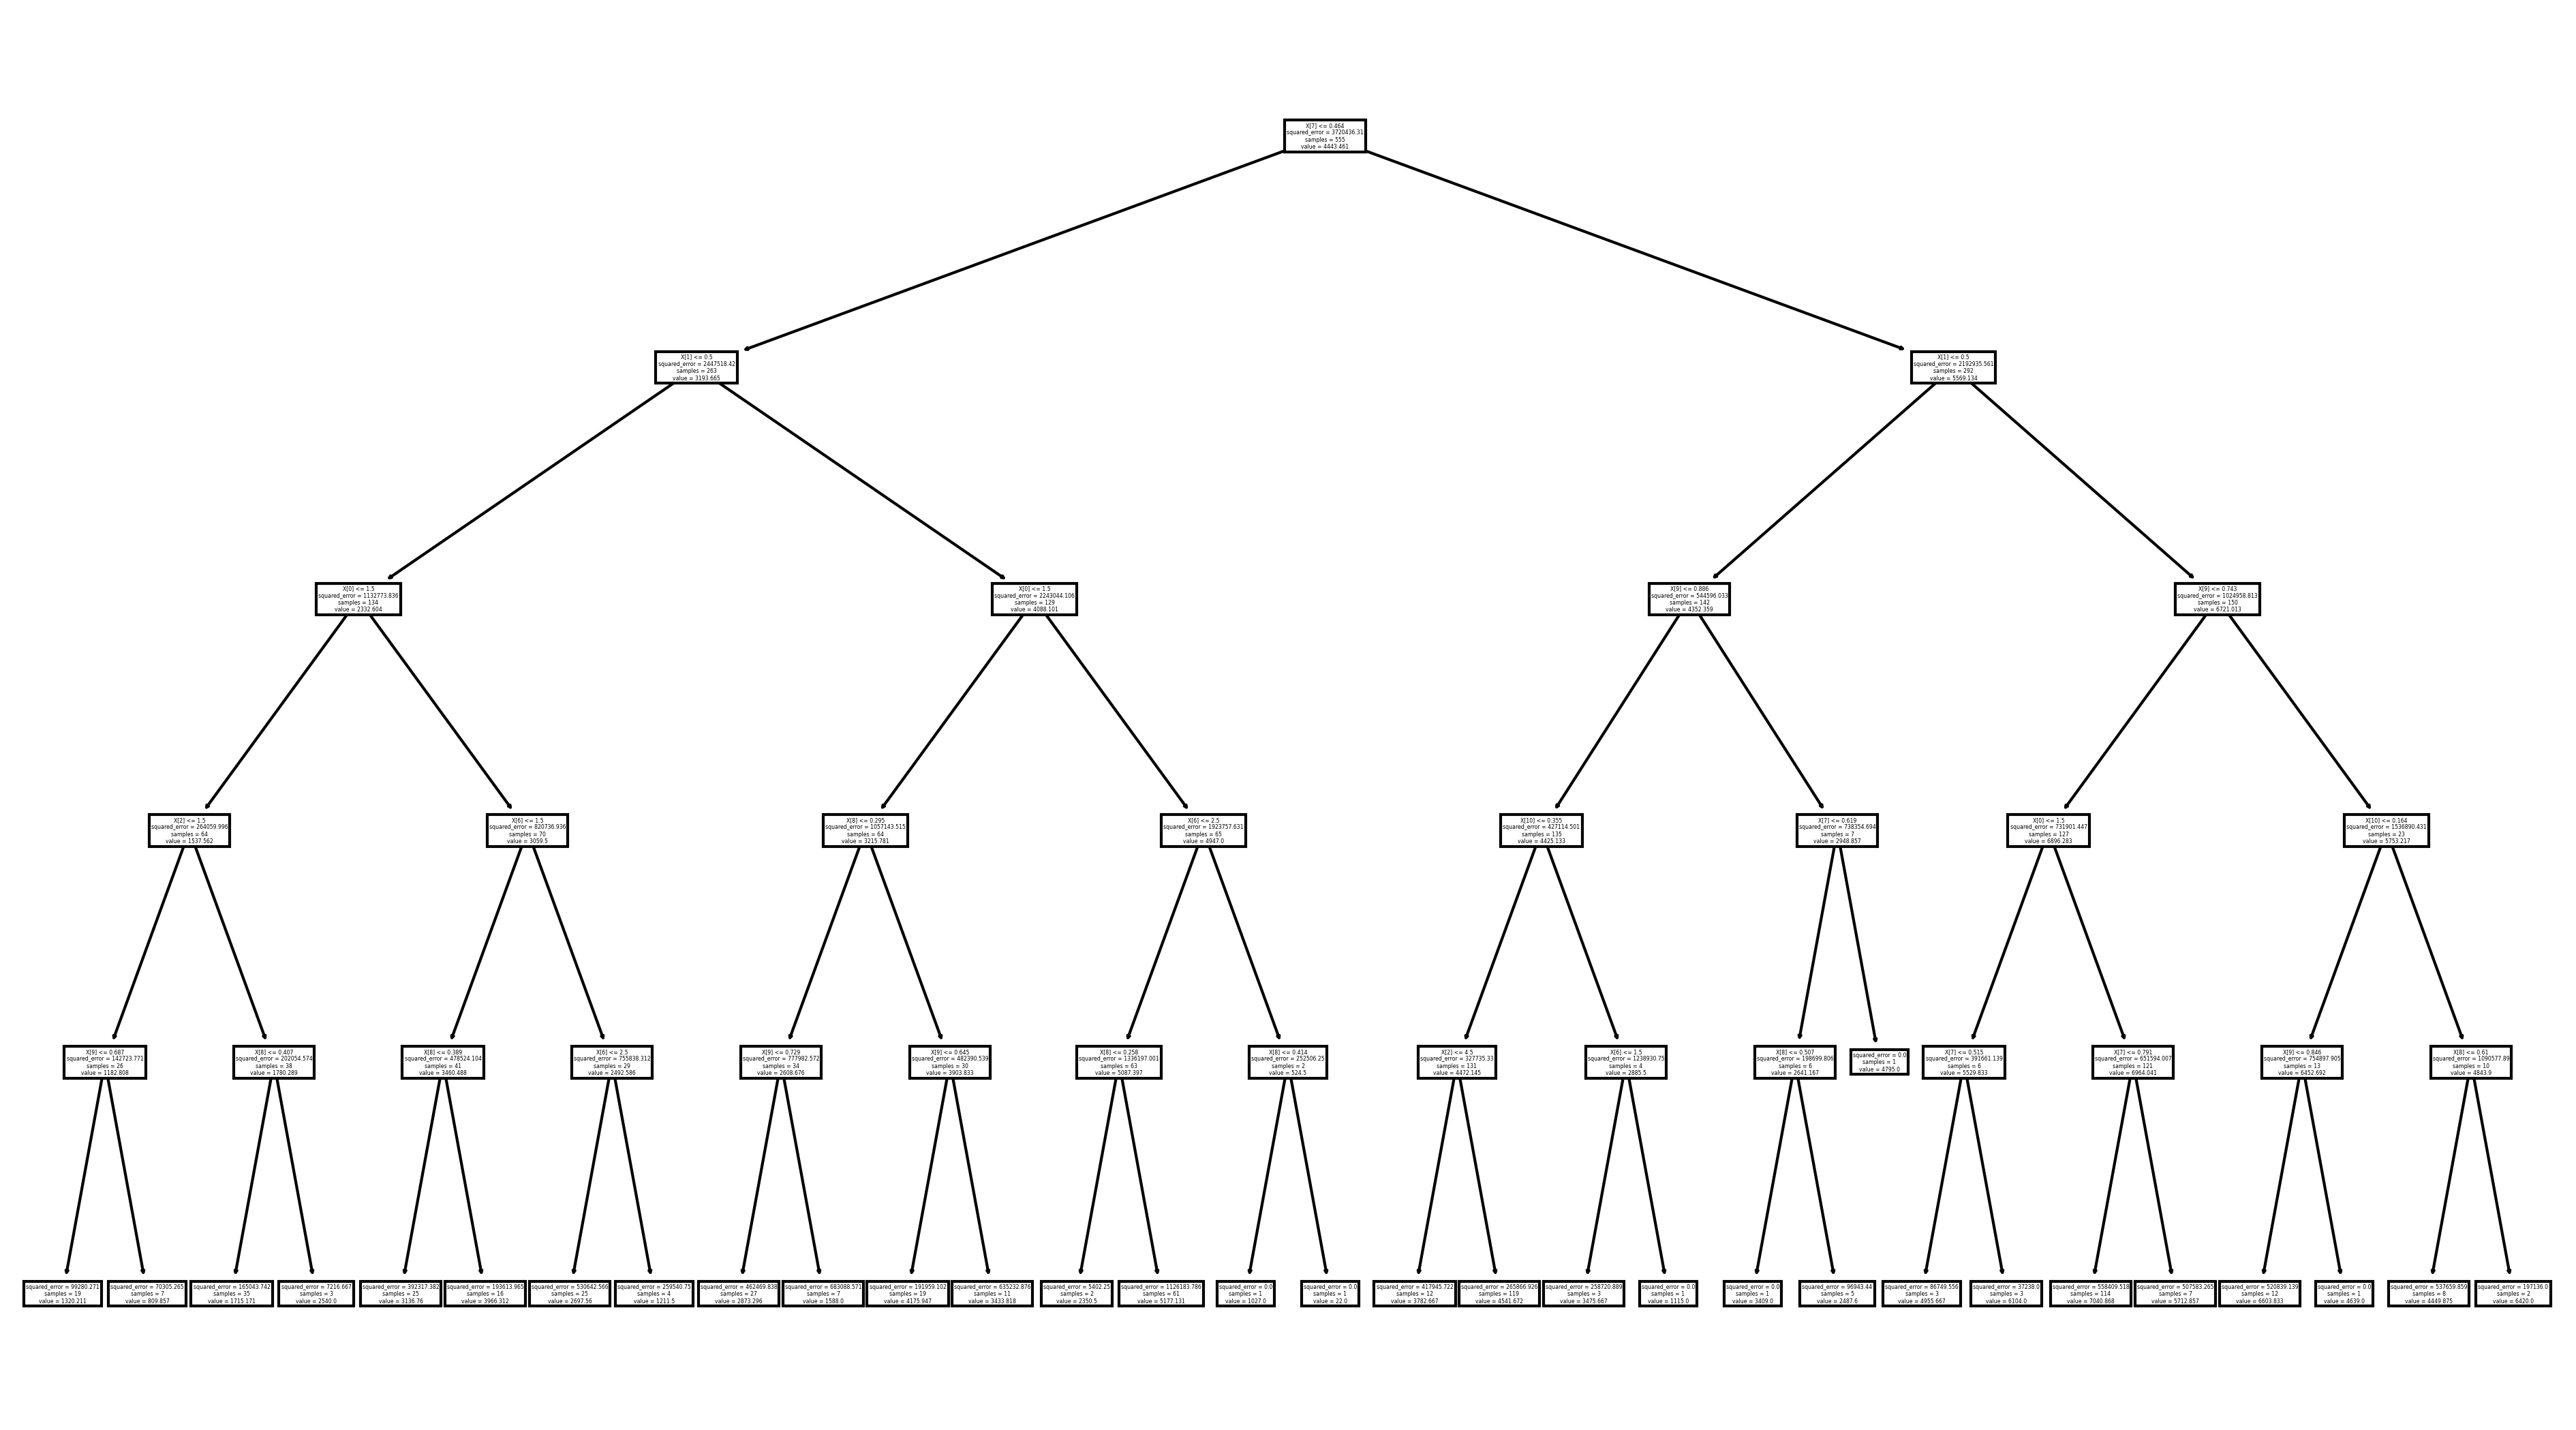

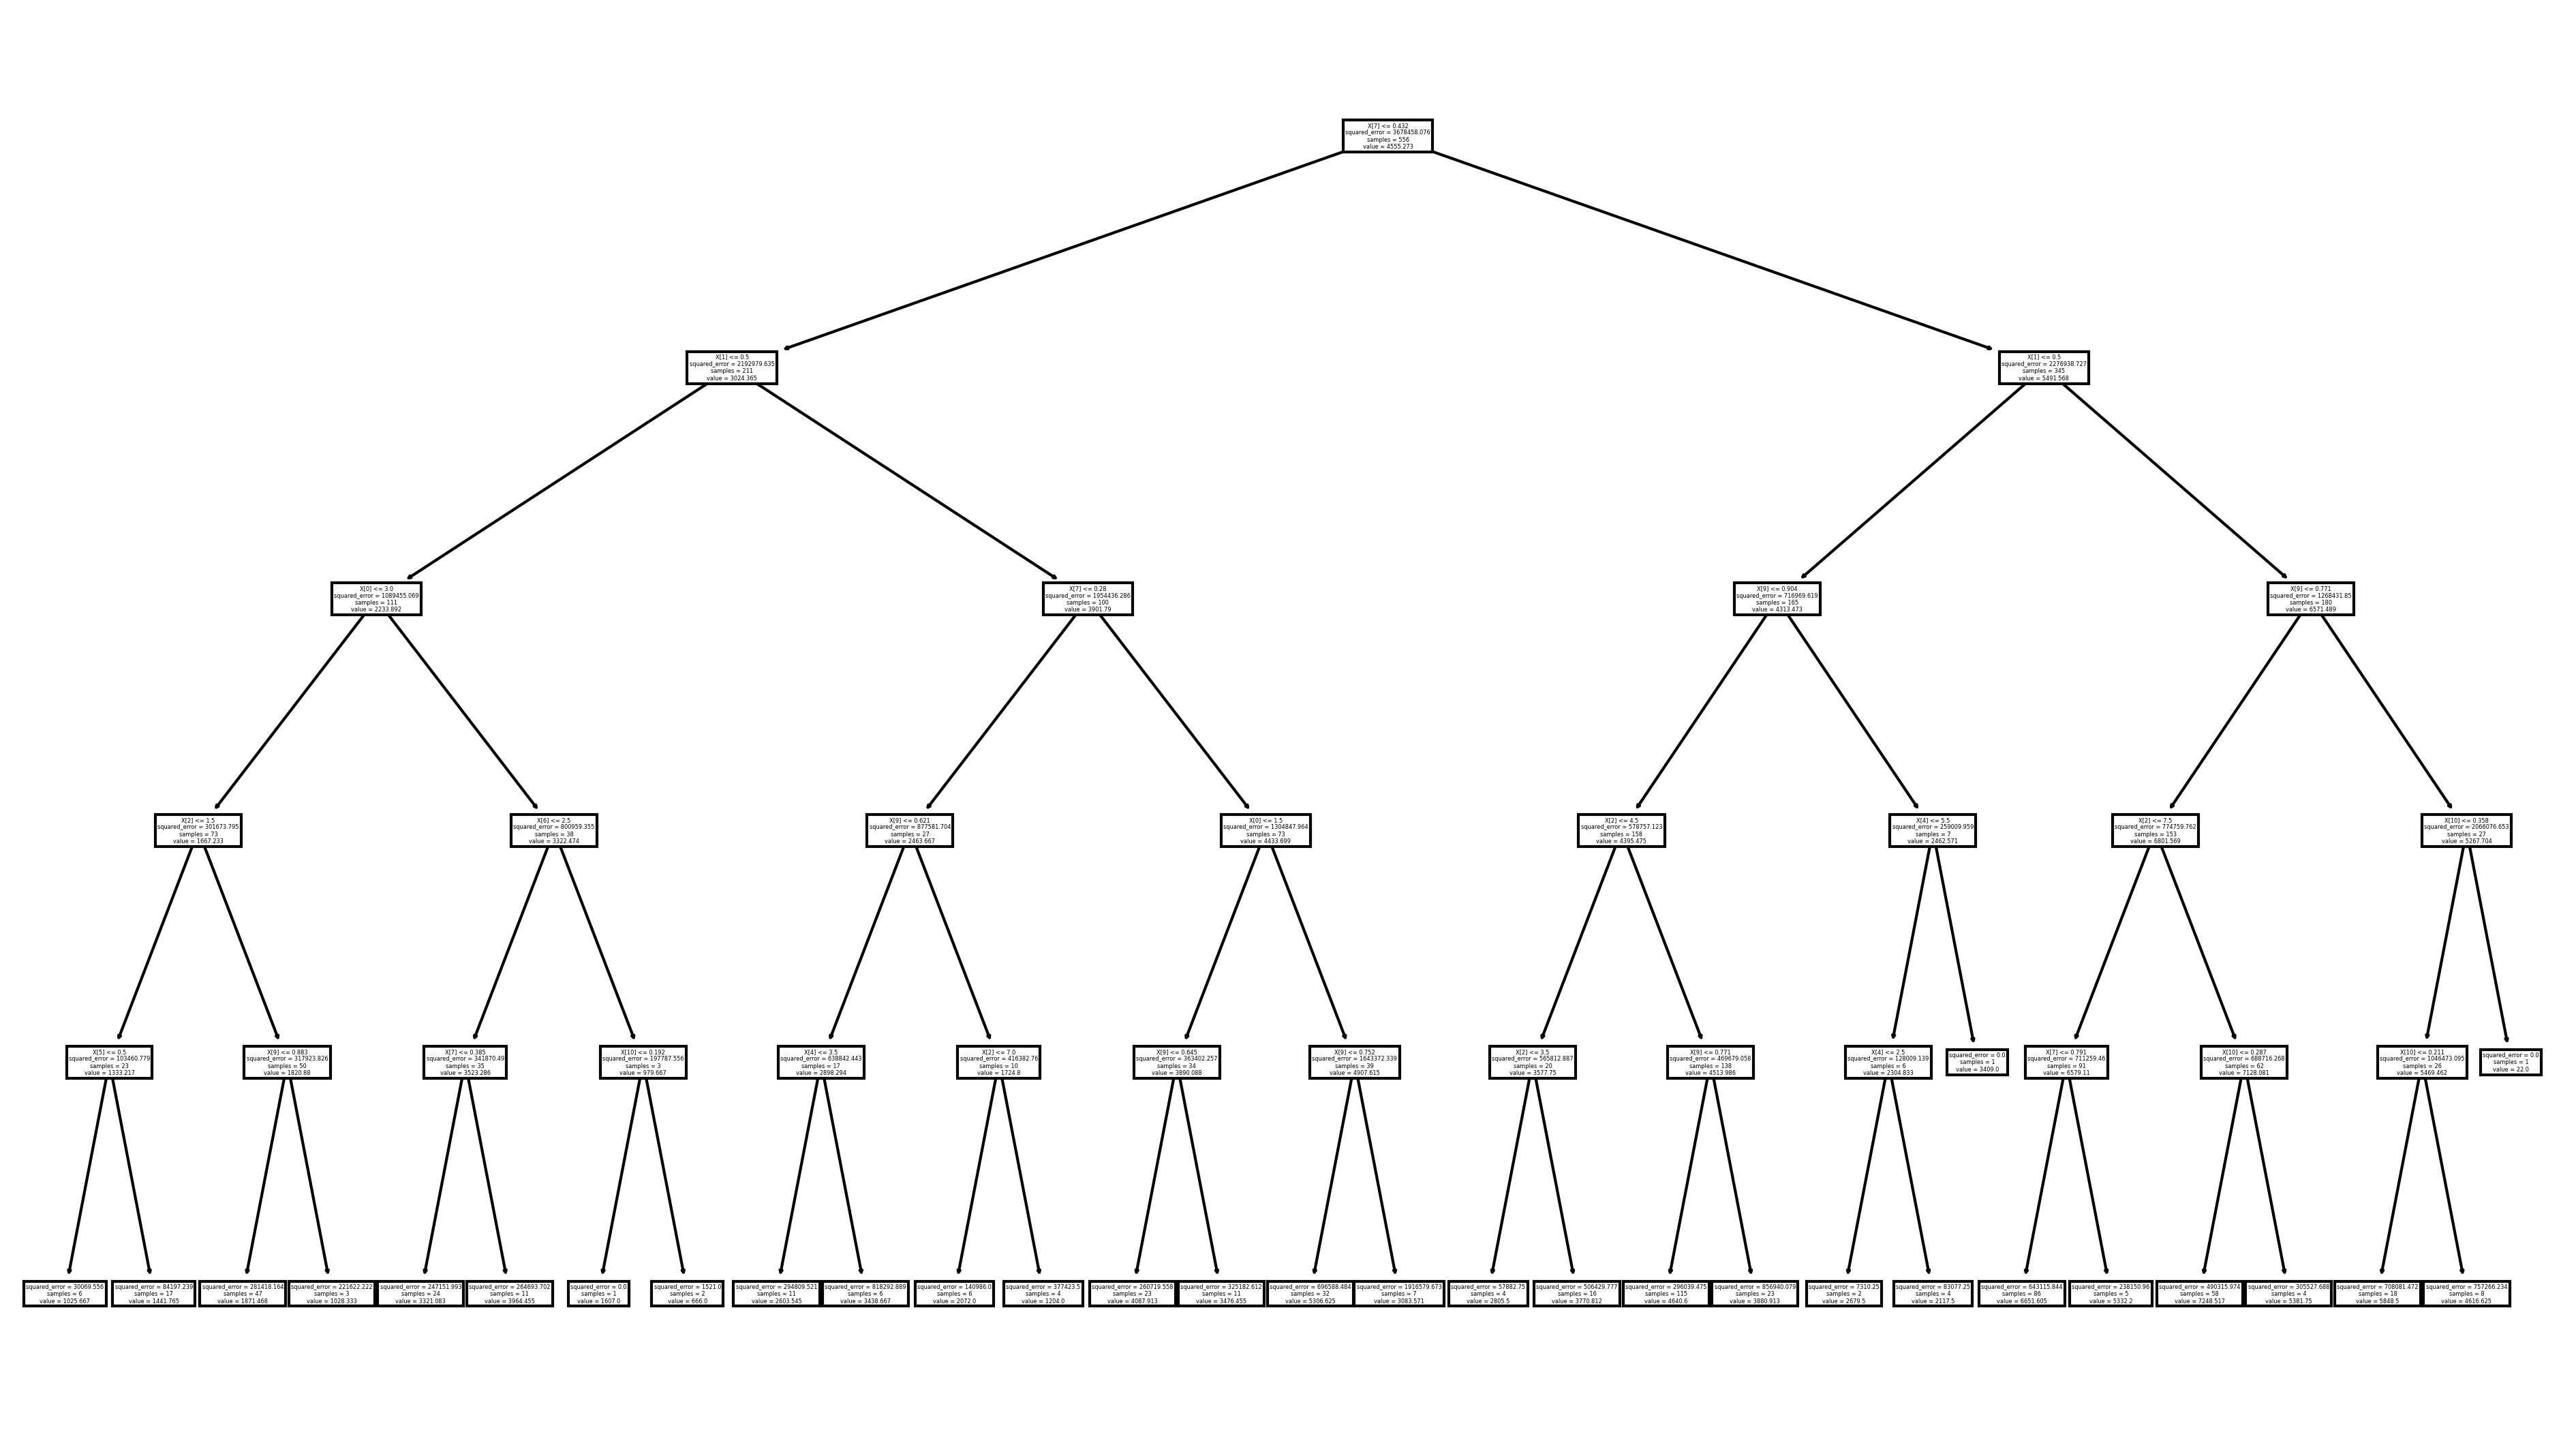

prosecna vrednost za r2 score je:  0.7732780402776785
prosecna vrednost za rmse score je:  901.8274742763624
[0.8330592987862429, 0.7353297823286653, 0.6907391519288917, 0.7978220106313411, 0.8094399577132517]
0.7732780402776785
[830.7746709324613, 844.9361565483771, 1144.8050614128815, 847.2428597583066, 841.3786227297854]
901.8274742763624


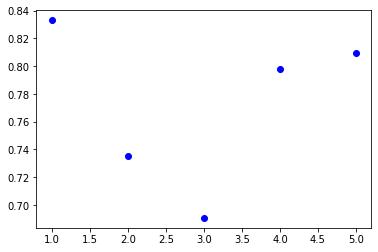

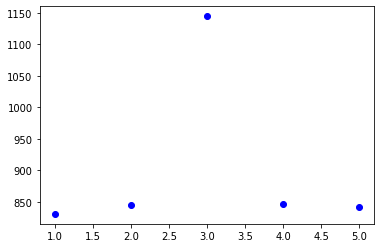

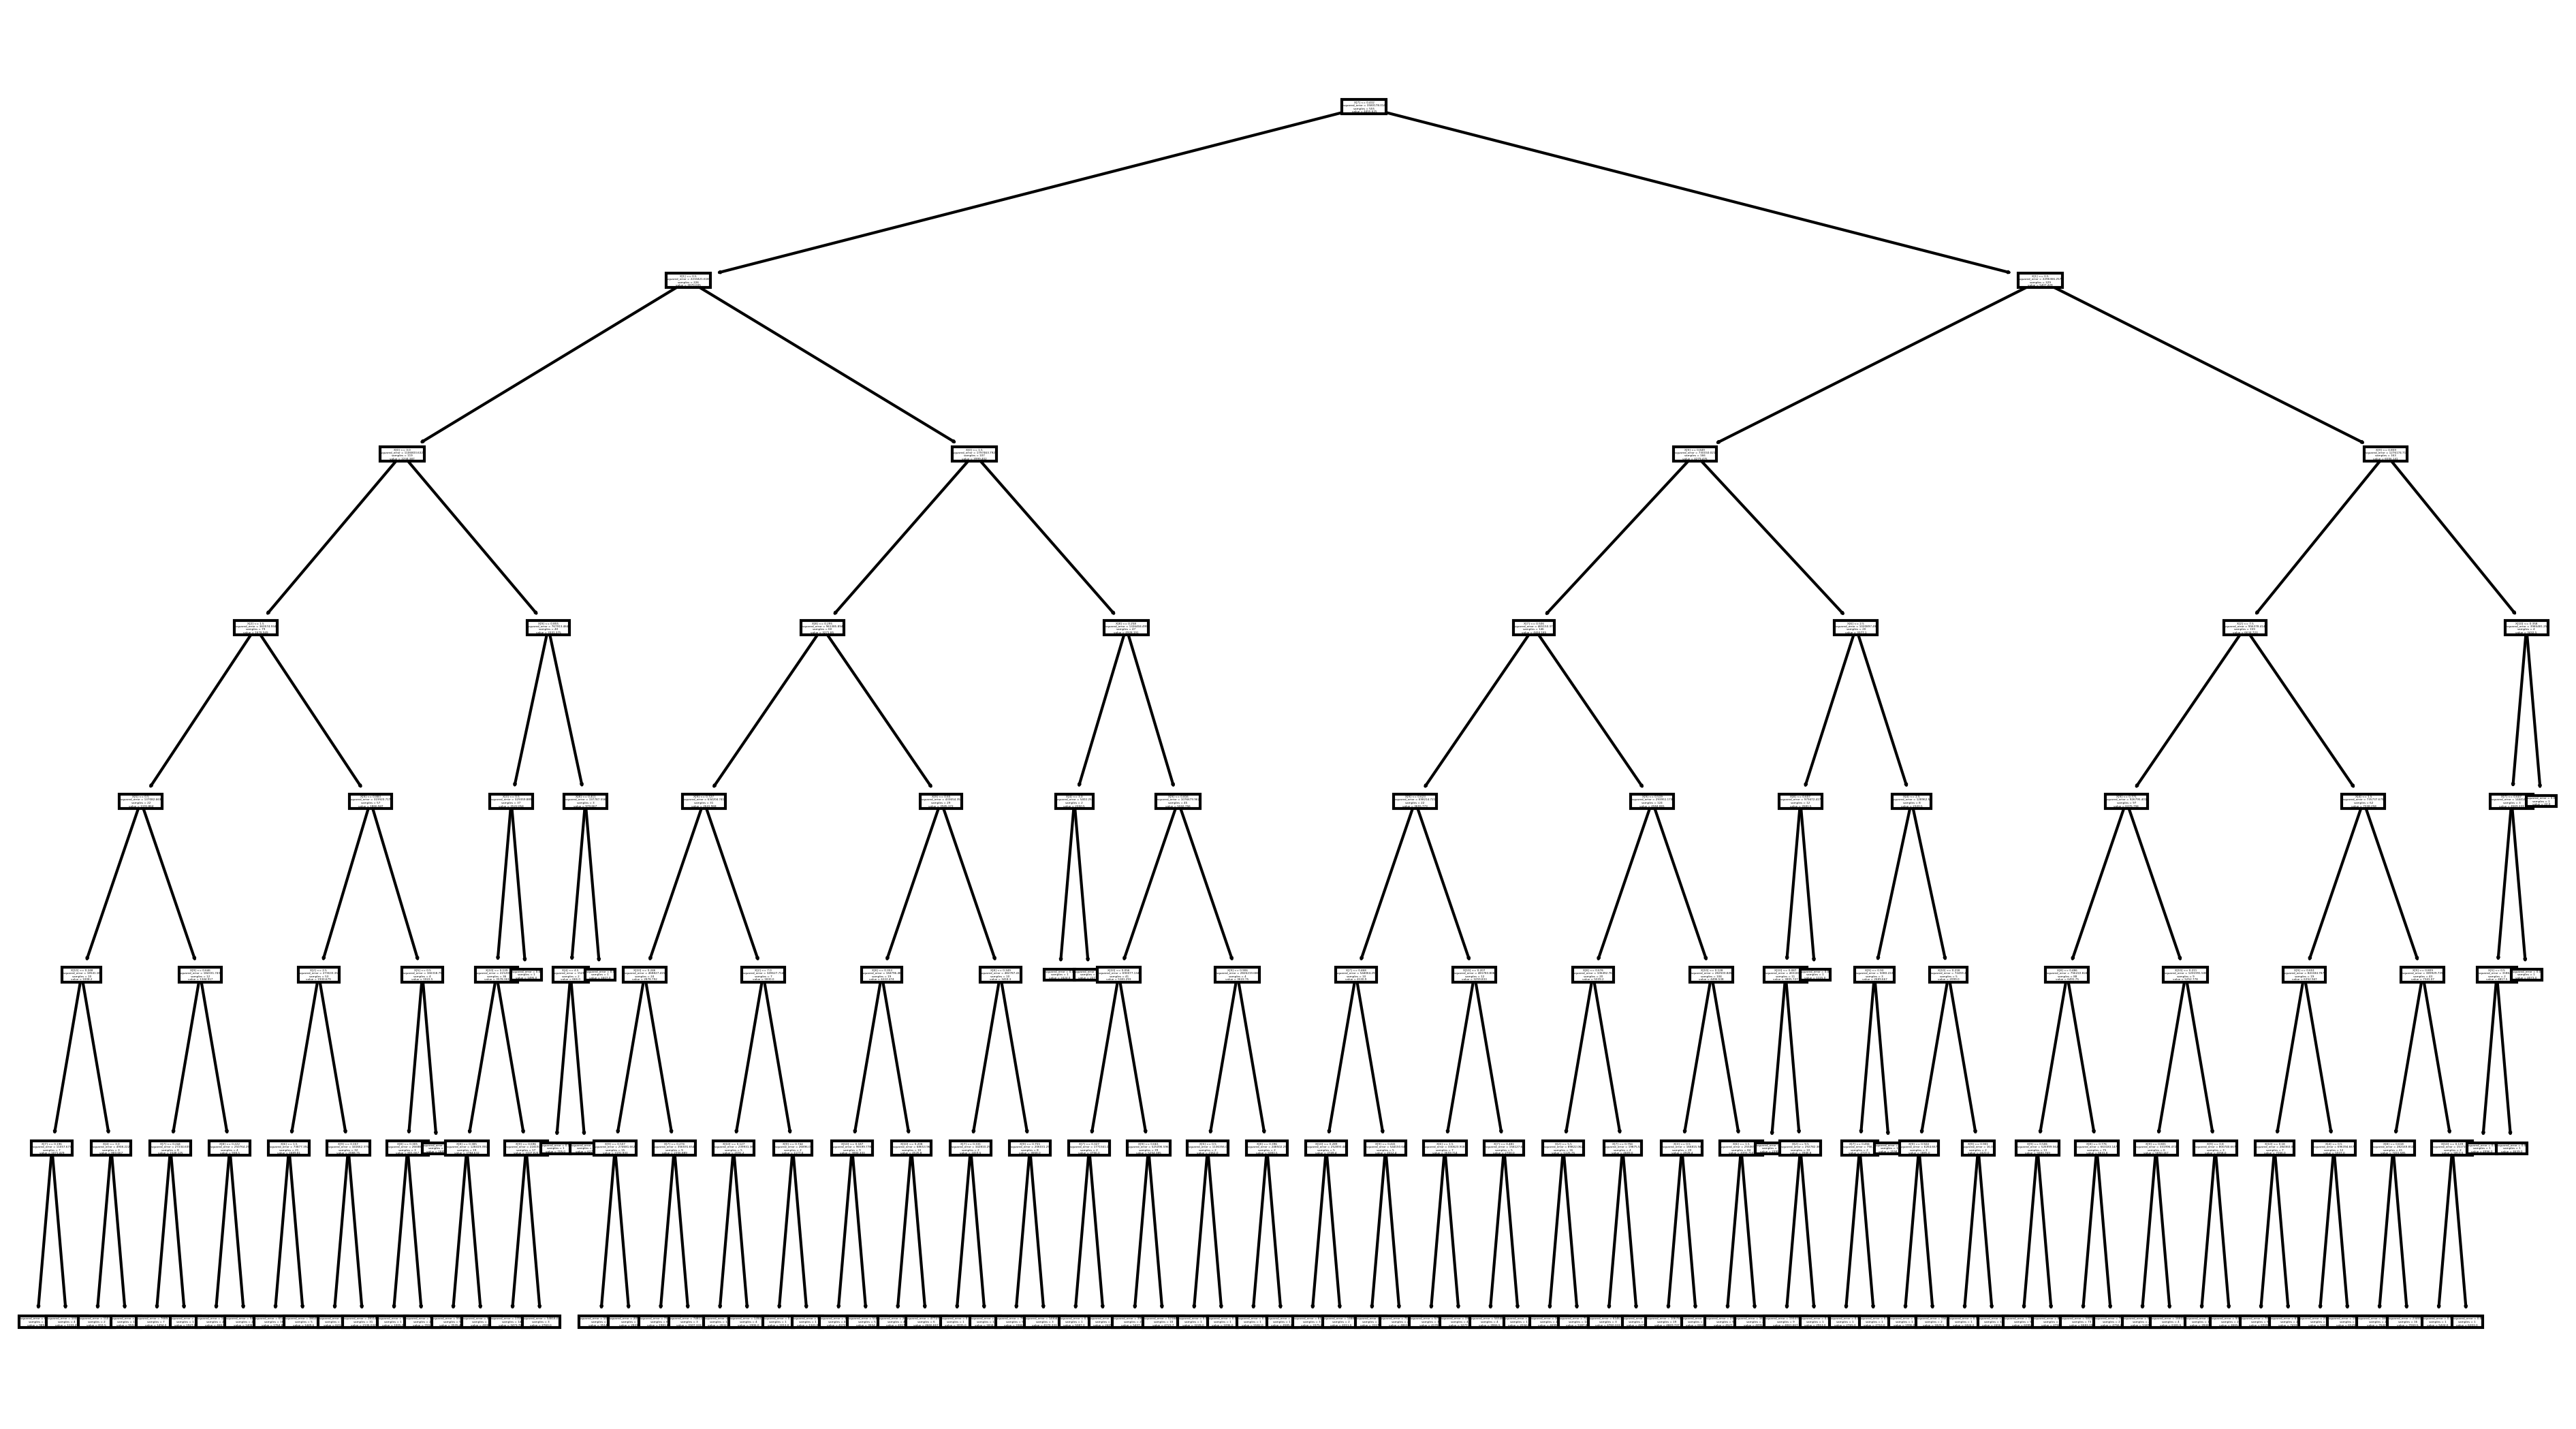

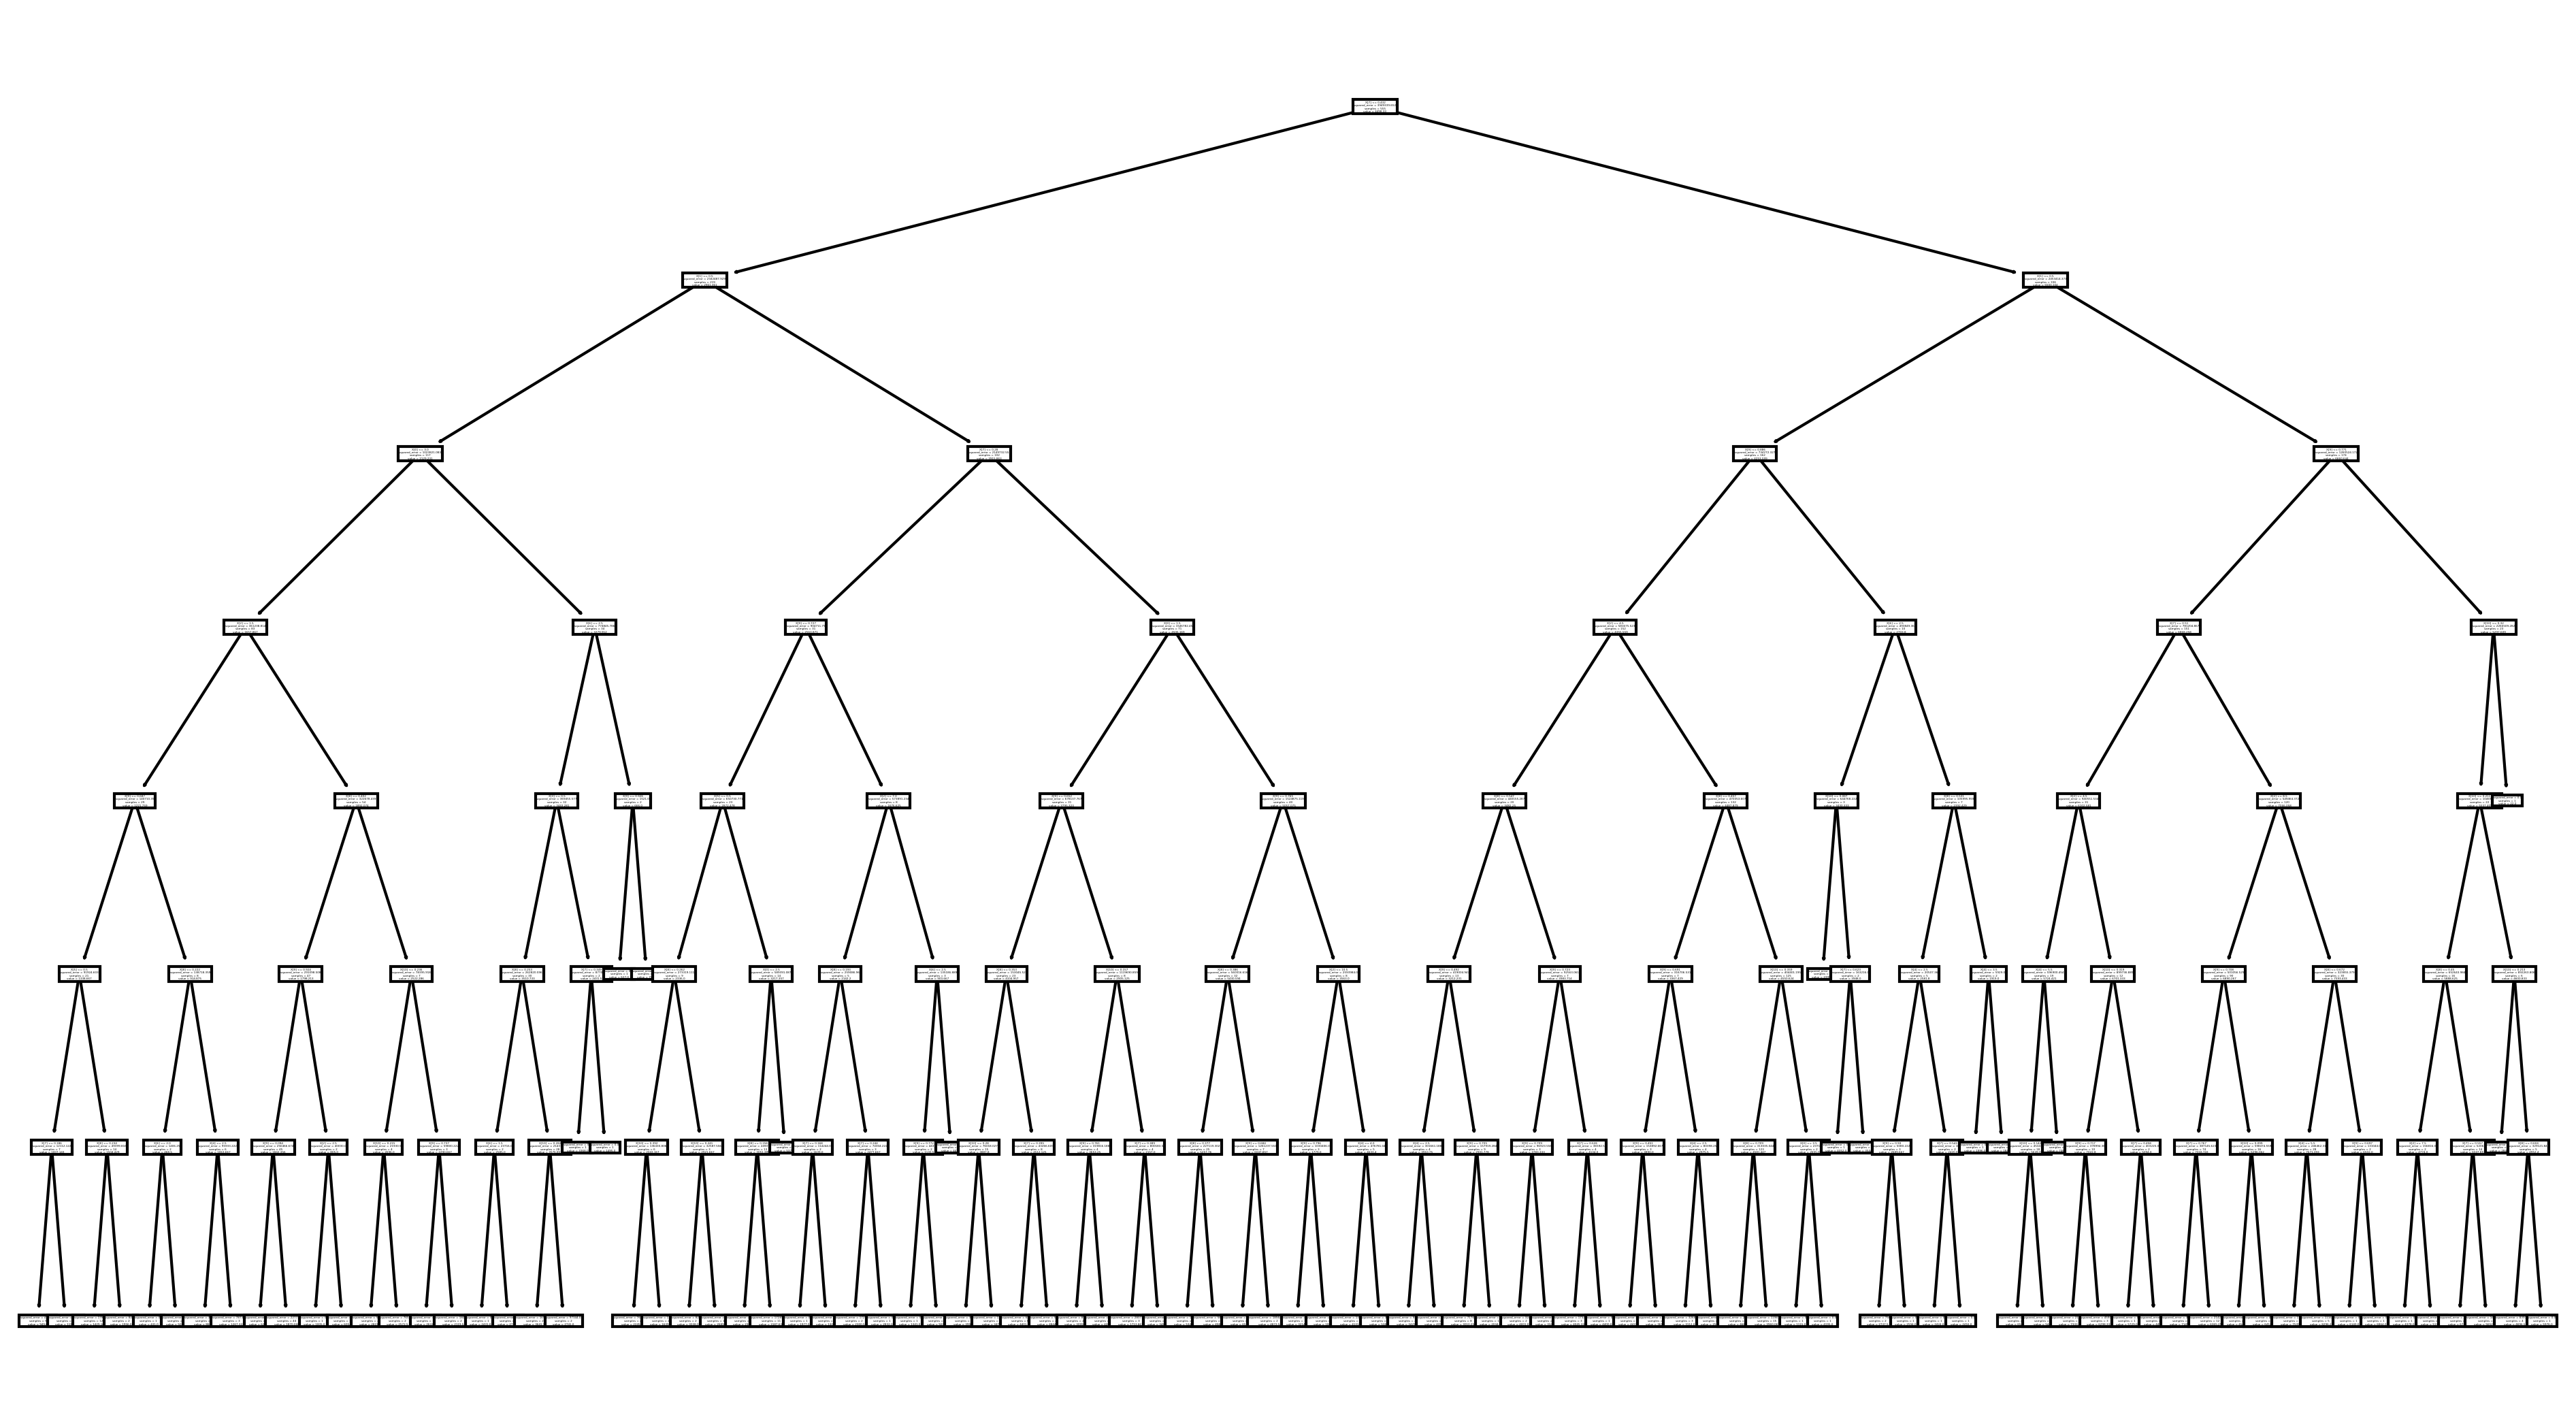

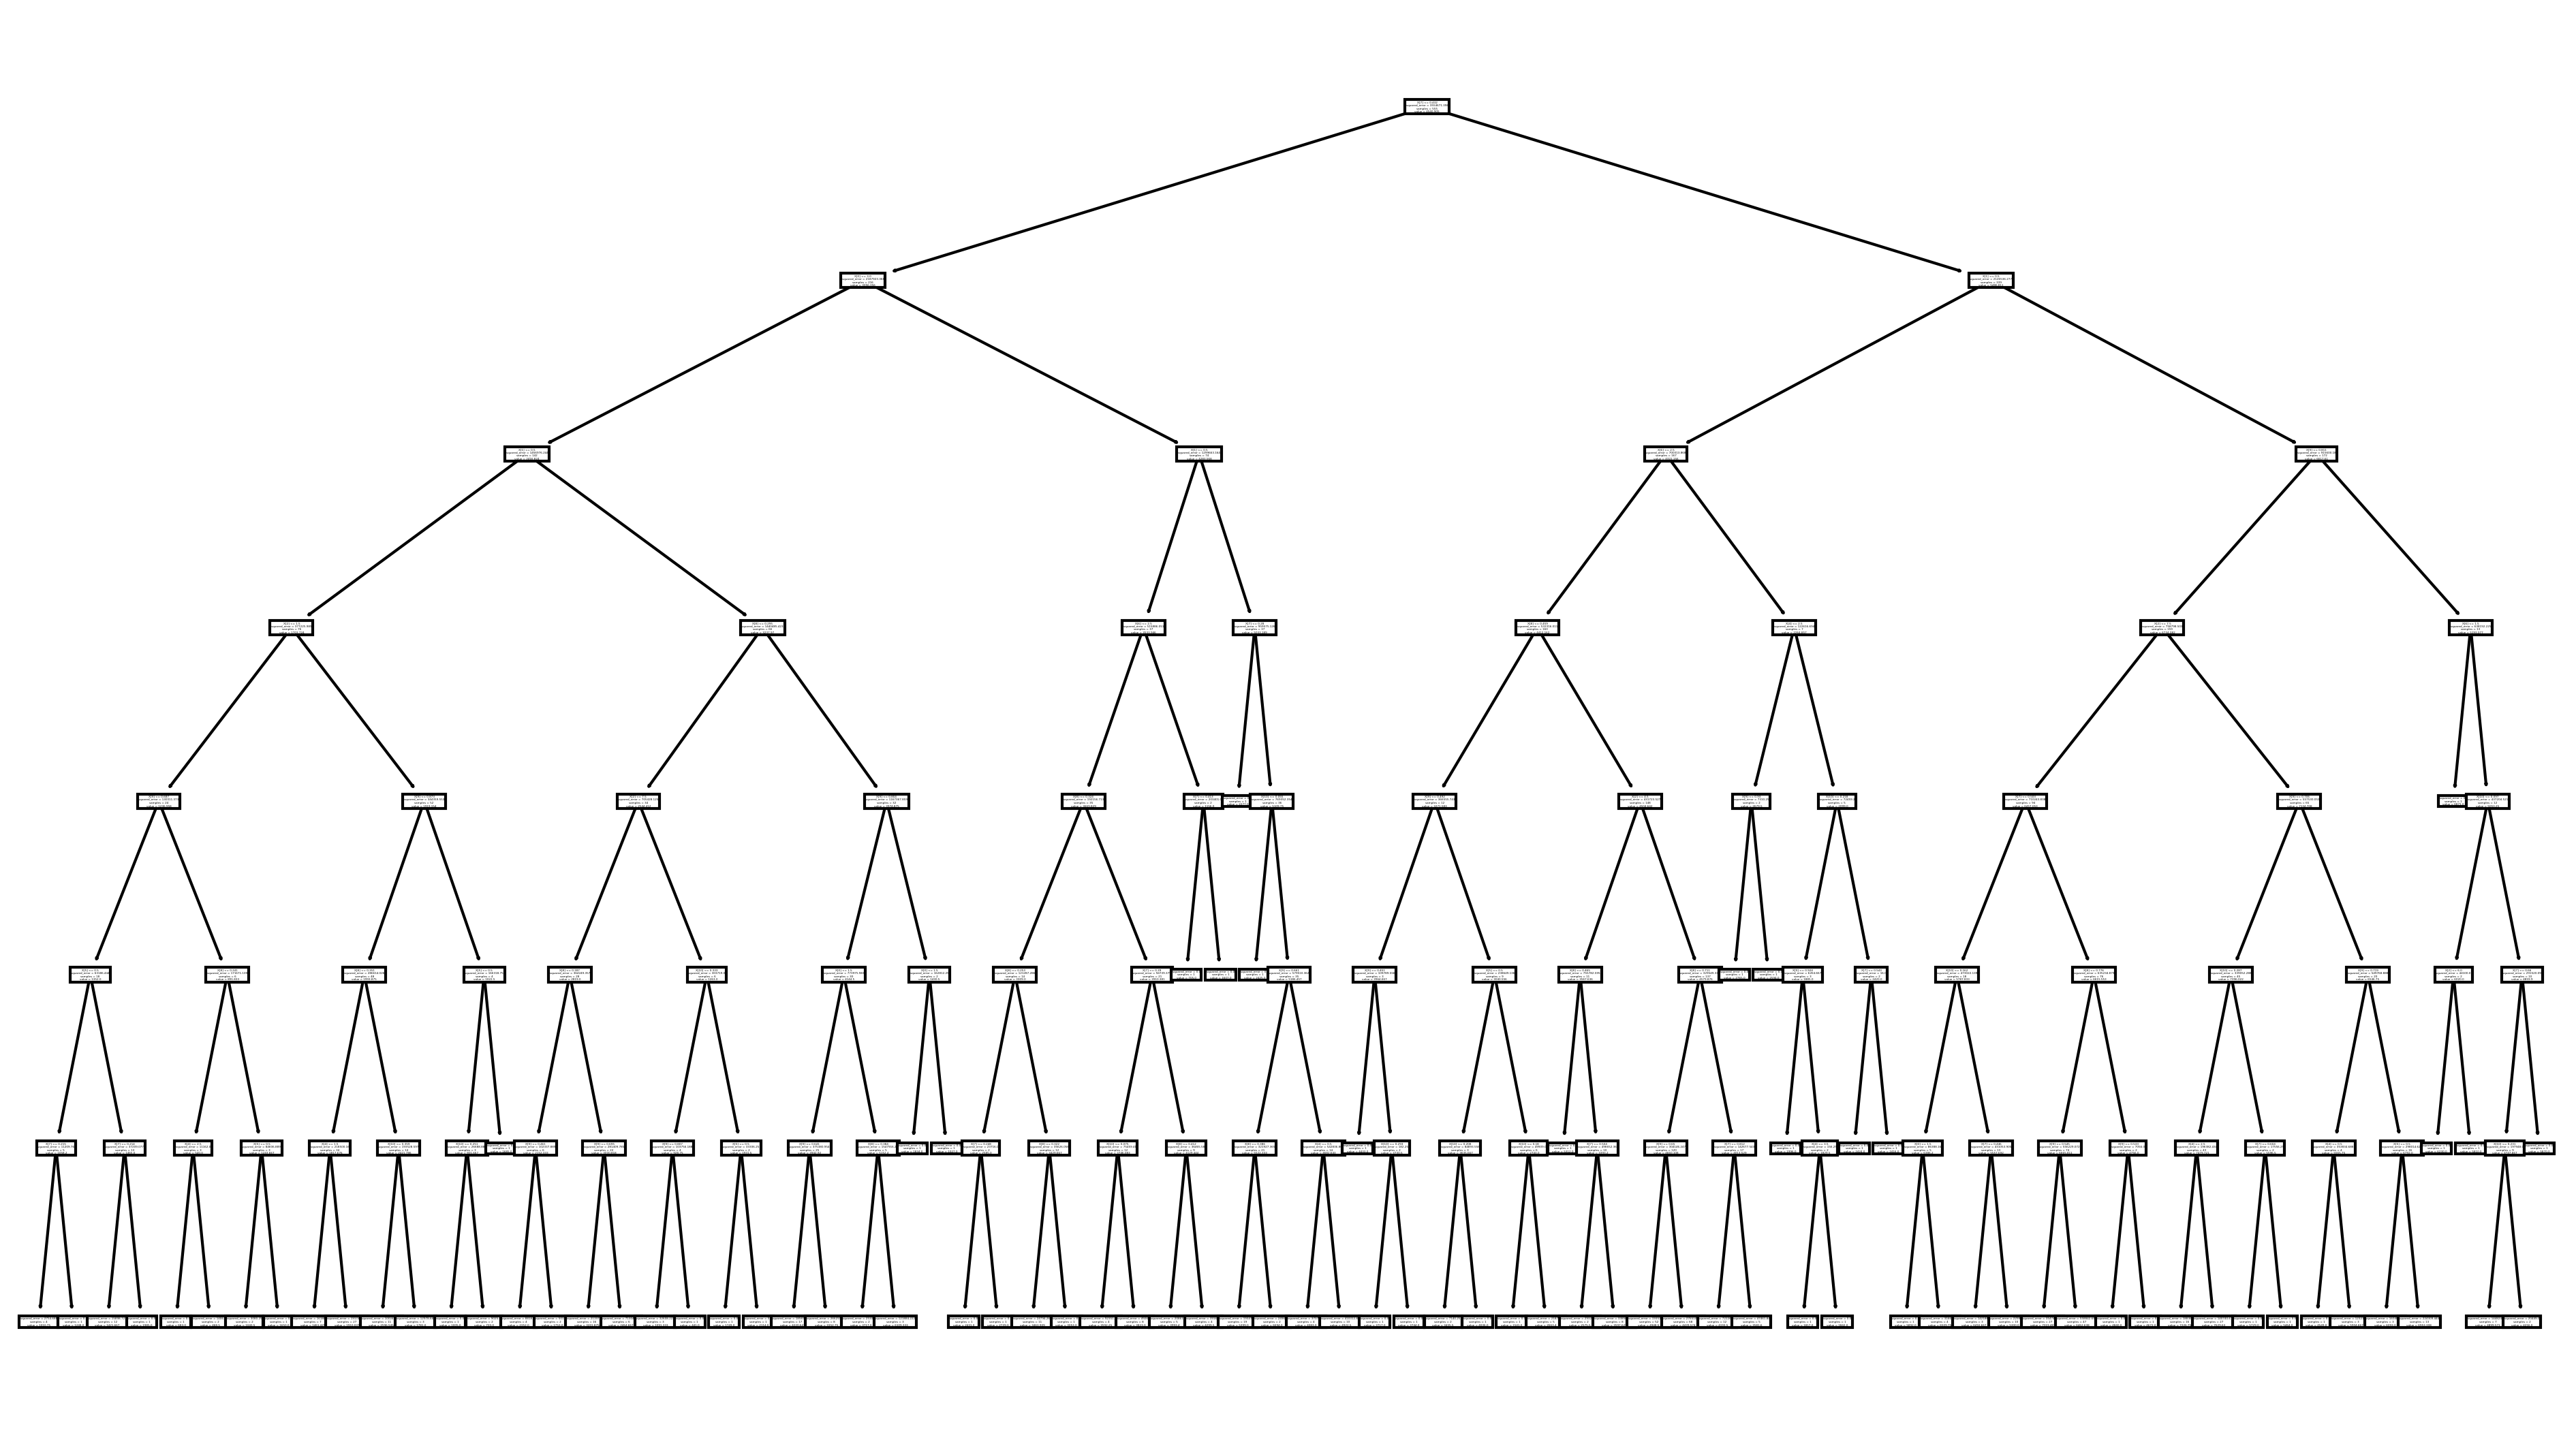

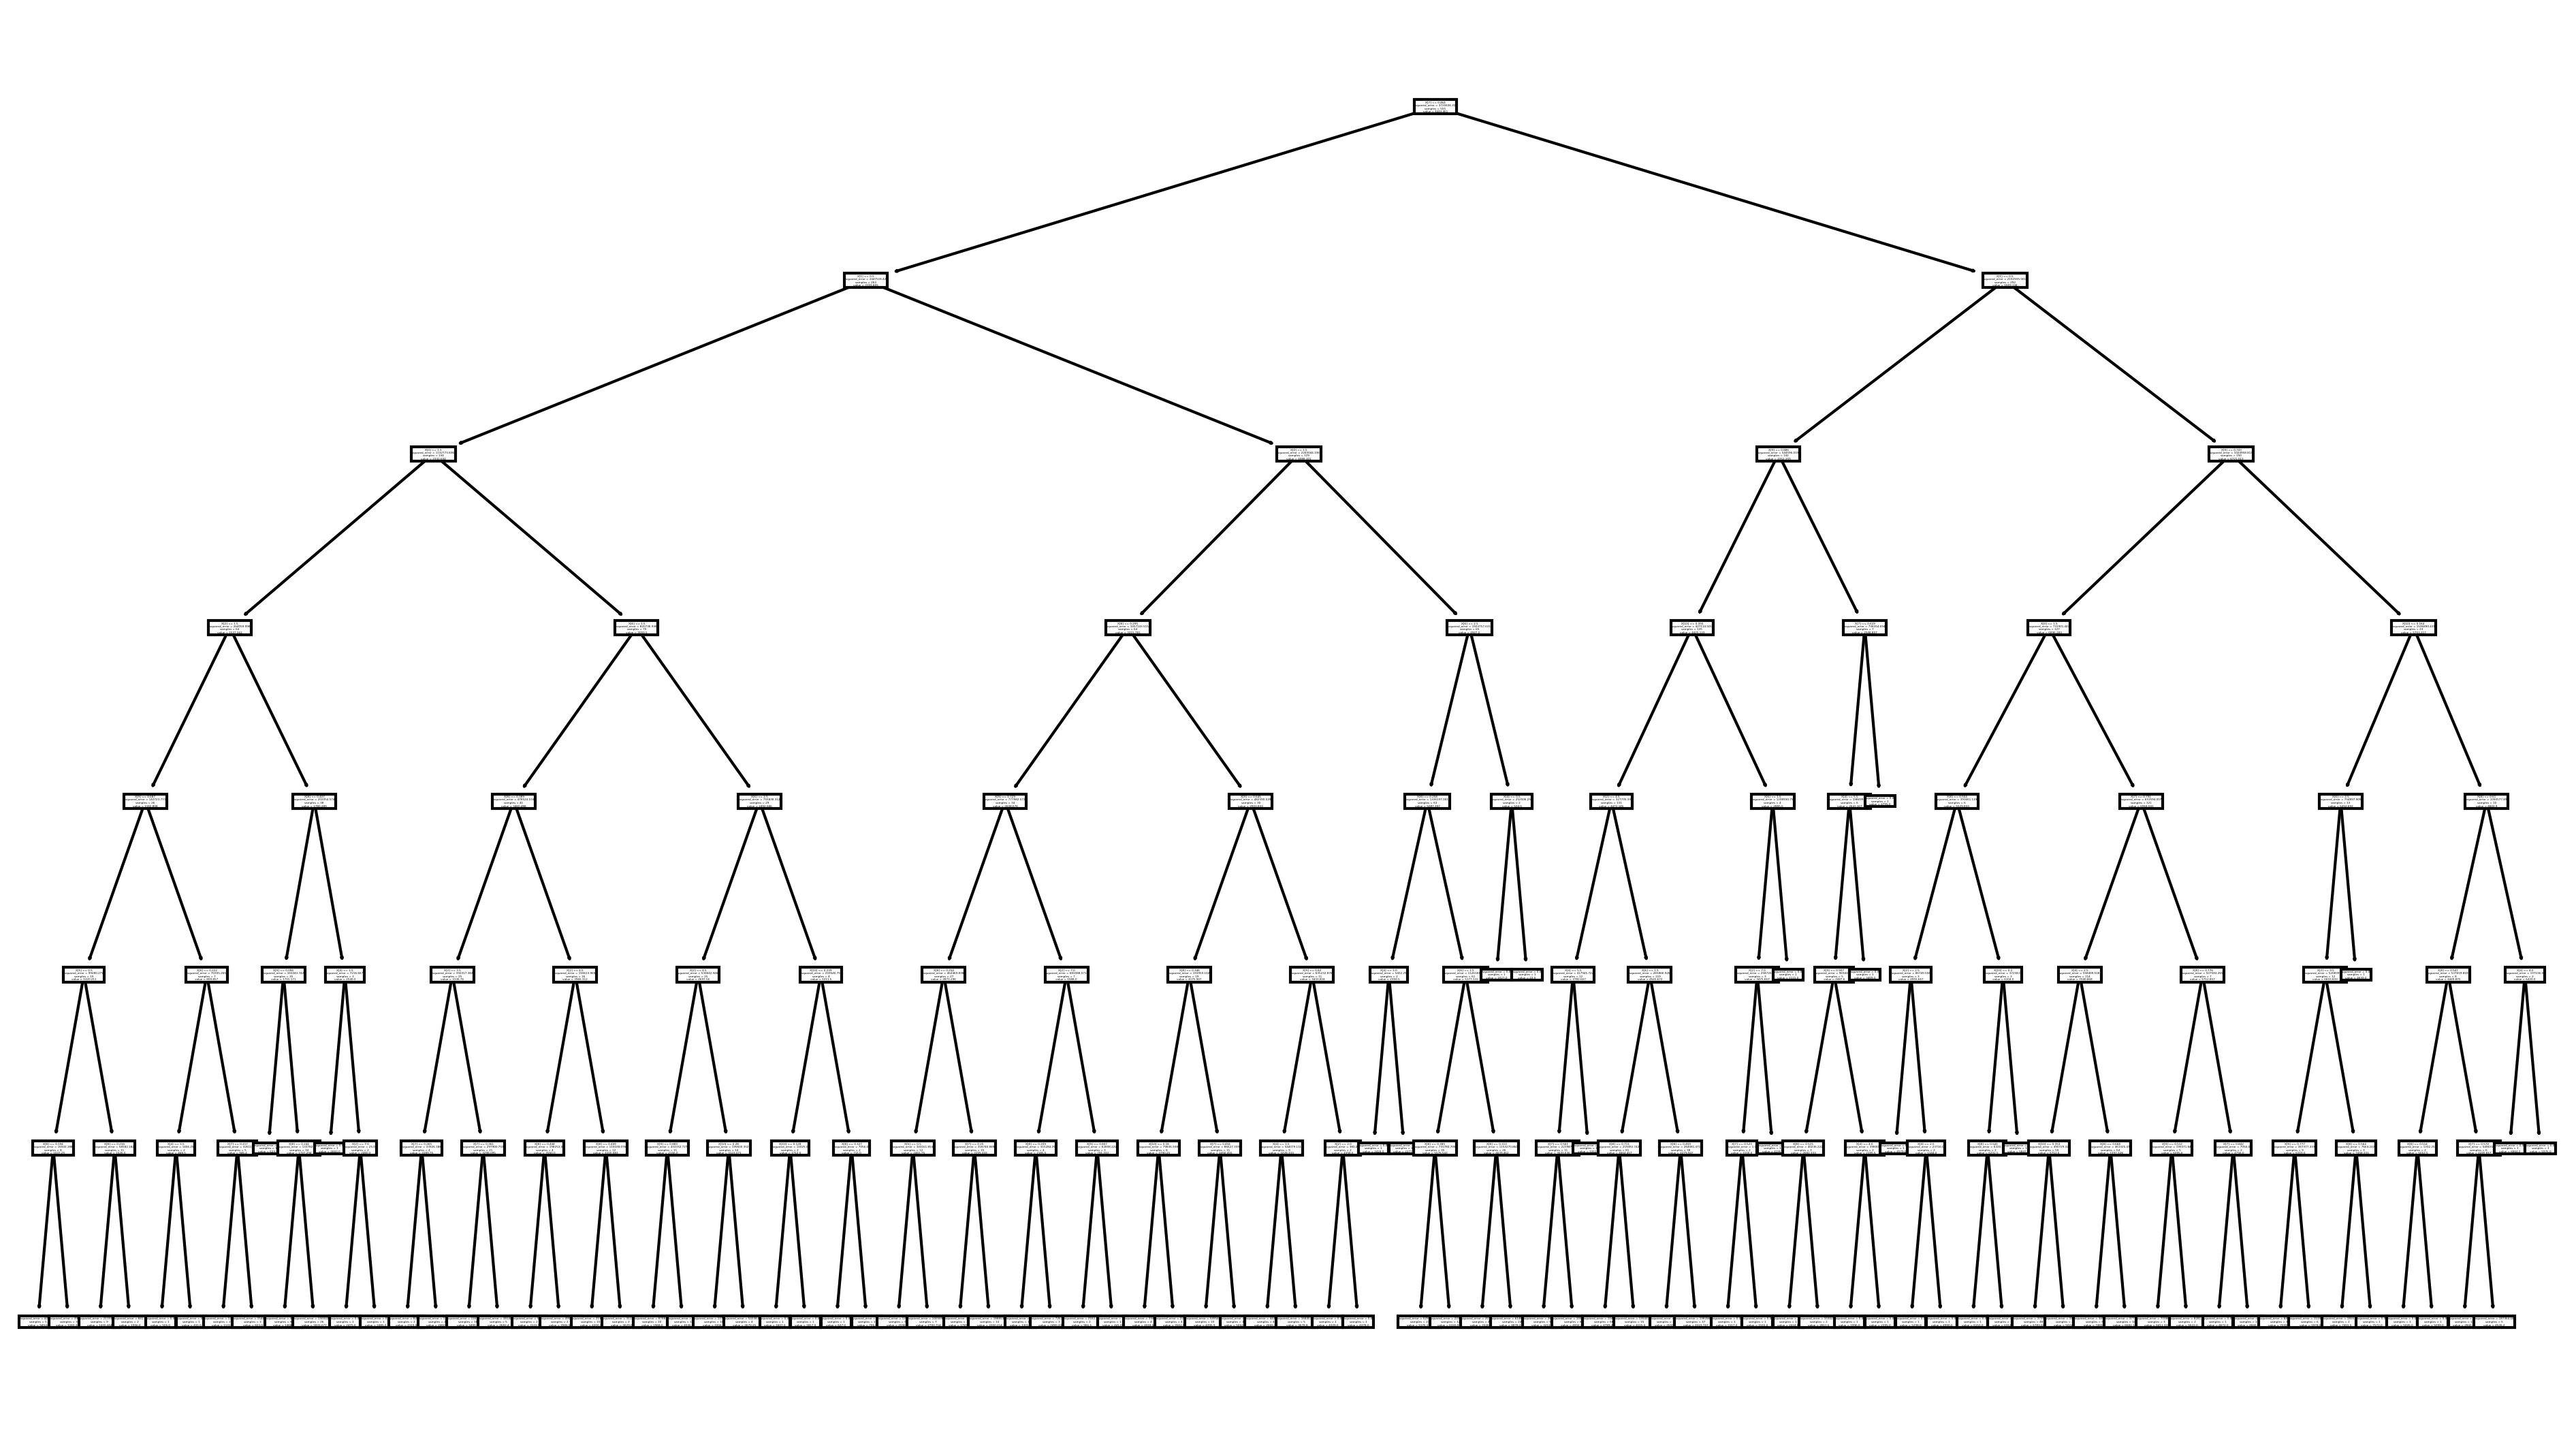

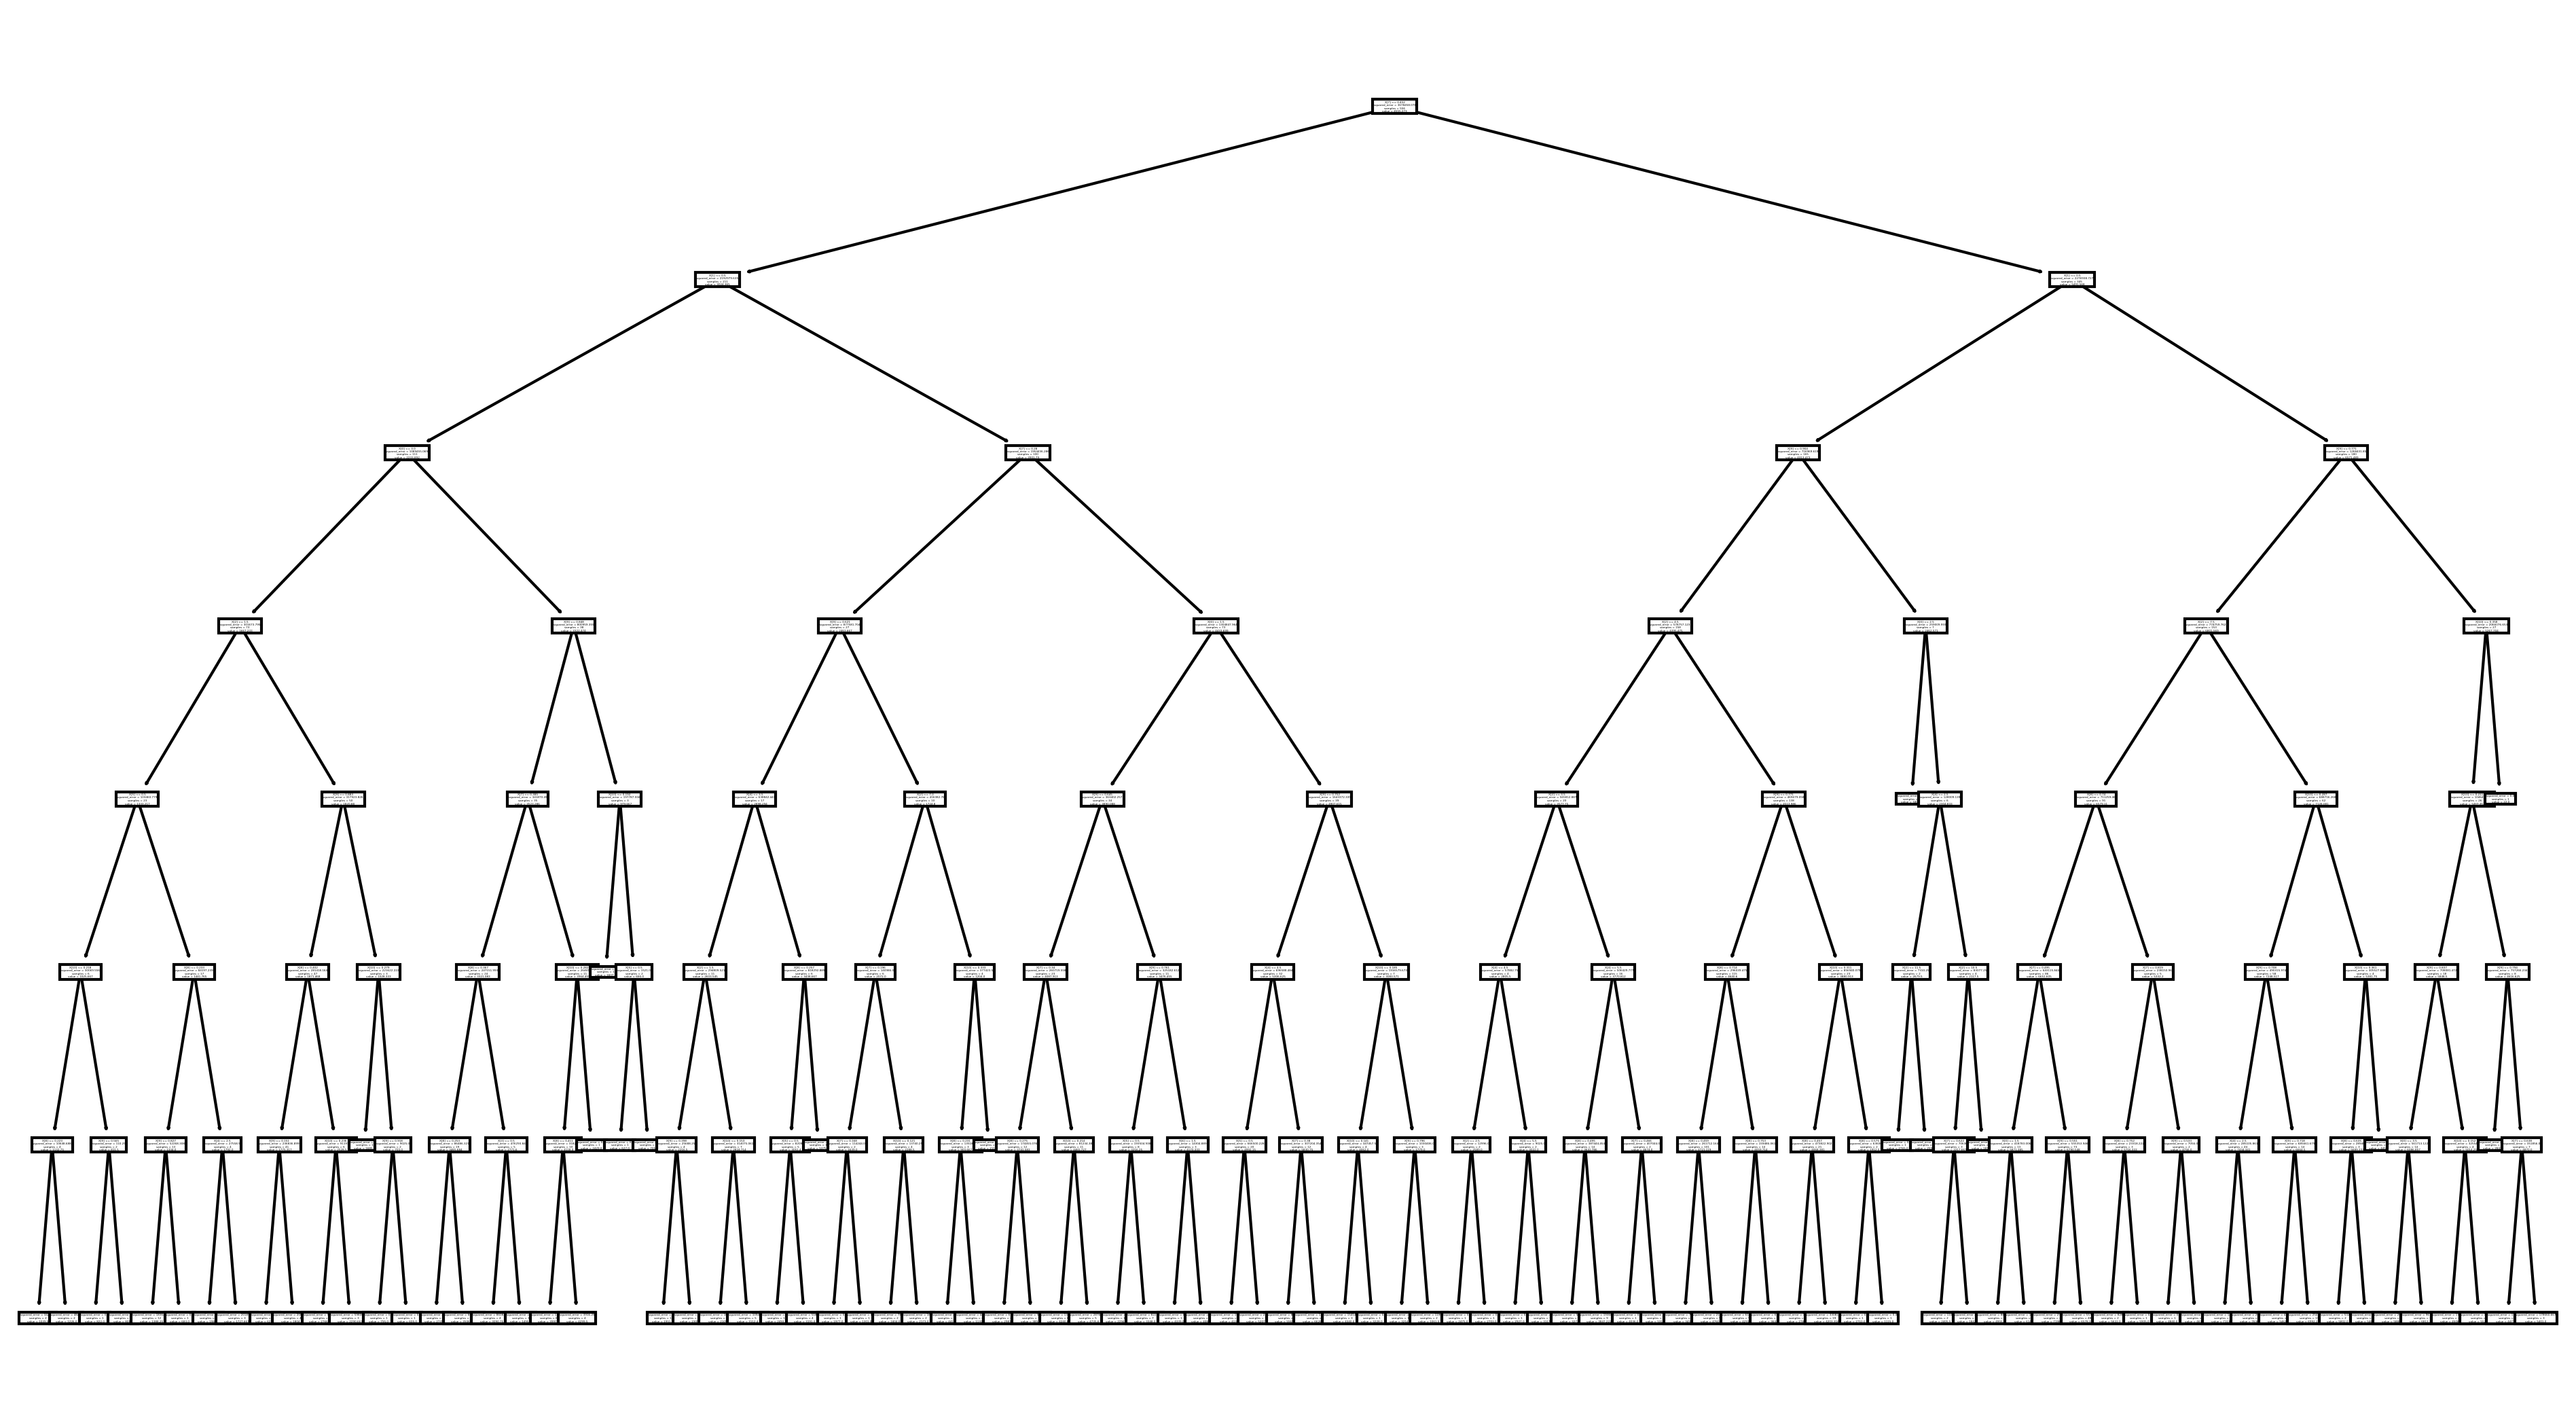

prosecna vrednost za r2 score je:  0.7960118518510823
prosecna vrednost za rmse score je:  849.1179773702904
[0.8451588747328175, 0.7180692093022213, 0.7217909998372369, 0.8404803494467012, 0.8545598259364344]
0.7960118518510823
[800.1018779973791, 872.0524614479649, 1085.812050838619, 752.572033965514, 735.0514626019751]
849.1179773702904


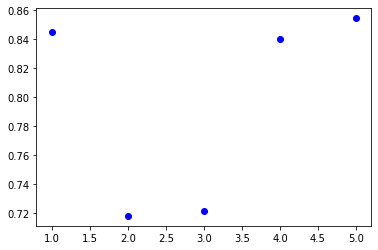

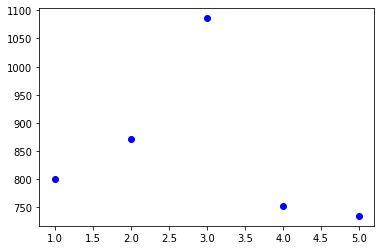

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# indexes = kf.split(x_train)
# rmse_val = []
# r2_val=[]

for deph in [3,5,7]:
  rmse_val = []
  r2_val=[] 
  indexes = kf.split(x_train)
  for train_index, test_index in indexes:

      y_test = y_cnt_train.iloc[test_index]
      regresor = DecisionTreeRegressor(max_depth=deph)
      regresor.fit(x_train.iloc[train_index,:].values, y_cnt_train.iloc[train_index])

      plt.figure(figsize=(16,9), dpi=300)
      tree.plot_tree(regresor)
      plt.show()

      y_pred = regresor.predict(x_train.iloc[test_index,:].values)

      error = np.sqrt(mean_squared_error(y_pred,y_test)) #calculate rmse
      error_r2= r2_score(y_test, y_pred)
      rmse_val.append(error) #store rmse values
      r2_val.append(error_r2)
  x = [1,2,3,4,5]
  print('prosecna vrednost za r2 score je: ',np.mean(r2_val))
  print('prosecna vrednost za rmse score je: ',np.mean(rmse_val))
  print(r2_val)
  print(sum(r2_val)/len(r2_val))
  print(rmse_val)
  print(sum(rmse_val)/len(rmse_val))
  plt.scatter(x, r2_val, c ="blue")
  plt.show()
  plt.scatter(x, rmse_val, c ="blue")
  plt.show()

U prethonom kodu, kros validacijom je utvrdjeno da su najbolji parametr za stablo odluke, dubina 7, dobijaju se najbolje vrednosti za mere evaluacije

Zatim je isproban metod slucajne sume (random forest) sa dubinom koja je prethodno utvrdjena da je najbolja, dok se brojnost drveca u sumi testirao

Doslo se do zakljucka da je najbolji broj drveca 75, medjutim nisu znacajno drugacije mere evaluacije i za 25 i 50 drveca

prosecna vrednost za r2 score je:  0.869658515925028
prosecna vrednost za rmse score je:  680.6991221873022
[0.9164023634062142, 0.8457081857230274, 0.8062310968535318, 0.8953299082961782, 0.8846210253461881]
[587.8941385502927, 645.1234082157353, 906.1729835167341, 609.6102816401033, 654.6947990136457]


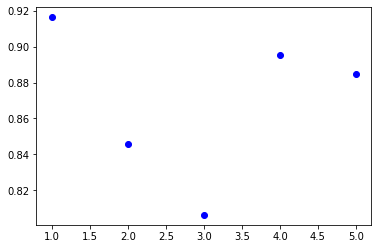

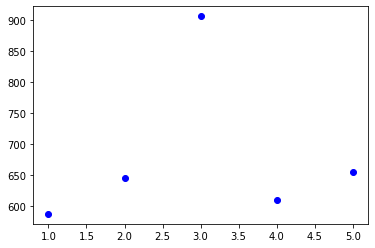

prosecna vrednost za r2 score je:  0.8681495056704819
prosecna vrednost za rmse score je:  684.6414234383361
[0.9145493422659625, 0.8418307087146486, 0.8060179149916817, 0.8929975065284365, 0.8853520558516799]
[594.3740434641755, 653.1793435034127, 906.6713259660767, 616.3649437575305, 652.6174605004854]


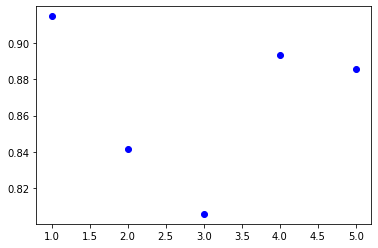

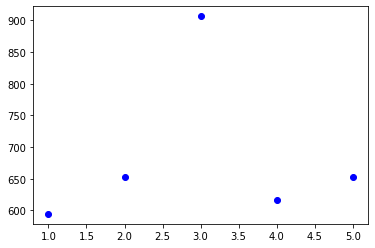

prosecna vrednost za r2 score je:  0.8686138339473771
prosecna vrednost za rmse score je:  683.0869996822711
[0.9153316381505946, 0.8430353075828609, 0.803070020009766, 0.8939964345984839, 0.8876357693951797]
[591.6470575758158, 650.6873208609882, 913.5345729761203, 613.4811419113762, 646.0849050870552]


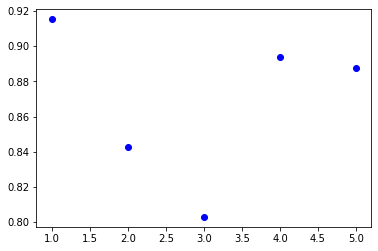

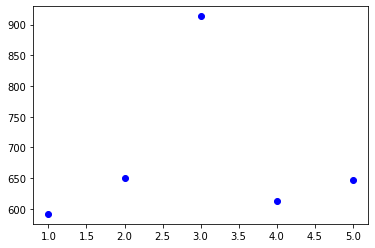

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# indexes = kf.split(x_train)
rmse_val = []
r2_val=[]

for n in [100,300,450]:
  rmse_val = []
  r2_val=[] 
  indexes = kf.split(x_train)
  for train_index, test_index in indexes:

      y_test = y_cnt_train.iloc[test_index]
      regresor = RandomForestRegressor(n_estimators=n,max_depth=7)
      regresor.fit(x_train.iloc[train_index,:].values, y_cnt_train.iloc[train_index])


      y_pred = regresor.predict(x_train.iloc[test_index,:].values)

      error = np.sqrt(mean_squared_error(y_pred,y_test)) #calculate rmse
      error_r2= r2_score(y_test, y_pred)
      rmse_val.append(error) #store rmse values
      r2_val.append(error_r2)
  x = [1,2,3,4,5]
  print('prosecna vrednost za r2 score je: ',np.mean(r2_val))
  print('prosecna vrednost za rmse score je: ',np.mean(rmse_val))
  print(r2_val)
  print(rmse_val)
  plt.scatter(x, r2_val, c ="blue")
  plt.show()
  plt.scatter(x, rmse_val, c ="blue")
  plt.show()

##U sledecem koraku se ispituje kada je najmanja greska i koliki je broj stabala u tom slucaju

450


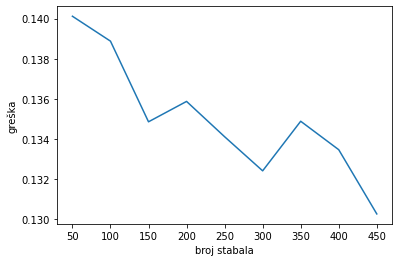

In [ ]:
error_rate=[]
num_estimators = np.arange(50, 500, 50)
for i in num_estimators:
    regresor = RandomForestRegressor(n_estimators=i, max_depth=7, oob_score=True)
    regresor.fit(x_train.values, y_cnt_train)
    oob_error = 1 - regresor.oob_score_
    error_rate.append(oob_error)

tmp = error_rate.index(min(error_rate))
print(num_estimators[tmp])
plt.plot(np.arange(50,500,50), error_rate)
plt.xlabel('broj stabala')
plt.ylabel('greška')
plt.show()
#

Na osnovu prethodne analize stabla odluke i slucajne sume doslo se do zakljucka da je najboljeg predvidjanja doslo primenom slucajne sume sa 450 stabala i dubinom 7